# Advanced Regression - Surprise Housing Dataset

## Business Statement

A US-based housing company named _Surprise Housing_ has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market. You are
required to build a regression model using regularisation in order to
predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:
**Target** : Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house.

## Scope of Implementation

Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest.
Determine the optimal value of lambda for ridge and lasso regression.
This model will then be used by the management to understand how exactly the prices vary with the variables

## Business Requiremnt

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Steps involved
* Data Load and Analysis
* Data Wragling
* Exploratory Data Analysis 
* Splitting the dataset
* Scaling of the variables
* Modelling
* Tuning with Regularization (Ridge & Lasso)
* Model Evaluation

# Importing Libraries

In [6]:

# Loading Libraries
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling
from sklearn.preprocessing import RobustScaler

# Variables Selection
from sklearn.feature_selection import RFE

# Model Creation
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Loading and information

In [7]:
# Loading Data
house_data = pd.read_csv('train.csv')
# First 5 rows of the data
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
# Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Setting style for seaonrn
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set()

In [9]:
#Basic information about the data
## Number of rows and columns
print('Number of Columns:',house_data.shape[1])
print('Number of Rows:',house_data.shape[0])
## Number of missing values
print('Number of missing values:',house_data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',house_data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',house_data.duplicated().sum())

Number of Columns: 81
Number of Rows: 1460
Number of missing values: 6965
Number of unique values: 9752
Number of duplicates: 0


In [11]:
# Basic information about the dataframe
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
# Describing the dataframe
house_data.describe([0.25,0.50,0.75,0.95,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
95%        0.000000  2466.100000      1.000000      1.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
95%       1.000000      4.000000      1.000000     10.000000     2.000000 

In [13]:
# Columns in the dataframe
print(house_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

###### There are many null values which will be handled by removing or imputing data into it. There are no duplicate rows which reduces one step of data clean.

# Data Cleaning 

In [14]:
# Removing/Fixing Irrelvant Columns
## Duplicate ID column - setting as Index in case of all unique values
print('Unique Values in Id:',house_data.Id.nunique(),'Equals to rows in dataframe:', house_data.shape[0])
house_data=house_data.set_index('Id')

Unique Values in Id: 1460 Equals to rows in dataframe: 1460


In [15]:
# cheecking the Dataframe
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

###### As the irrelevant columns are removed, we are moving forward to with cleaning of null values.

In [16]:
# Checking percentage of the null values in columns
(house_data.isnull().sum()/house_data.shape[0]*100).round(2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtCond          2.53
BsmtQual          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
MSSubClass        0.00
Fireplaces        0.00
Functional        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

###### As there are columns with very high count of the null values, we will remove those with 50% or more null values.

In [17]:
# Removing the columns with 50% null values
house_data=house_data.loc[:,house_data.isnull().sum()/house_data.shape[0]*100<=50]

# Shape of data
house_data.shape

(1460, 76)

In [18]:
# Checking percentage of the null values in columns
(house_data.isnull().sum()/house_data.shape[0]*100).round(2).sort_values(ascending=False)

FireplaceQu      47.26
LotFrontage      17.74
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
TotRmsAbvGrd      0.00
BsmtHalfBath      0.00
BsmtFullBath      0.00
Functional        0.00
MSSubClass        0.00
LowQualFinSF      0.00
GarageCars        0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
GrLivArea         0.00
HeatingQC         0.00
2ndFlrSF   

###### Now we will proceed with the other columns with missing values.

In [19]:
# Column 'FireplaceQu'
## Checking Value Counts
print(house_data.FireplaceQu.value_counts().sum())

## Null values are large and thus cannot be removed as rows
## The column will be removed to avoid loss of data as removing rows will reduce the dataset
house_data=house_data.drop(['FireplaceQu'],axis=1)

770


In [20]:
# Column 'LotFrontage'
## Checking Value Counts
print(house_data.LotFrontage.value_counts().sum())

## Null values are large and thus cannot be removed as rows, filling is not feasile 
## The column will be removed to avoid loss of data as removing rows will reduce the dataset
house_data=house_data.drop(['LotFrontage'],axis=1)

1201


###### We removed 2 columns for which Null values count were large and was not feasible to fill the with statistical methods.As for the columns we will check if the filling is feasible or not.

###### The columns 'GarageQual','GarageType','GarageYrBlt','GarageFinish','GarageCond' are related and have null values in same rows which consist of 82 rows.
###### As the columns are important from business perspective we will remove rows rather than filling then check null count again.

In [21]:
# Removing null values from columns 'GarageQual','GarageType','GarageYrBlt','GarageFinish','GarageCond'
house_data=house_data.dropna(subset=['GarageQual','GarageType','GarageYrBlt','GarageFinish','GarageCond'])

In [22]:
# checking shape of dataframe
house_data.shape

(1379, 74)

In [23]:
# Checking percentage of the null values in columns again
(house_data.isnull().sum()/house_data.shape[0]*100).round(2).sort_values(ascending=False)

BsmtFinType2     2.25
BsmtExposure     2.25
BsmtFinType1     2.18
BsmtQual         2.18
BsmtCond         2.18
MasVnrType       0.58
MasVnrArea       0.58
Electrical       0.07
Functional       0.00
TotRmsAbvGrd     0.00
KitchenQual      0.00
MSSubClass       0.00
Fireplaces       0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
GrLivArea        0.00
KitchenAbvGr     0.00
GarageType       0.00
2ndFlrSF         0.00
GarageYrBlt      0.00
SaleCondition    0.00
SaleType         0.00
YrSold           0.00
MoSold           0.00
MiscVal          0.00
PoolArea         0.00
ScreenPorch      0.00
3SsnPorch        0.00
EnclosedPorch    0.00
OpenPorchSF      0.00
WoodDeckSF       0.00
PavedDrive       0.00
GarageCond       0.00
GarageQual       0.00
GarageArea       0.00
GarageCars       0.00
GarageFinish     0.00
LowQualFinSF     0.00
HeatingQC        0.00
1stFlrSF         0.00
CentralAir       0.00
LotArea          0.00
Street    

###### Remaining columns with null values 'BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','MasVnrArea','Electrical'
###### Percentage of null values are less than 3% which can be dropped as filling with statistical method will introduce error.

In [24]:
## Removing columns as null values are less than 3% which can be dropped as filling with statistical method will introduce error.
house_data=house_data.dropna(subset=['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','MasVnrArea','Electrical'])
house_data.shape

(1338, 74)

In [25]:
# Checking count of the null values in dataframe
house_data.isna().sum().sum()

0

###### Null value has been completed, we are now proceeding with creation of derived metrics and correftion of datatype.

In [26]:
# Dataframe information
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotArea        1338 non-null   int64  
 3   Street         1338 non-null   object 
 4   LotShape       1338 non-null   object 
 5   LandContour    1338 non-null   object 
 6   Utilities      1338 non-null   object 
 7   LotConfig      1338 non-null   object 
 8   LandSlope      1338 non-null   object 
 9   Neighborhood   1338 non-null   object 
 10  Condition1     1338 non-null   object 
 11  Condition2     1338 non-null   object 
 12  BldgType       1338 non-null   object 
 13  HouseStyle     1338 non-null   object 
 14  OverallQual    1338 non-null   int64  
 15  OverallCond    1338 non-null   int64  
 16  YearBuilt      1338 non-null   int64  
 17  YearRemodAdd   1338 non-null   int64  
 18  RoofStyl

In [27]:
# Changed MSSubClass to dtype str as the number represent classes and their business value wil be lost otherwise
mapping_class={20: "1storyNew", 30: "1storyOld", 40: "1storywAttic", 45: "1_5storyUnF", 50: "1_5storyF", 60: "2storyNew", 70: "2storyOld", 75: "2_5story",
      80: "Multi", 85: "Split", 90: "Duplex", 120: "1storyPUDnew", 160: "2storyPUDnew", 180: "PUDmulti", 190: "2Family"}
house_data['MSSubClass'] = house_data['MSSubClass'].map(mapping_class).astype('str')

# Changed GarageYrBlt to dtype int as the value is 4 format year(YYYY) and can be easily binned for easier business interpretation

house_data['GarageYrBlt'] = house_data['GarageYrBlt'].astype('int')

def bin_year(x):
     return int(str(x)[:3]+'0')
# Columns 'YearBuilt','YearRemodAdd','GarageYrBlt' converted to Categroical to their decade term like 1990s
for x in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']:
  house_data[x] = house_data[x].apply(bin_year)

In [28]:
house_data.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                      
1   2storyNew       RL     8450   Pave      Reg         Lvl    AllPub   
2   1storyNew       RL     9600   Pave      Reg         Lvl    AllPub   
3   2storyNew       RL    11250   Pave      IR1         Lvl    AllPub   
4   2storyOld       RL     9550   Pave      IR1         Lvl    AllPub   
5   2storyNew       RL    14260   Pave      IR1         Lvl    AllPub   

   LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
Id                                                                              
1     Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
2        FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
3     Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
4     Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
5        FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

    OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
Id                                                                         
1             7            5       2000          2000     Gable  CompShg   
2             6            8       1970          1970     Gable  CompShg   
3             7            5       2000          2000     Gable  CompShg   
4             7            5       1910          1970     Gable  CompShg   
5             8            5       2000          2000     Gable  CompShg   

   Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
Id                                                                      
1      VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
2      MetalSd     MetalSd       None         0.0        TA        TA   
3      VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
4      Wd Sdng     Wd Shng       None         0.0        TA        TA   
5      VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

   Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
Id                                                                      
1       PConc       Gd       TA           No          GLQ         706   
2      CBlock       Gd       TA           Gd          ALQ         978   
3       PConc       Gd       TA           Mn          GLQ         486   
4      BrkTil       TA       Gd           No          ALQ         216   
5       PConc       Gd       TA           Av          GLQ         655   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
Id                                                                      
1           Unf           0        150          856    GasA        Ex   
2           Unf           0        284         1262    GasA        Ex   
3           Unf           0        434          920    GasA        Ex   
4           Unf           0        540          756    GasA        Gd   
5           Unf           0        490         1145    GasA        Ex   

   CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
Id                                                                      
1           Y      SBrkr       856       854             0       1710   
2           Y      SBrkr      1262         0             0       1262   
3           Y      SBrkr       920       866             0       1786   
4           Y      SBrkr       961       756             0       1717   
5           Y      SBrkr      1145      1053             0       2198   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                 
1              1             0         2         1             3   
2              0             1         2         0             3   
3              1             0         2         1             3   
4 

In [29]:
# Dividing Columns in types 
## Continous Columns
cont_cols=[x for x in house_data.describe().columns if x !='SalePrice']
## Categorical Columns
cat_cols=[x for x in house_data.columns if x not in cont_cols and x !='SalePrice']
## Target Column
tar_cols=['SalePrice']
# Printing Columns
print('Continous columns:',cont_cols, len(cont_cols))
print('Categorical columns:',cat_cols, len(cat_cols))
print('Target columns:',tar_cols, len(tar_cols))

Continous columns: ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 34
Categorical columns: ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'Garag

# Exploratory data analysis

## Univariate Analyis

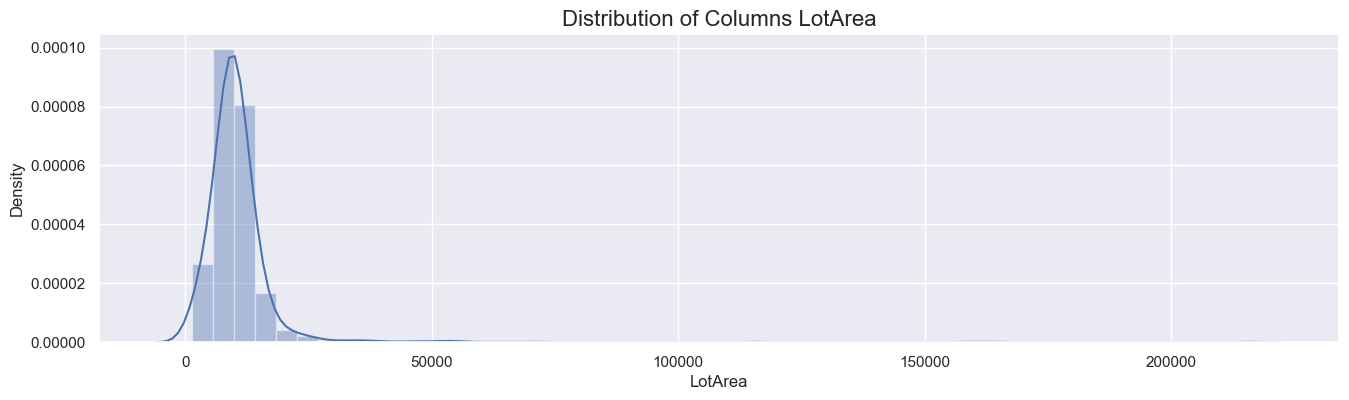

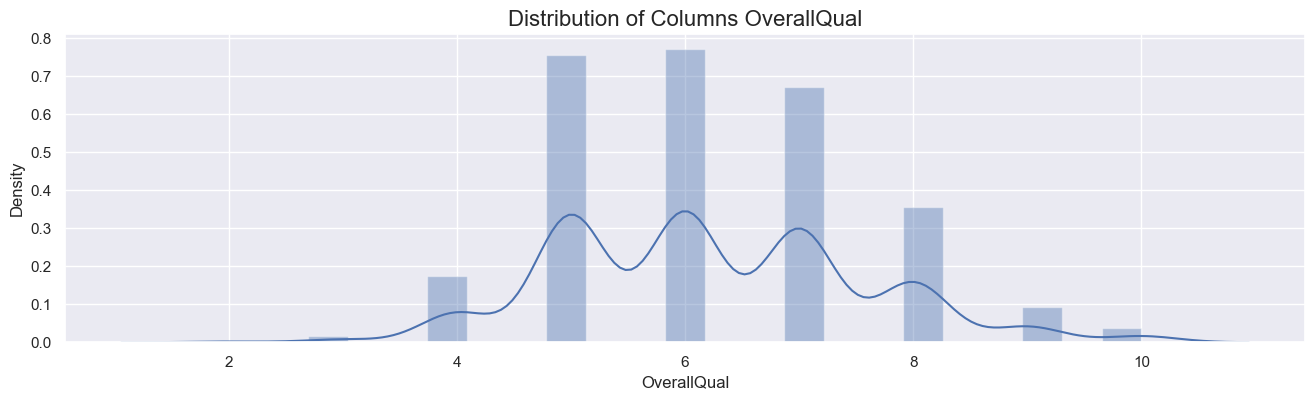

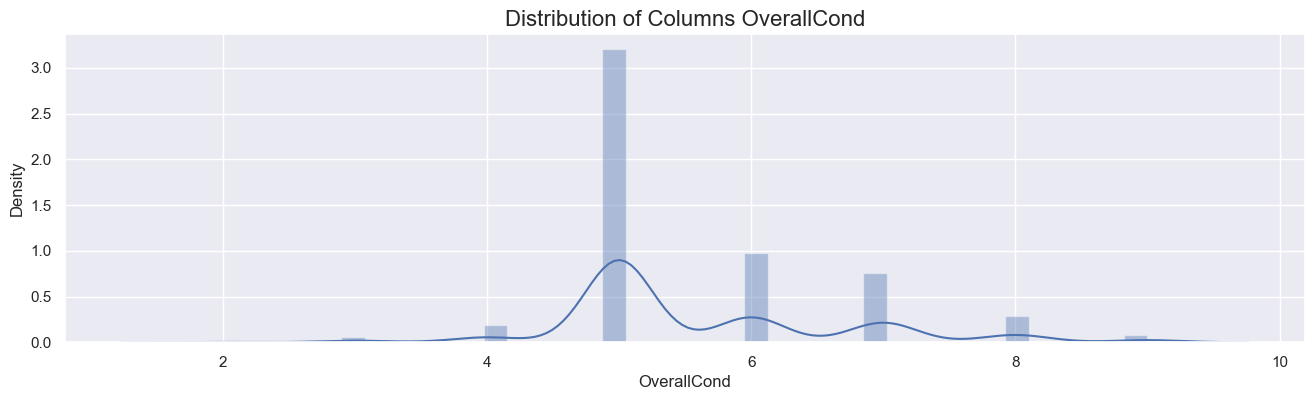

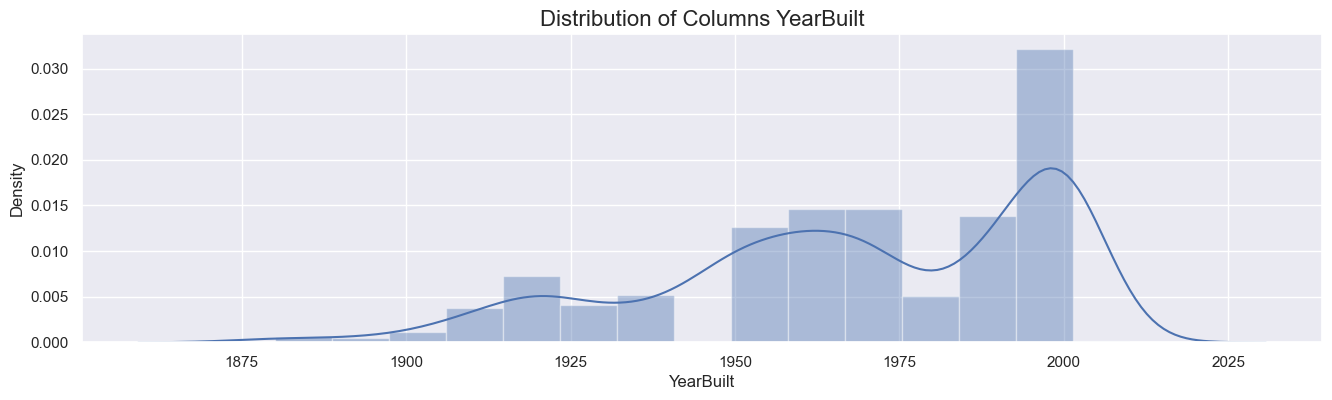

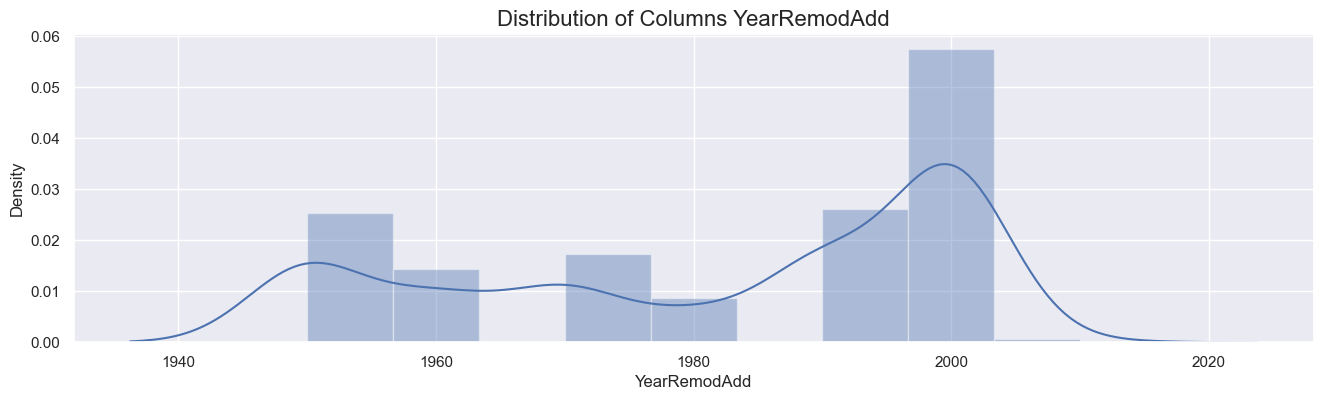

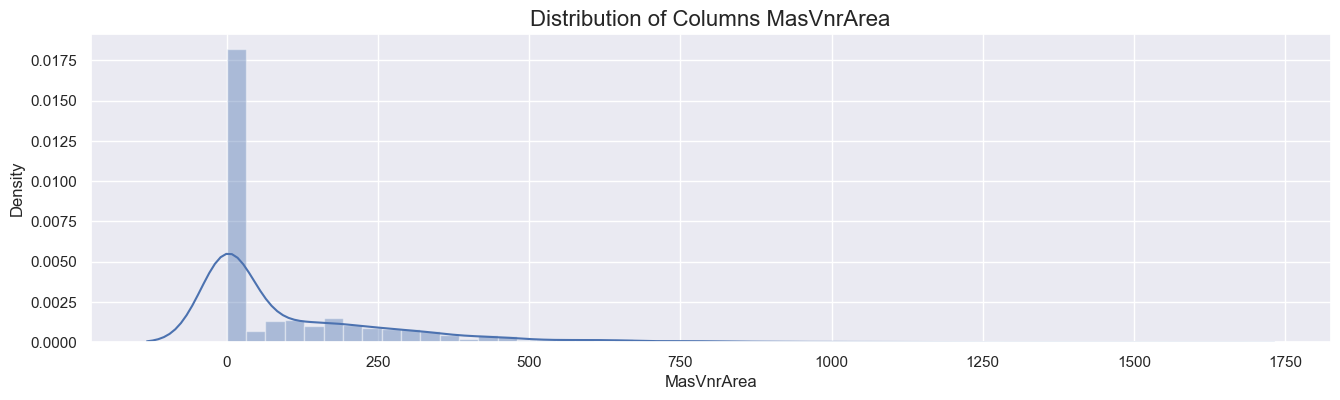

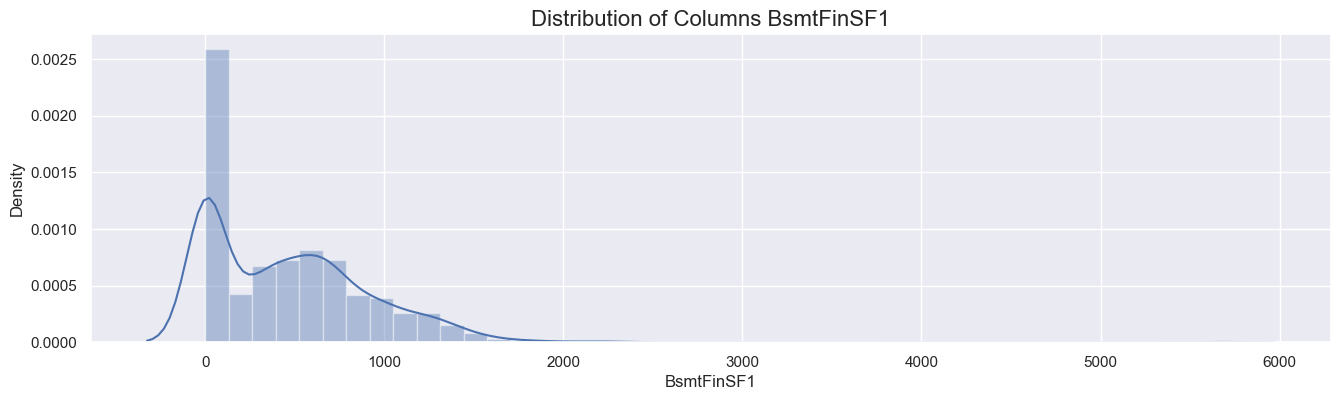

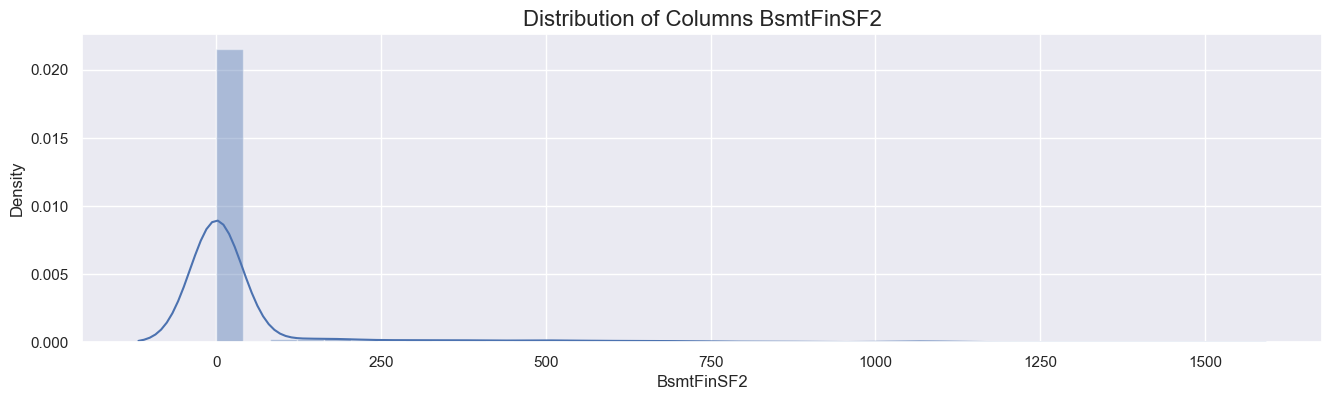

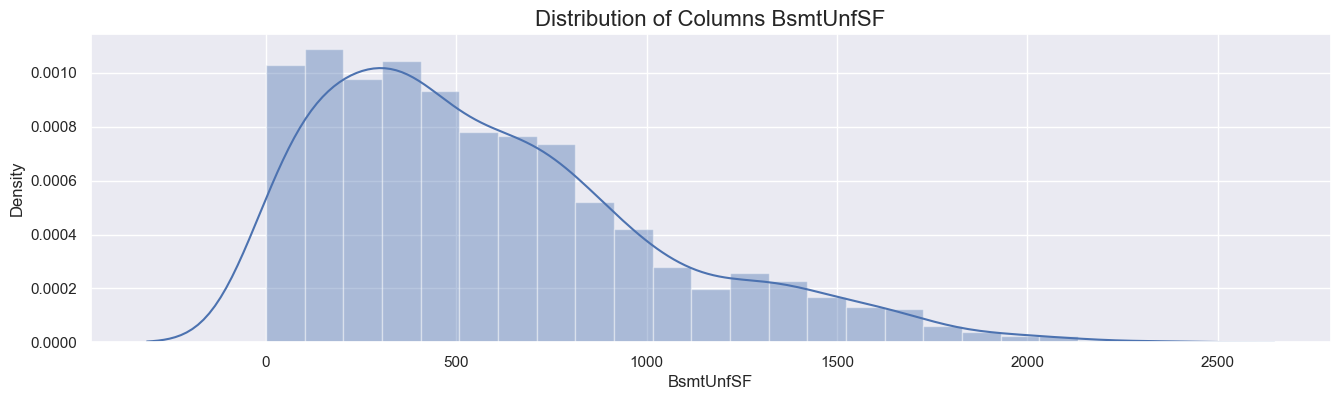

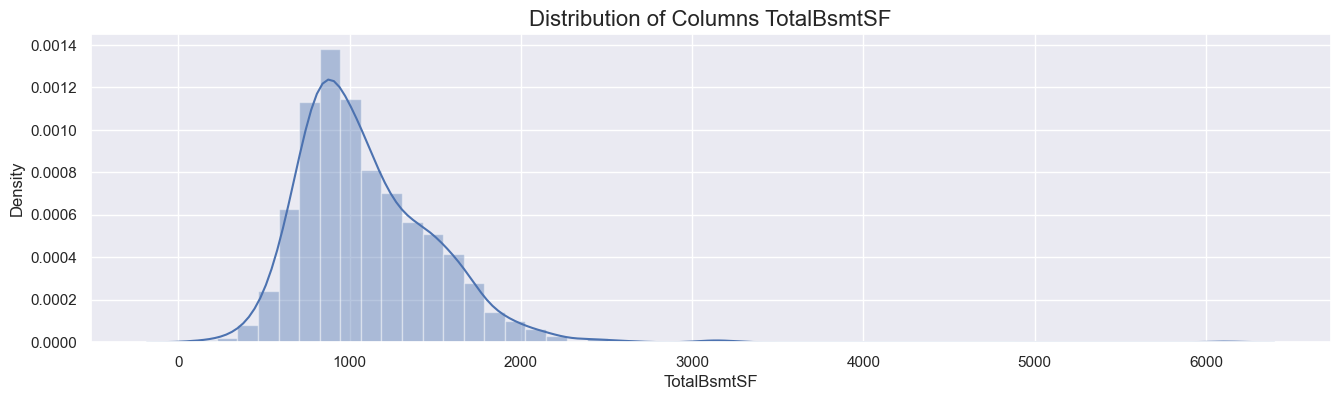

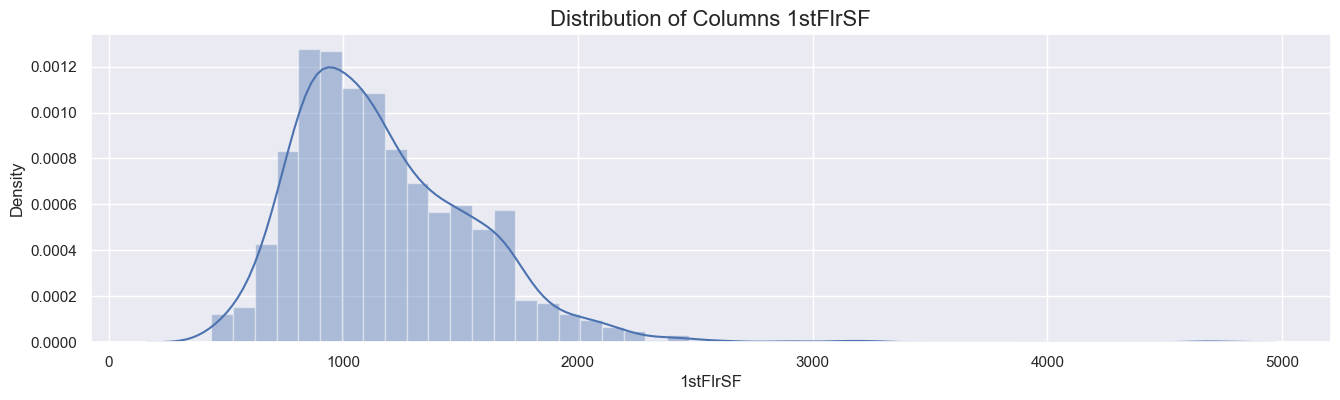

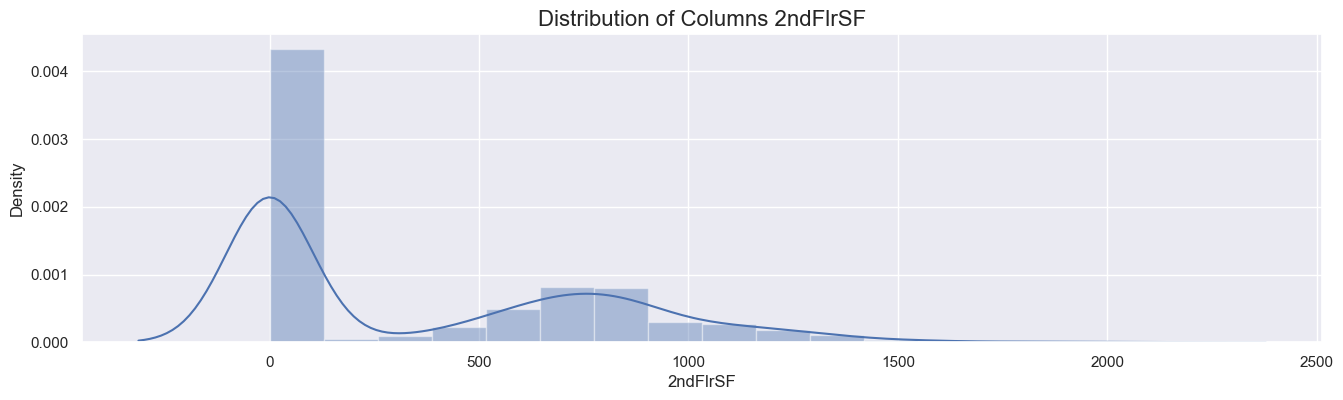

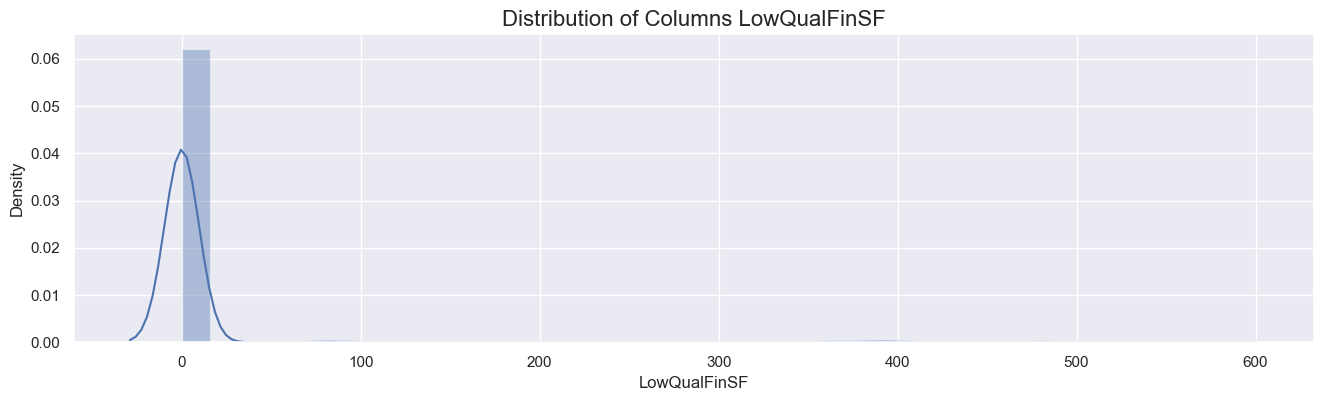

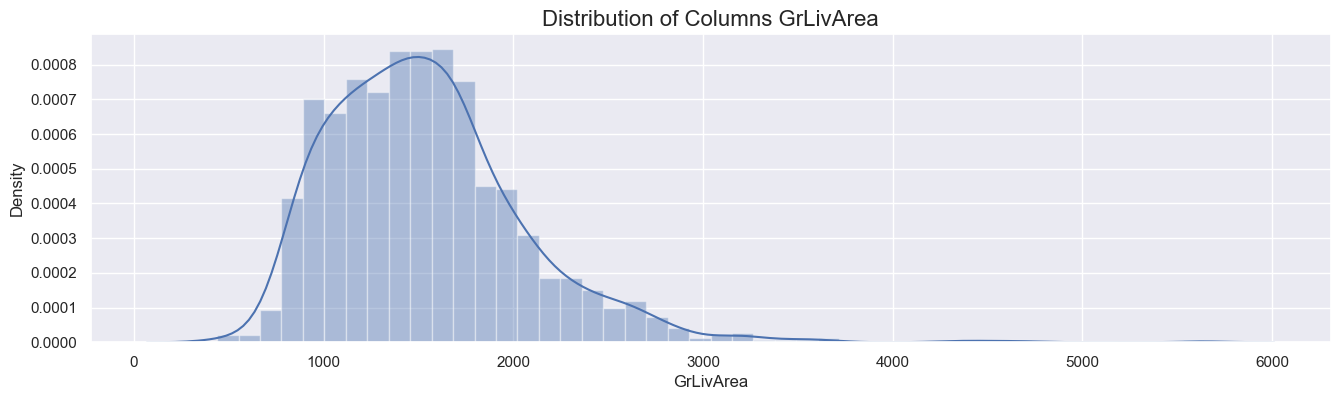

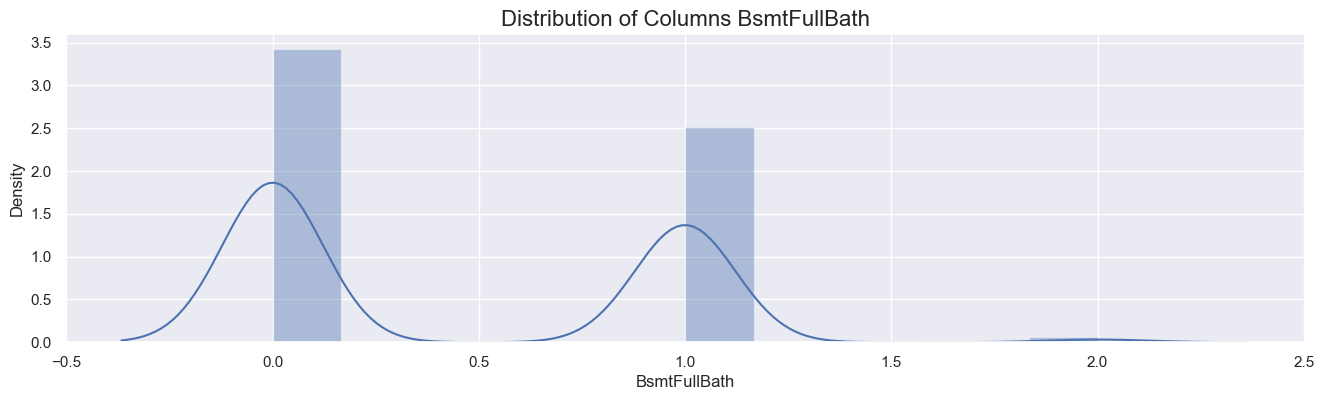

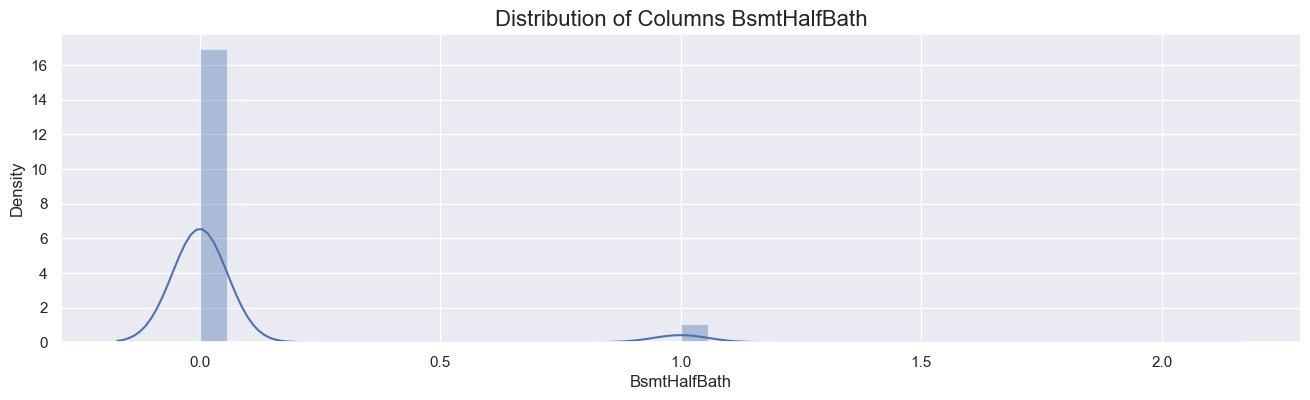

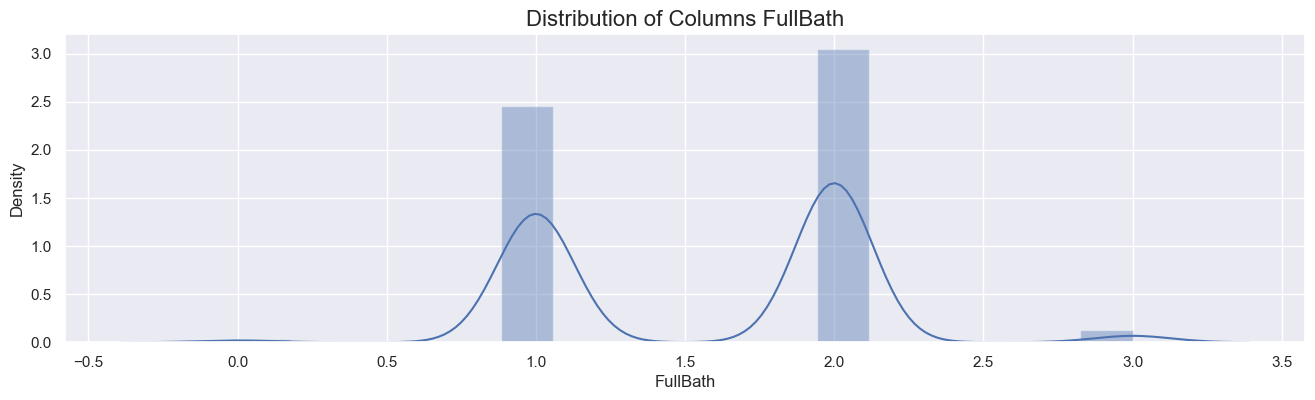

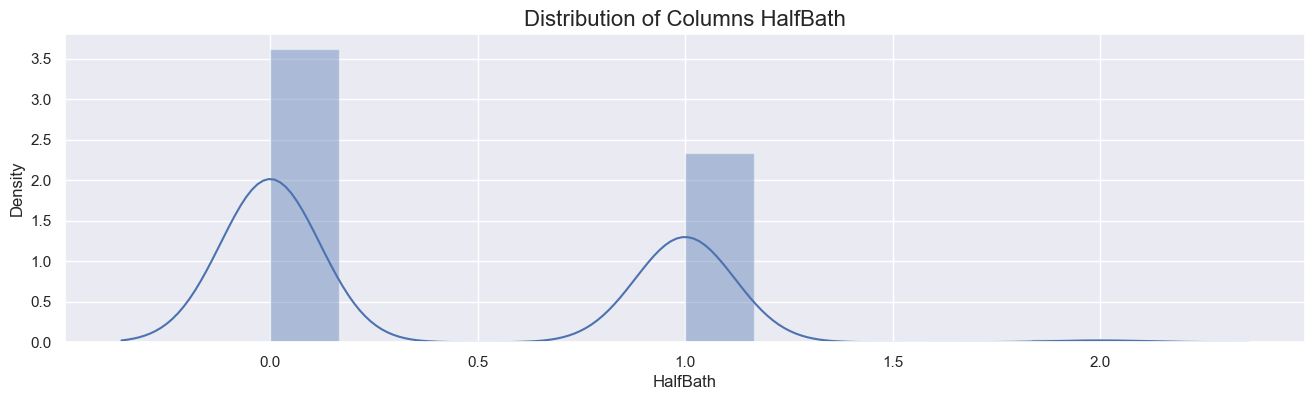

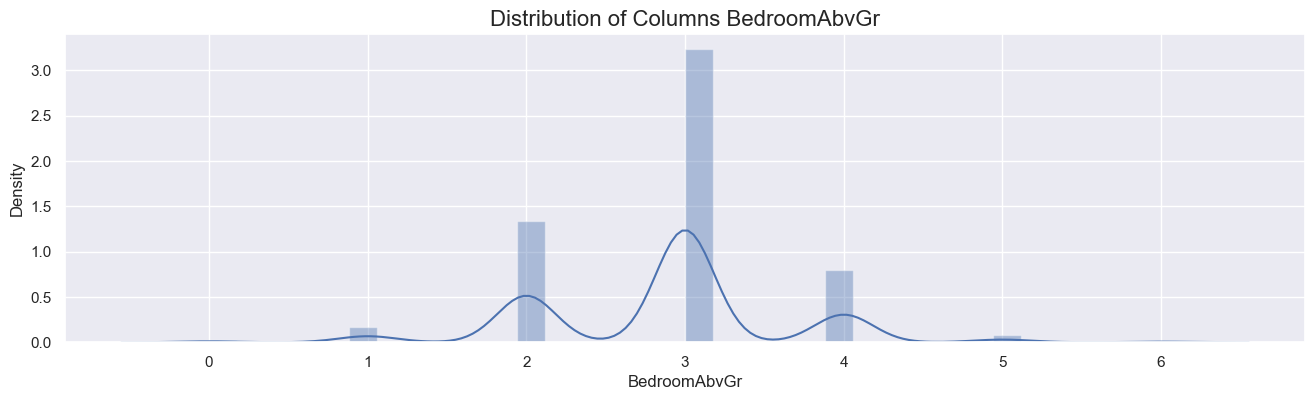

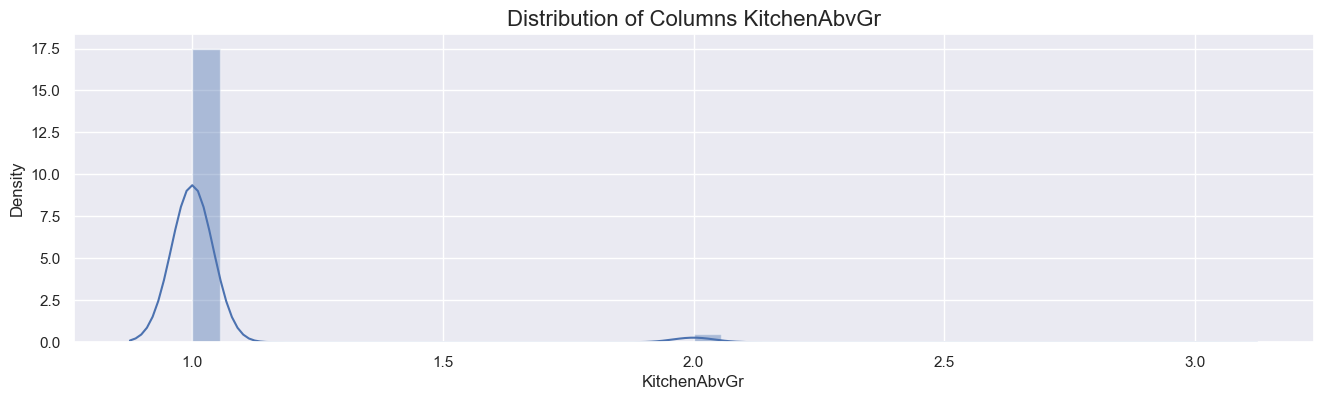

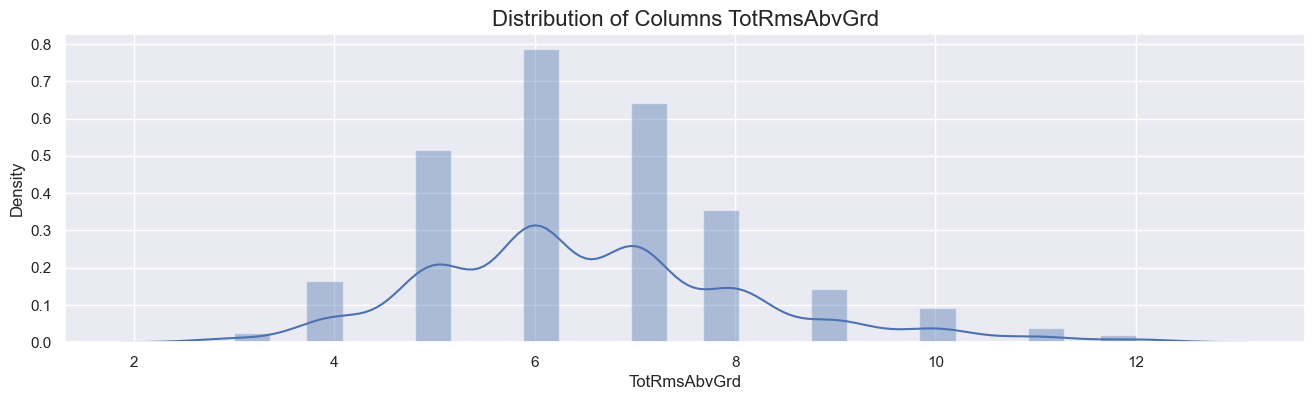

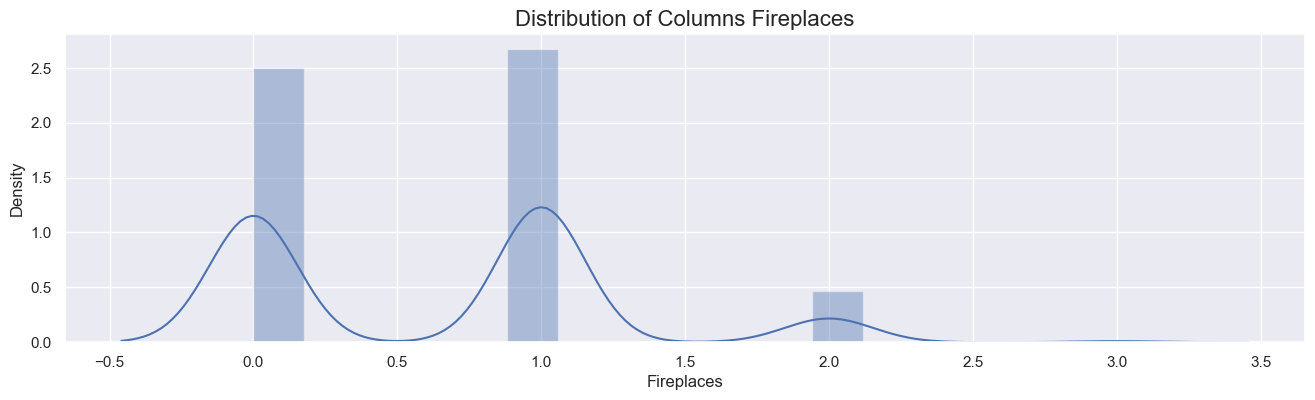

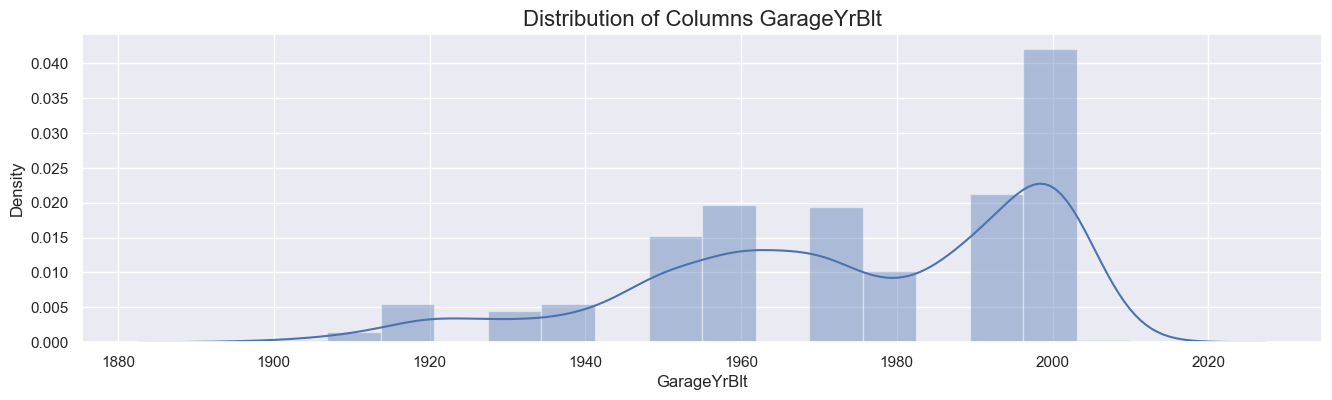

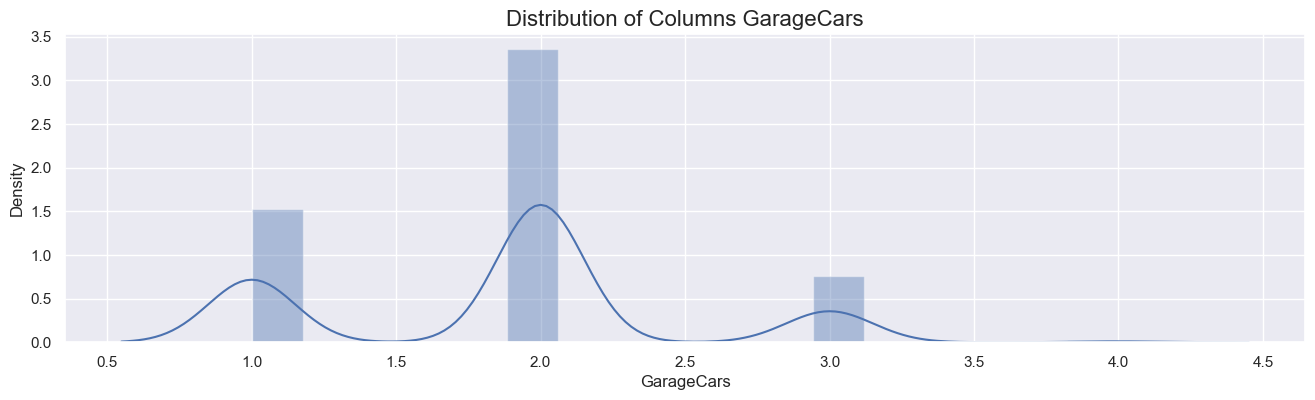

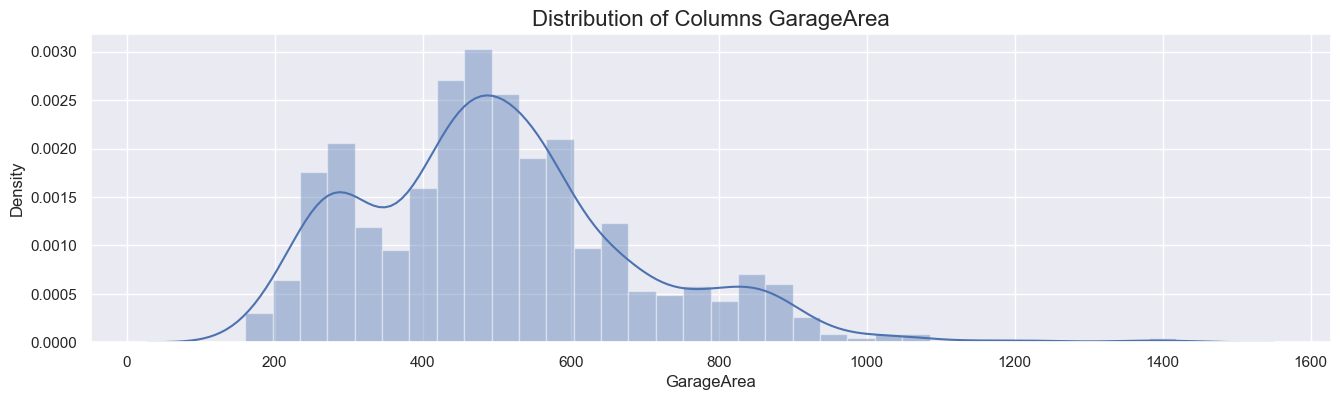

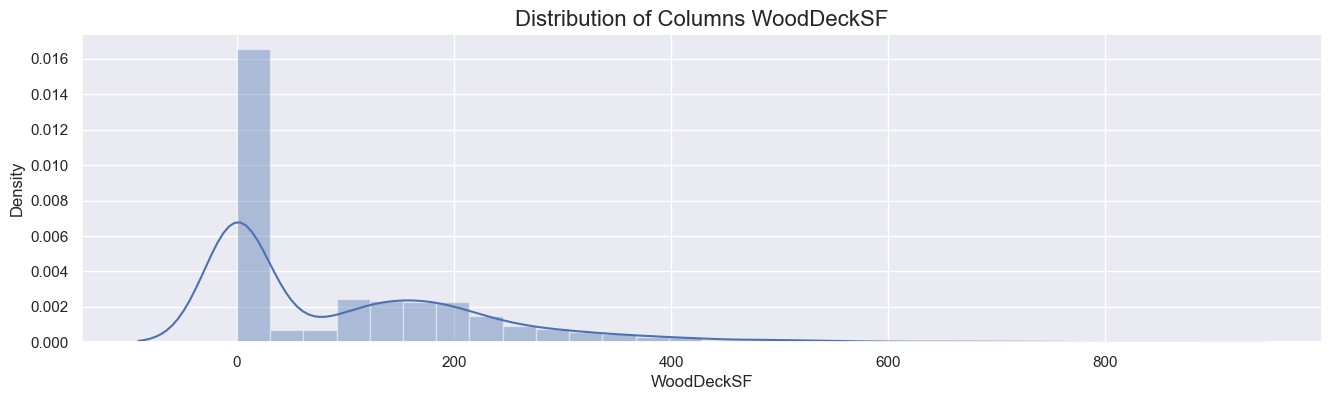

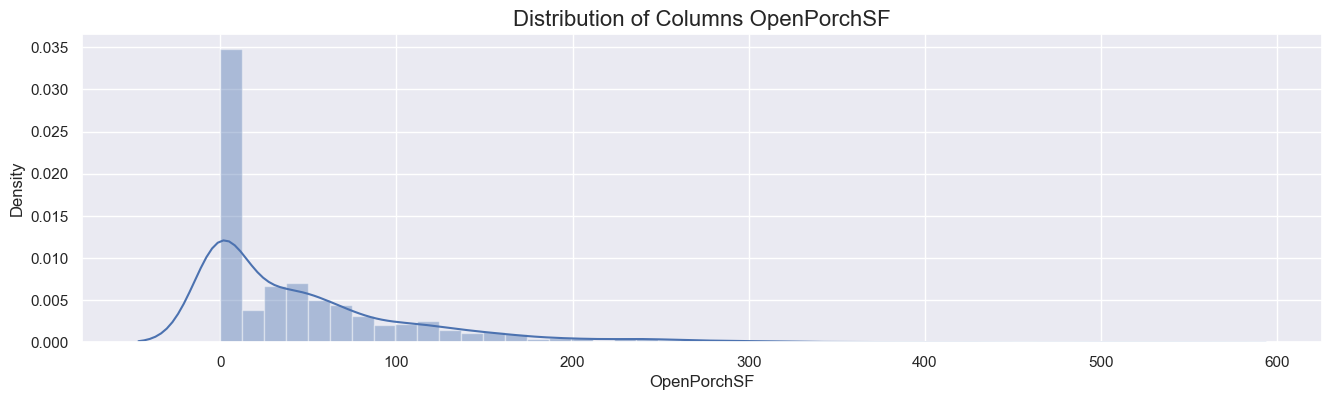

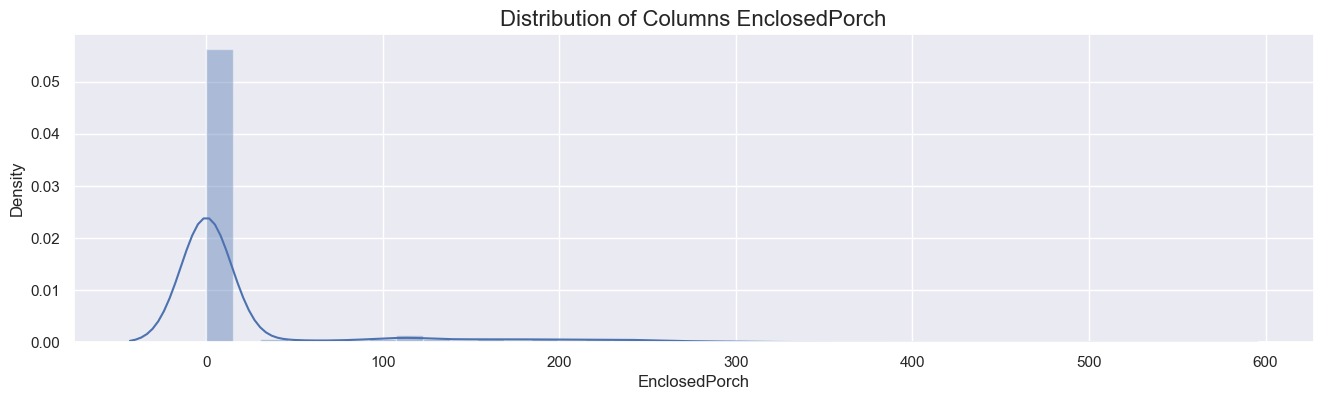

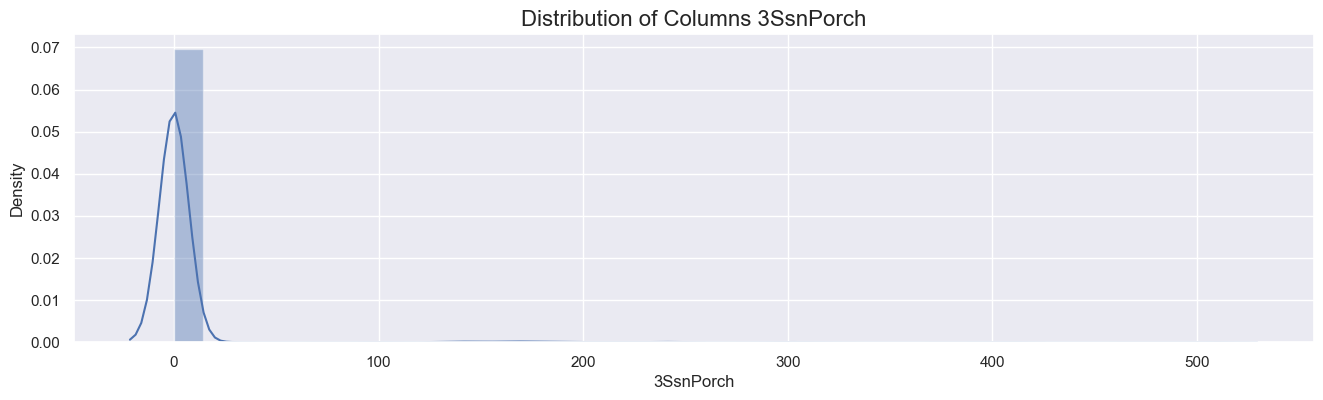

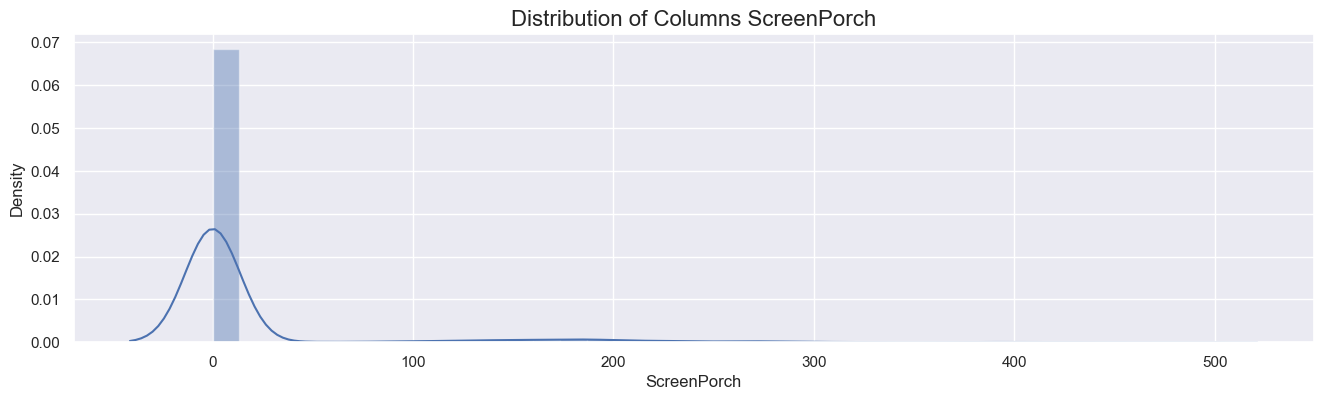

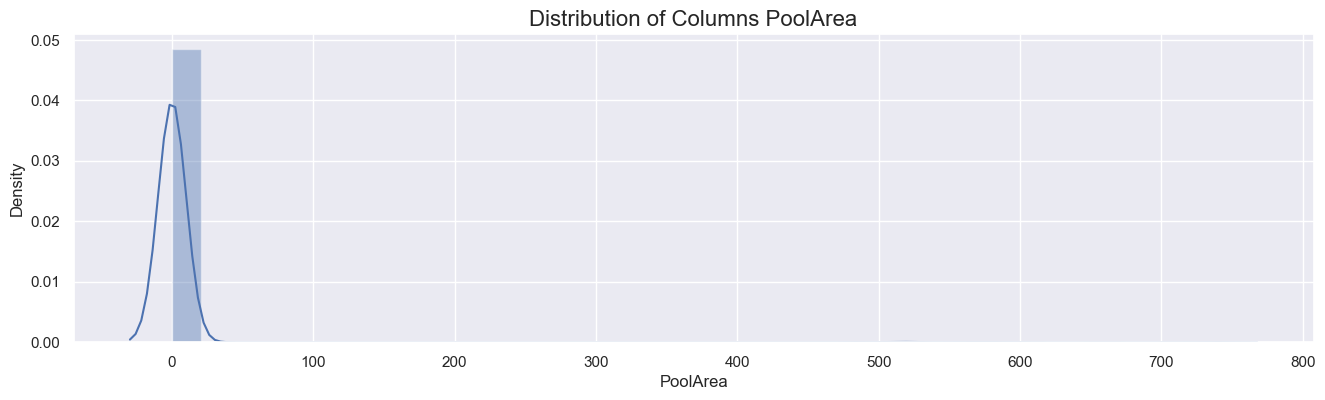

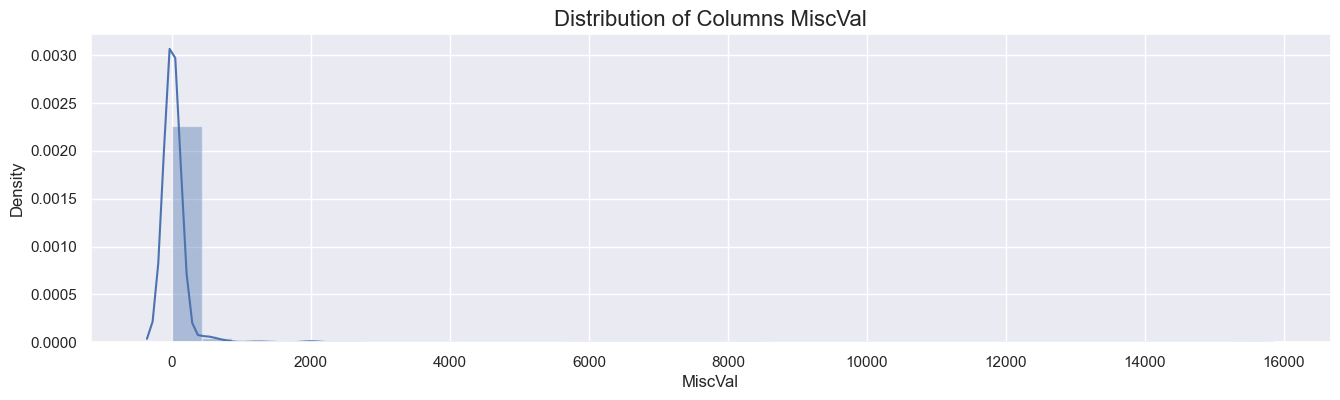

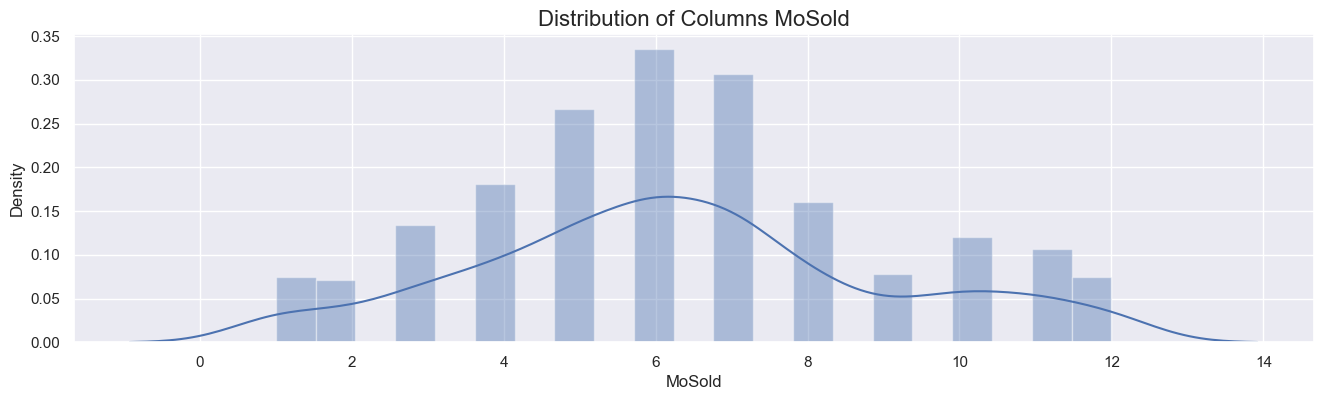

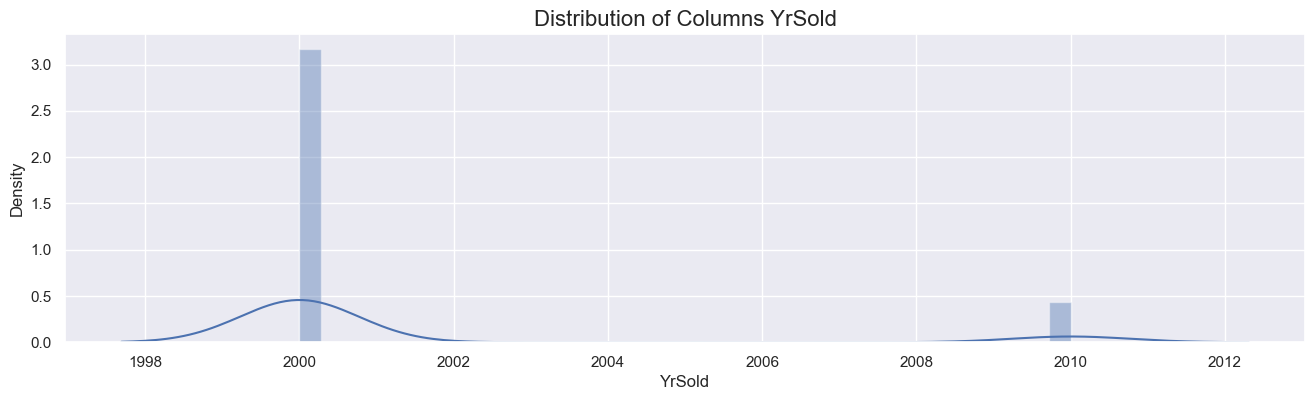

In [30]:
# Checking Continous columns distribution - column count 34
for x in range(1,int(len(cont_cols)+1)):
  fig,axes=plt.subplots()
  sns.distplot(house_data[cont_cols[x-1]])
  axes.set_title('Distribution of Columns '+cont_cols[x-1],fontdict={'fontsize':16})
  fig.set_figheight(4)
  fig.set_figwidth(16)
plt.show()

###### As Visible from many columns we have large number of outliers thus we will proceed with fixing it.

In [31]:
# Using IQR to remove outliers from columns
cols = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','ScreenPorch', 'SalePrice'] 

Q1 = house_data[cols].quantile(0.05)
Q3 = house_data[cols].quantile(0.95)
IQR = Q3 - Q1

house_data = house_data[~((house_data[cols] < (Q1 - 1.5 * IQR)) |(house_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

###### We are removing the columns which have either very unbalanced distribution or very skewed distribution.

In [32]:
# Remvoing highly skewed columns 
cols_to_remove=['MasVnrArea','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
house_data=house_data.drop(cols_to_remove,axis=1)
# Resetting Continous Column list
## Continous Columns
cont_cols=[x for x in house_data.describe().columns if x !='SalePrice']
# Printing Columns
print('Continous columns:',cont_cols, len(cont_cols))

Continous columns: ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold'] 24


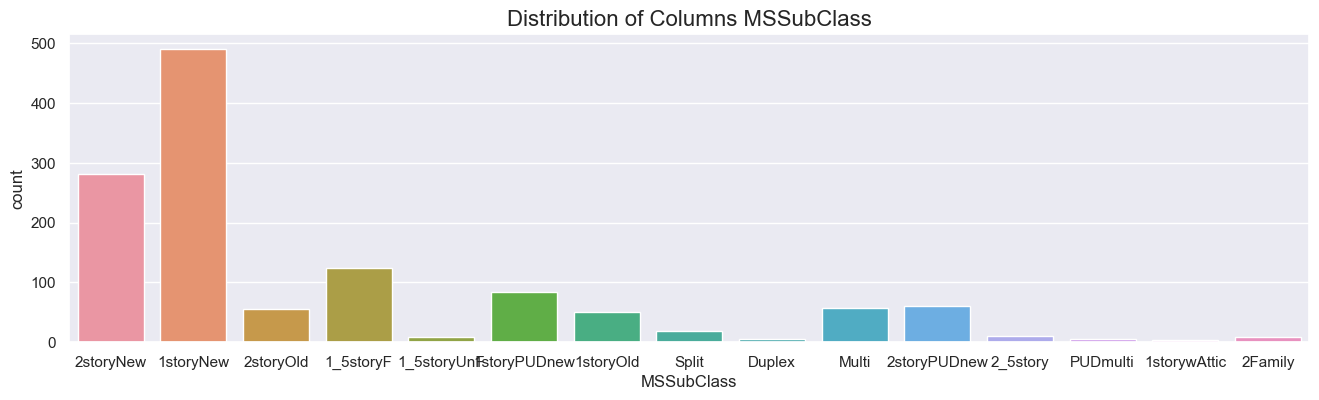

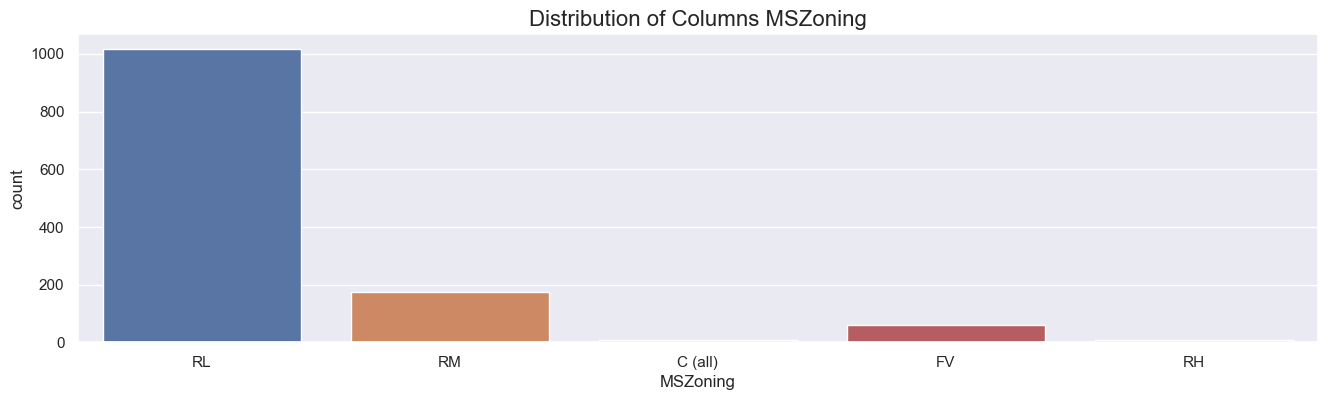

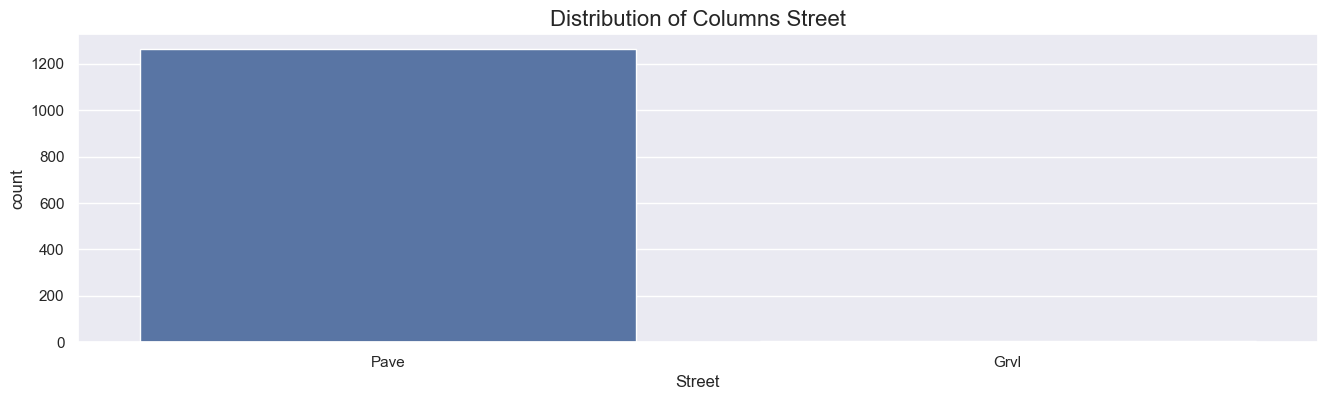

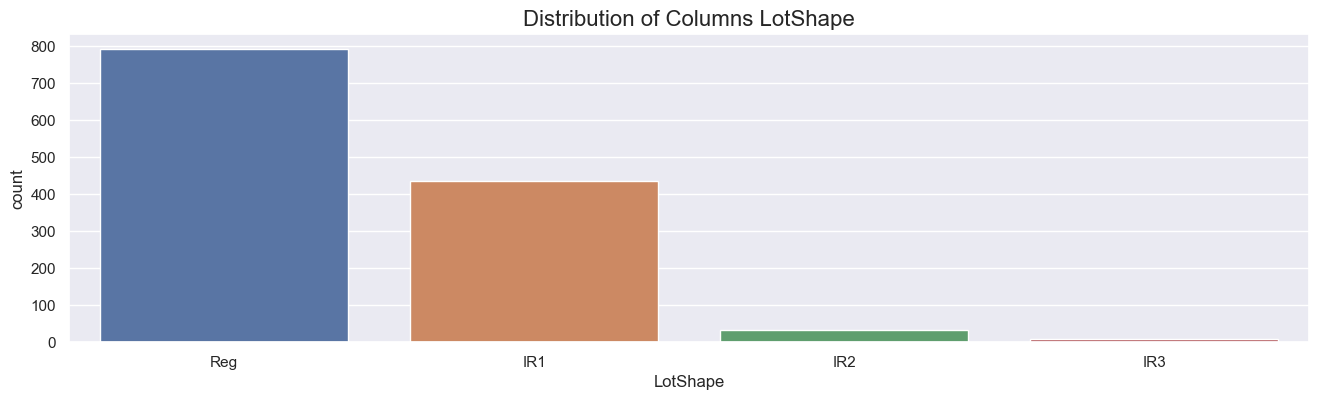

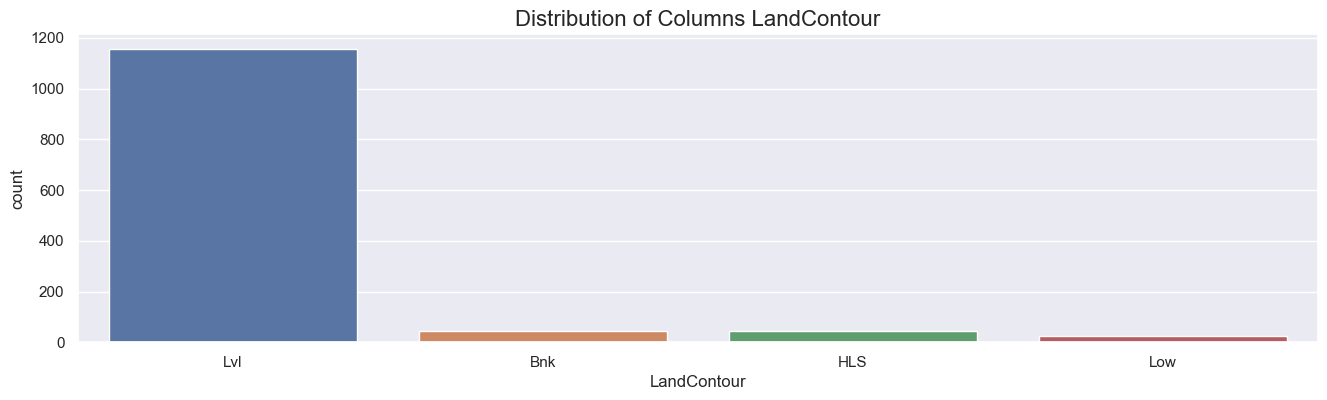

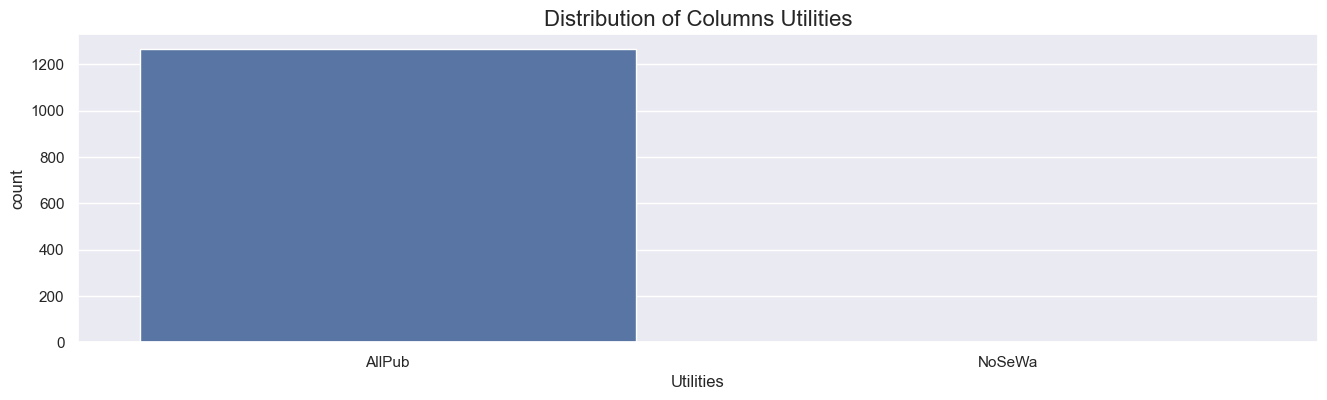

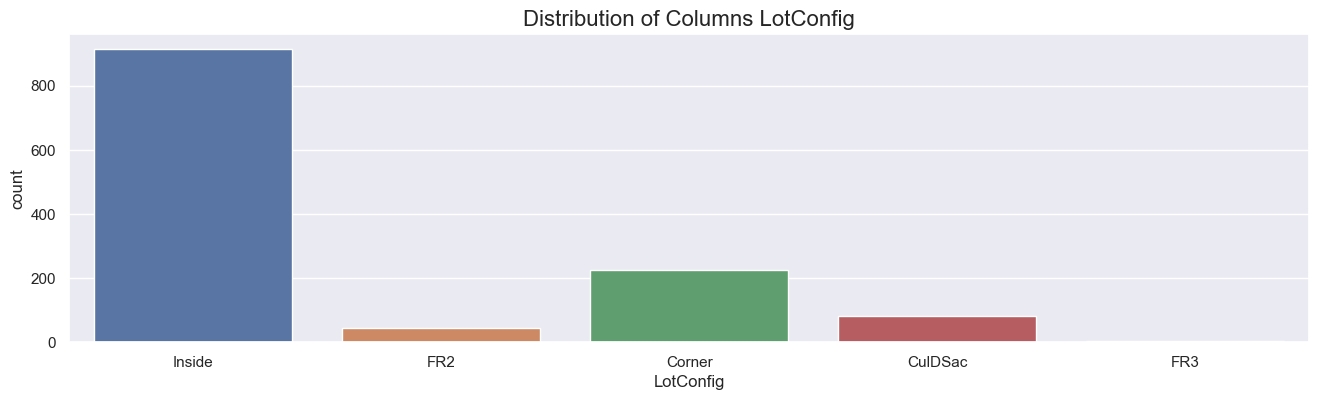

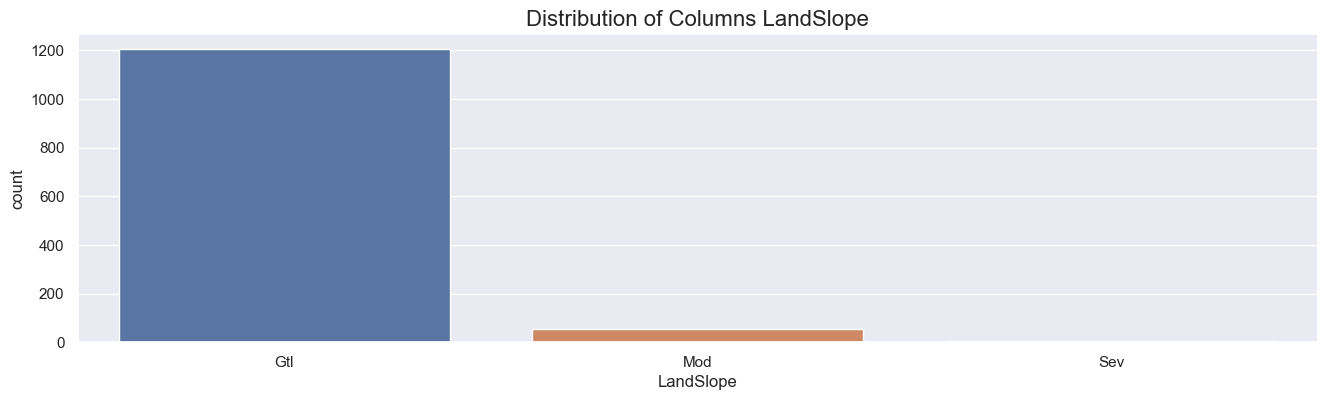

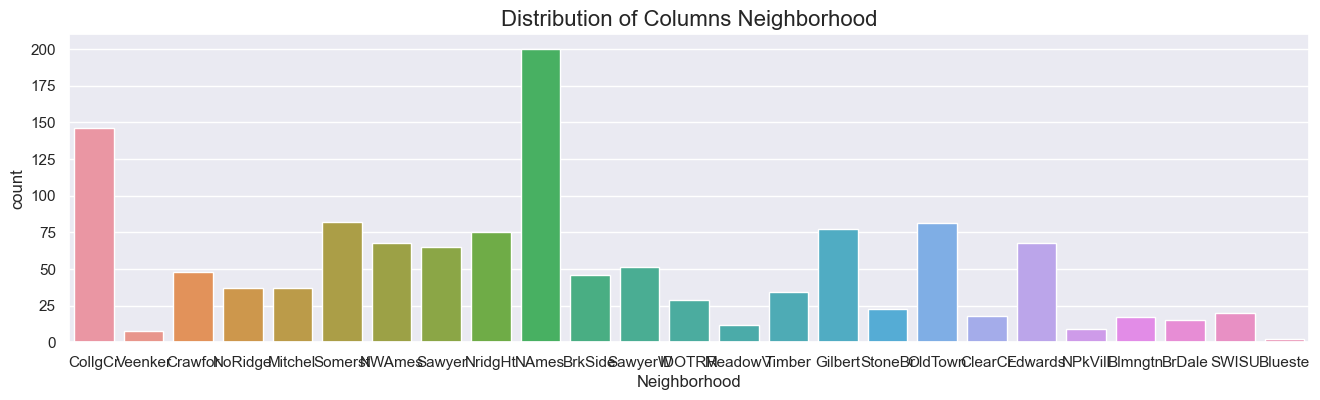

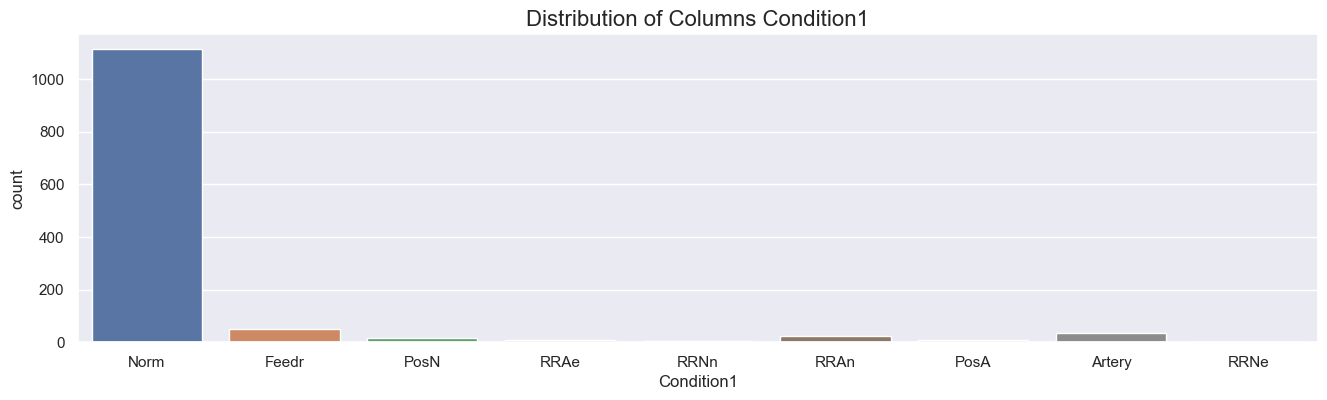

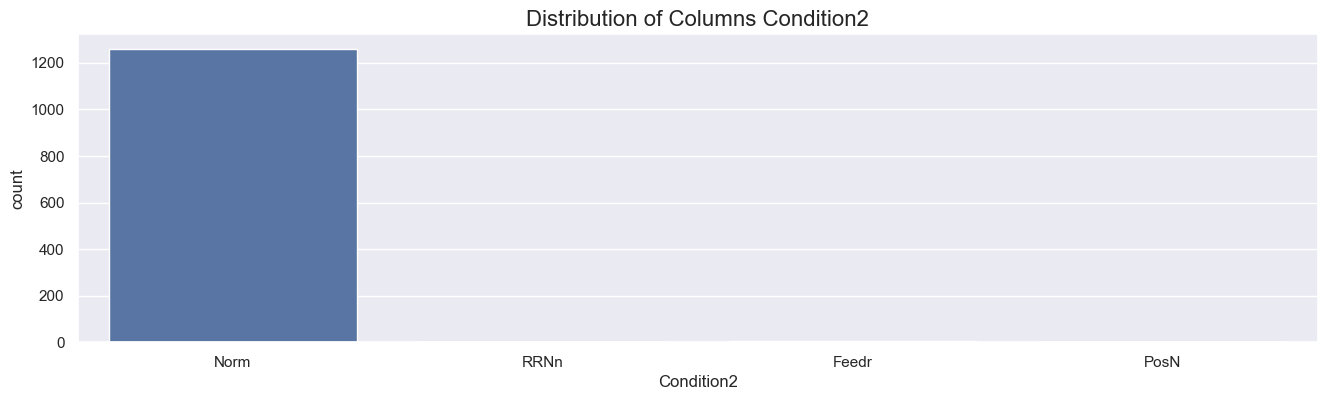

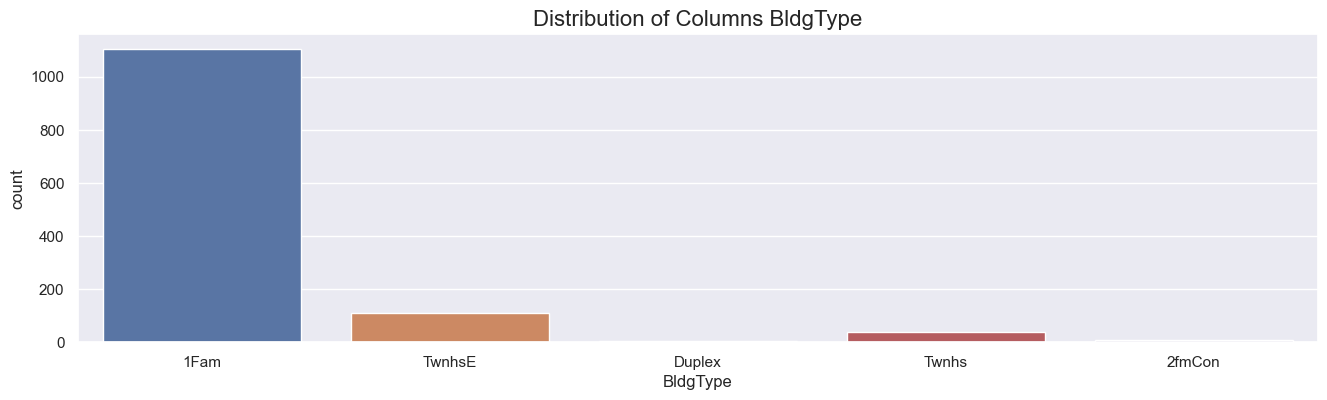

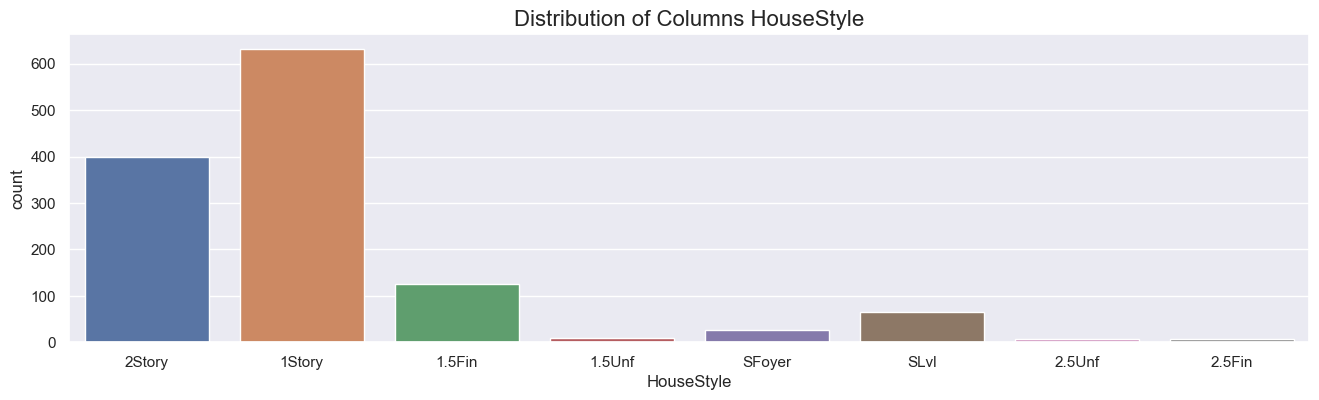

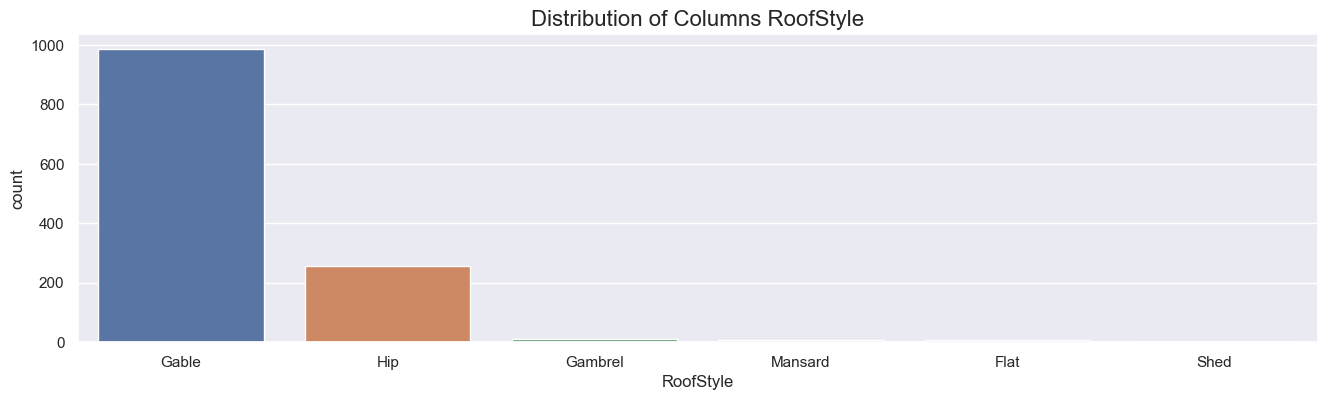

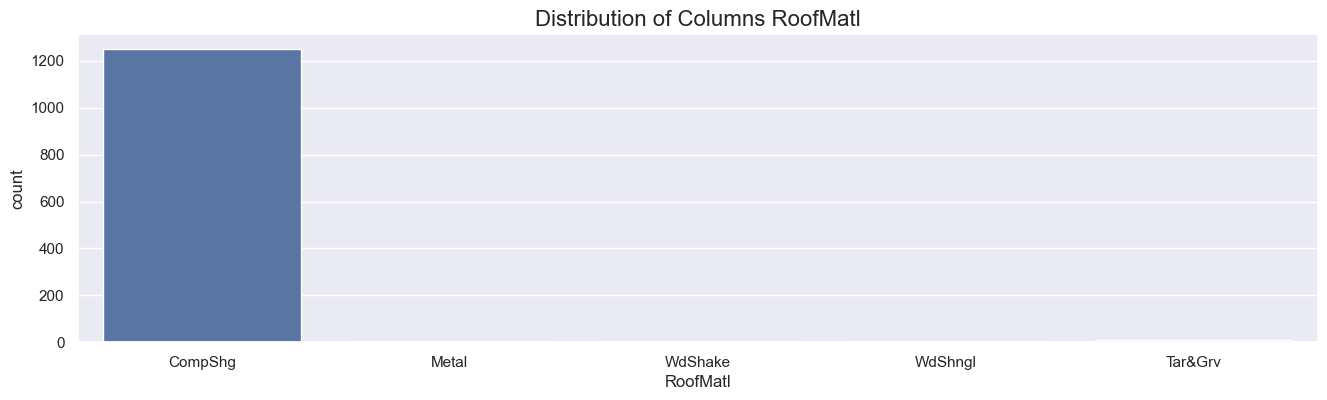

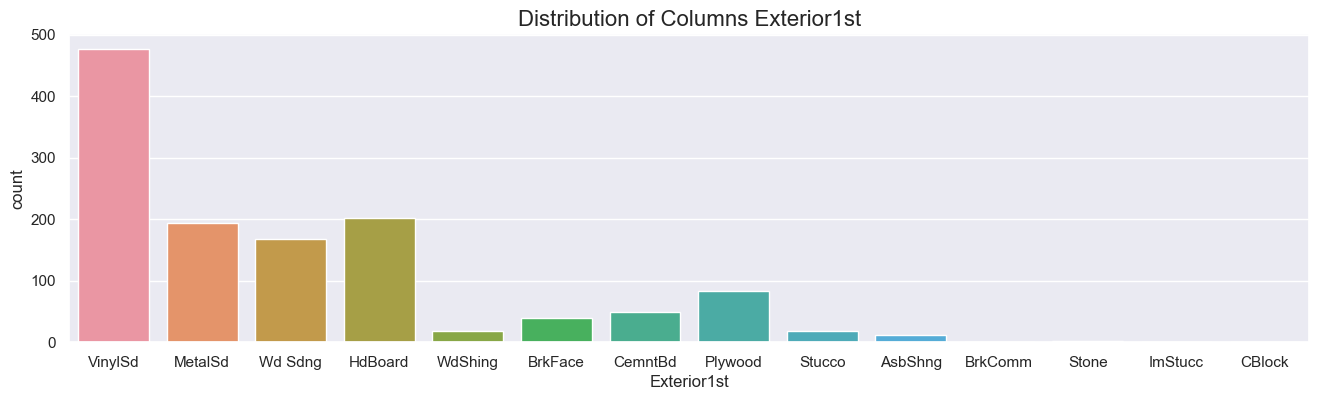

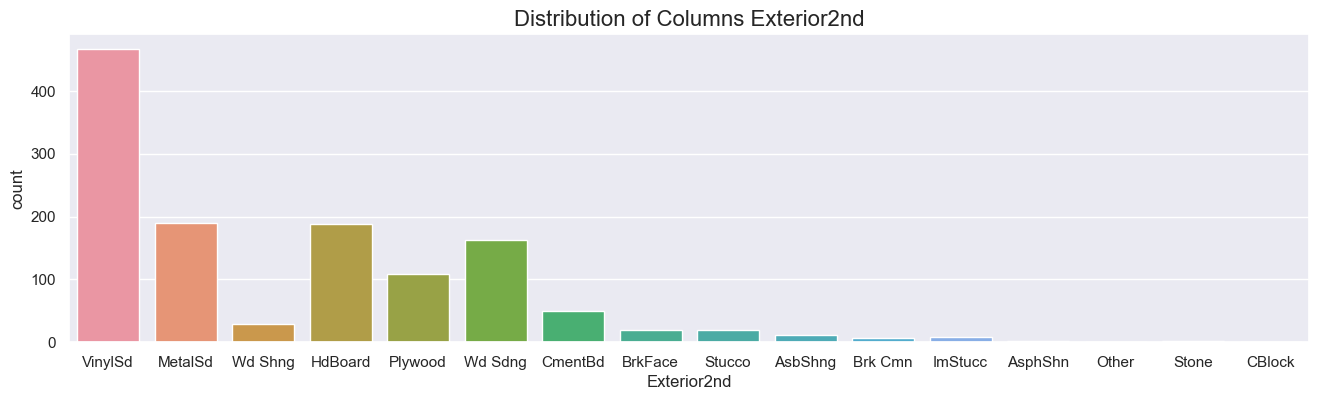

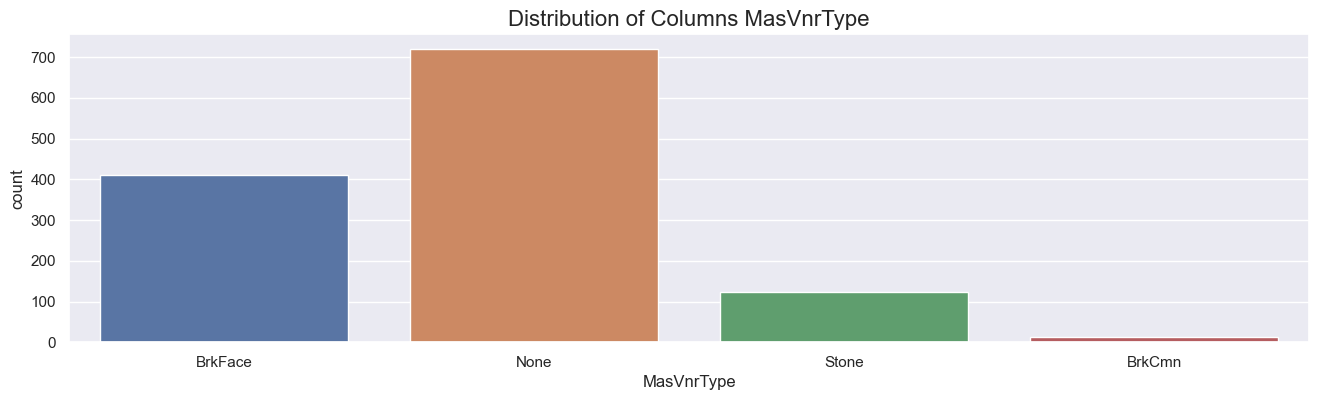

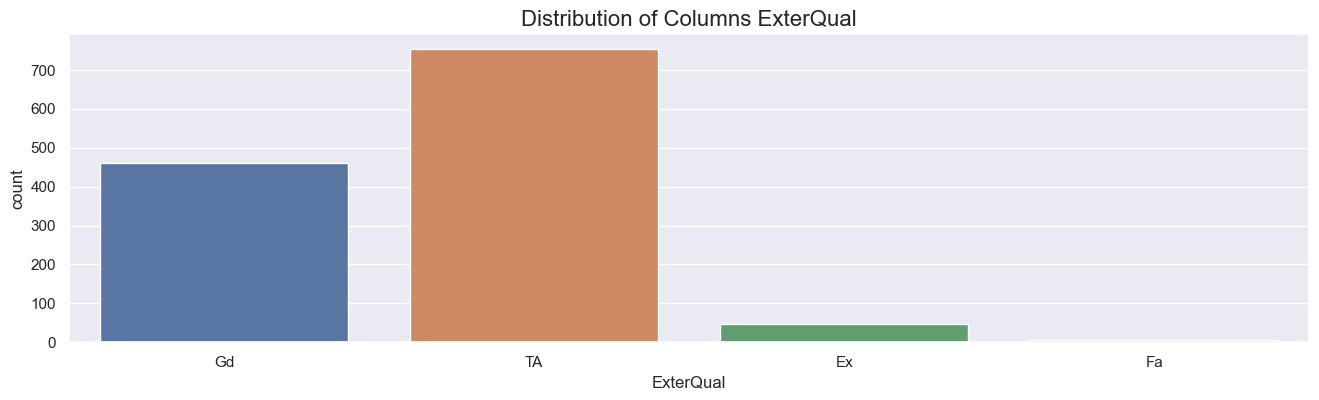

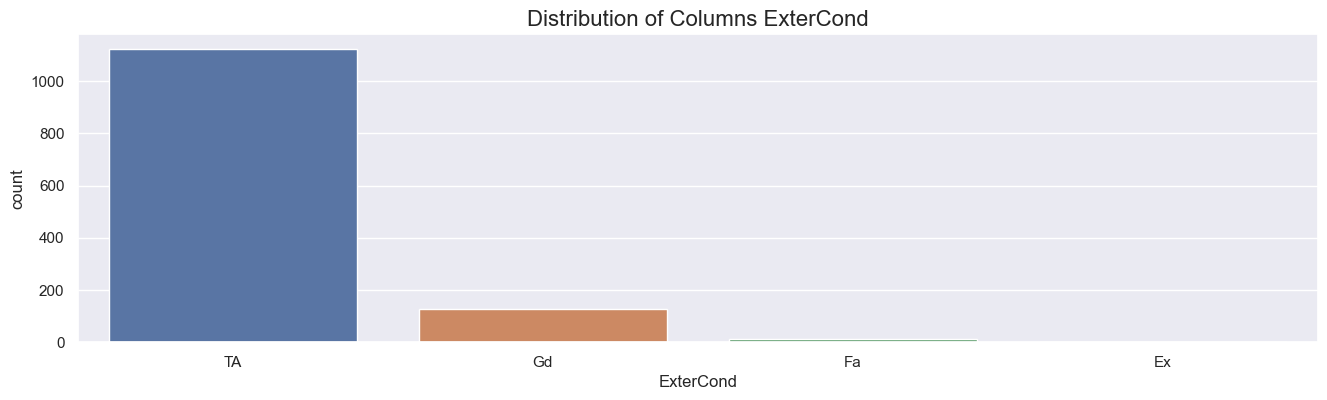

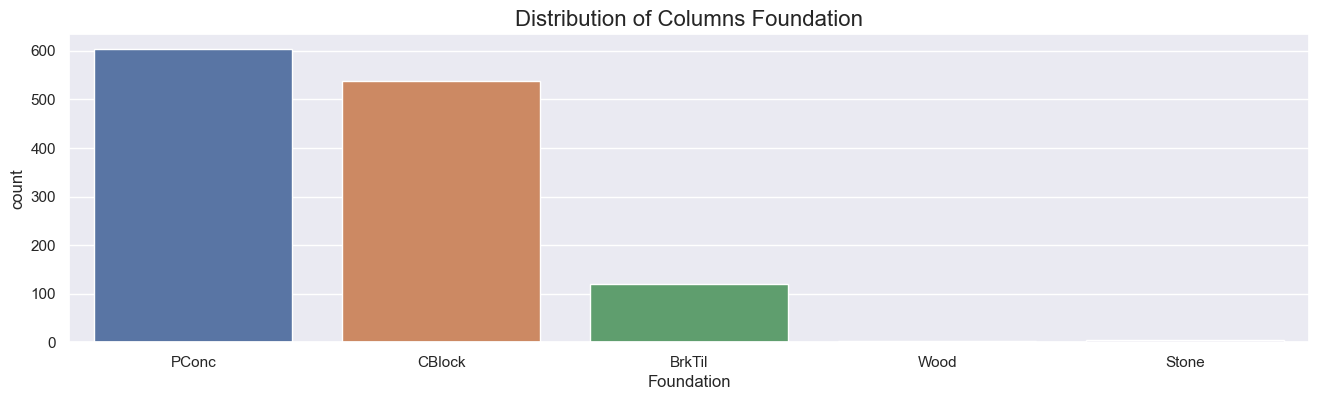

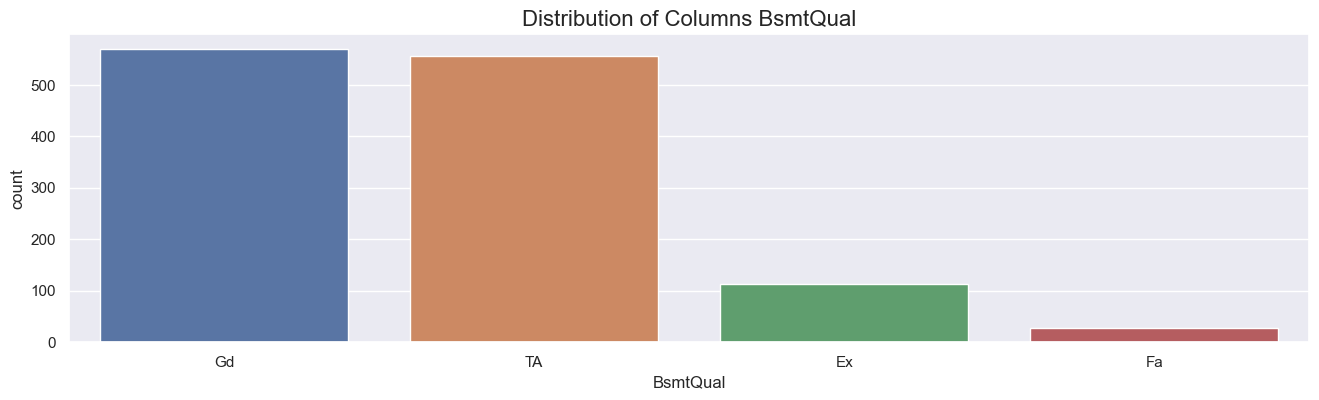

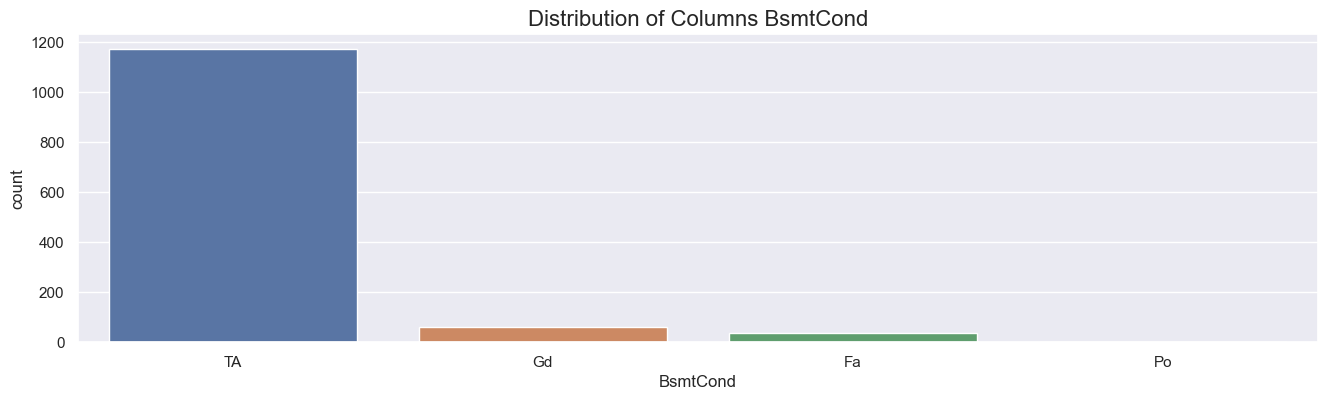

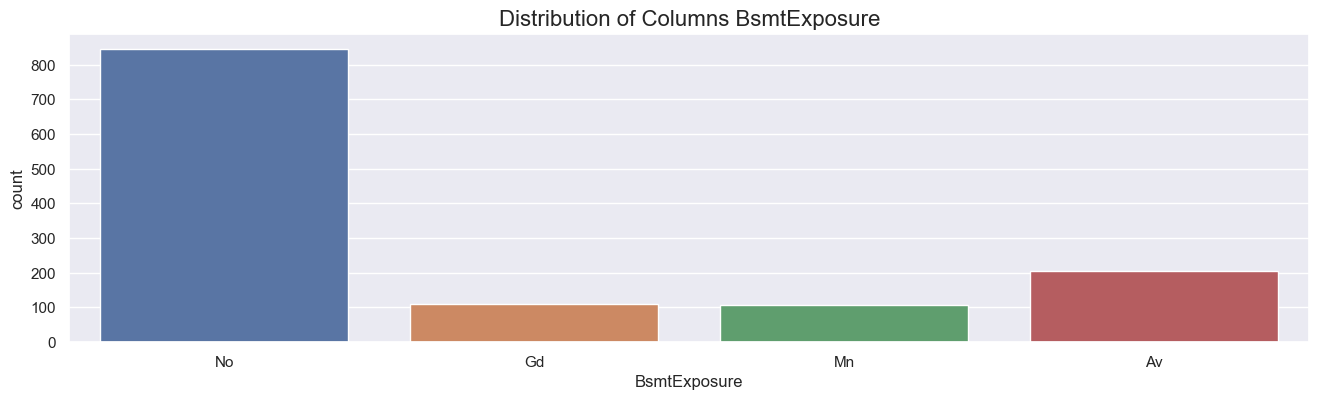

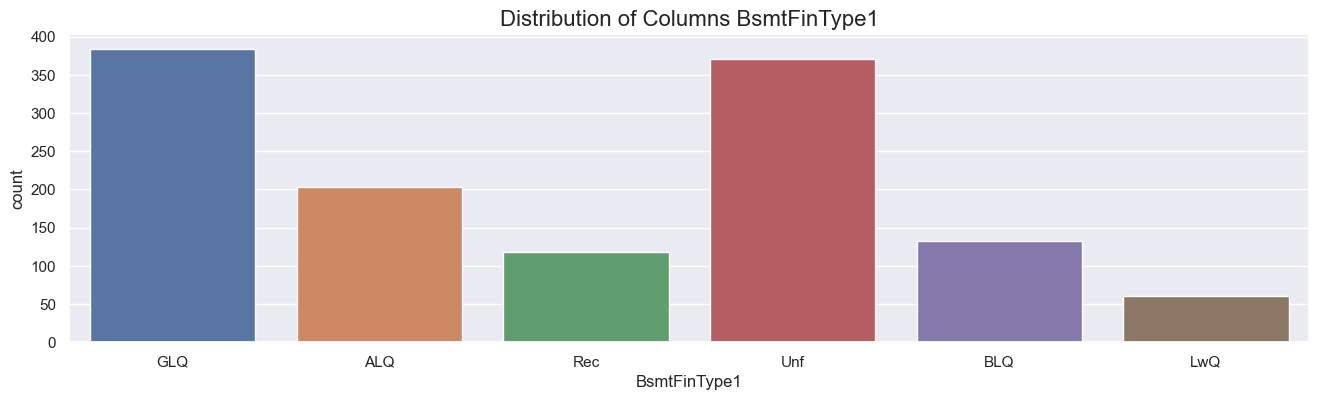

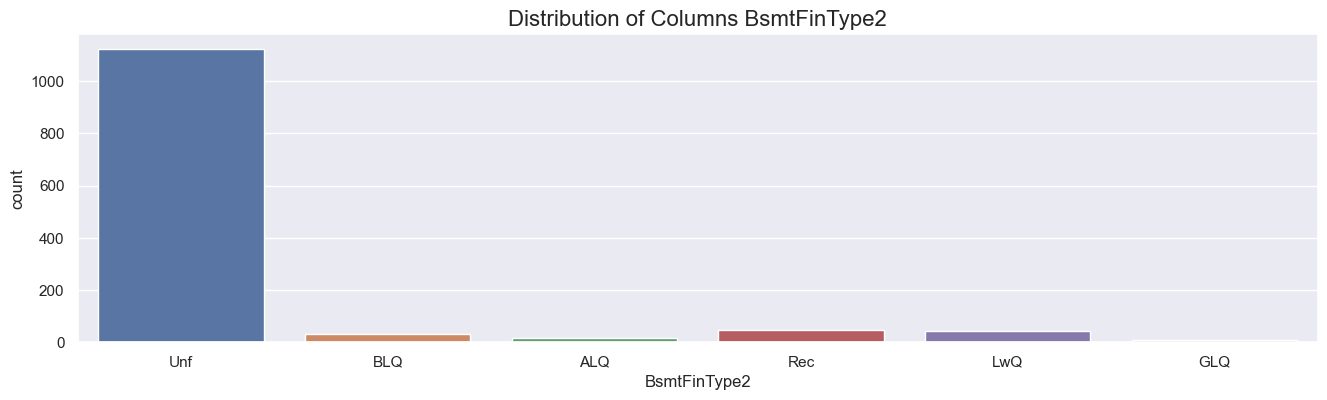

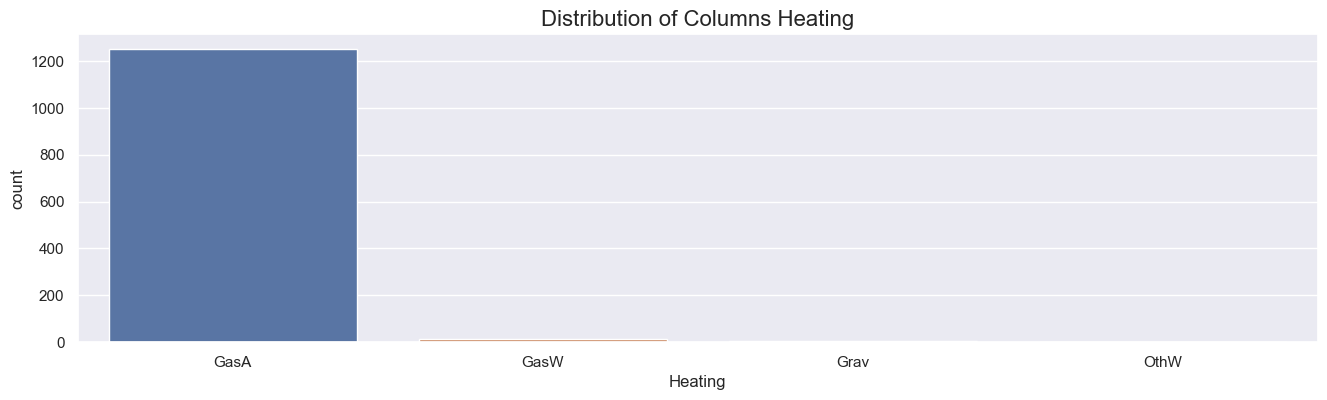

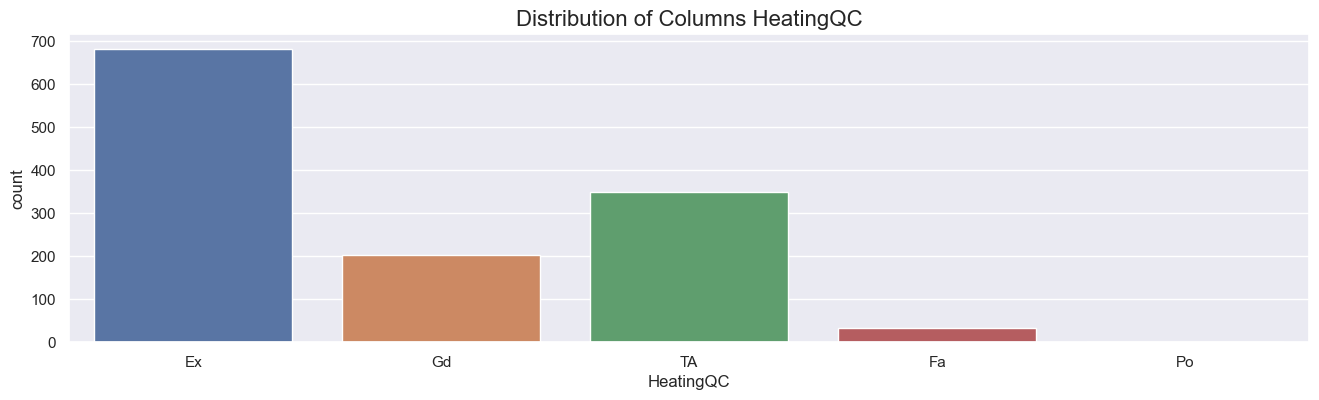

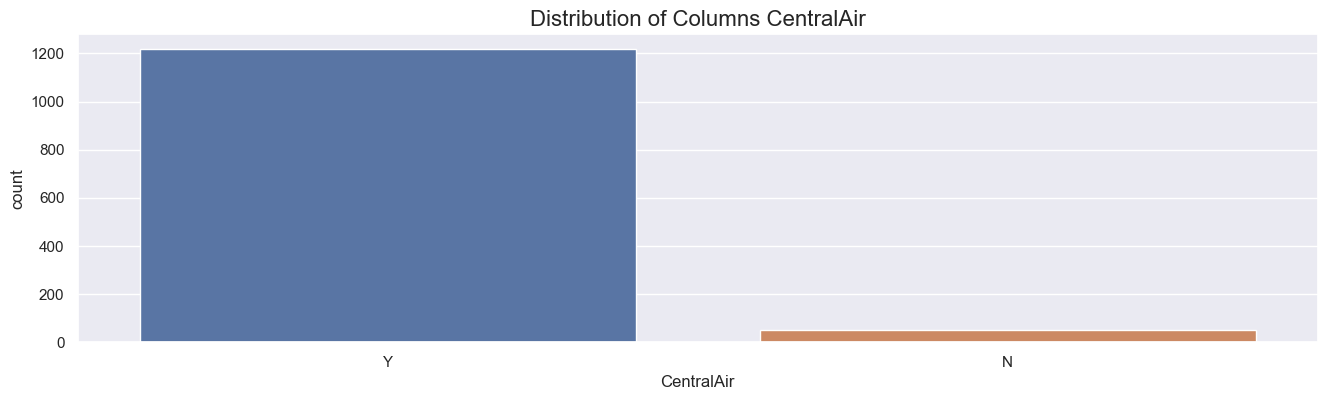

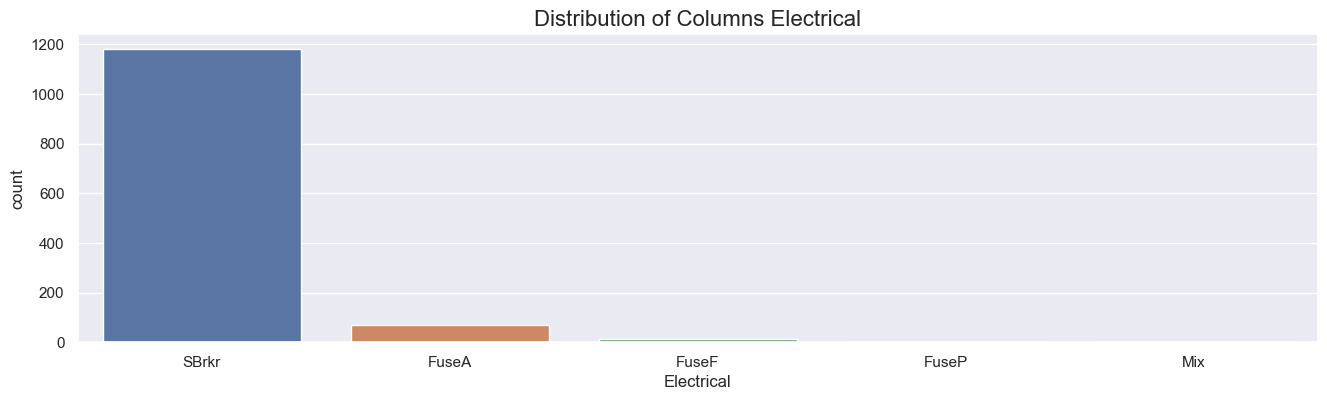

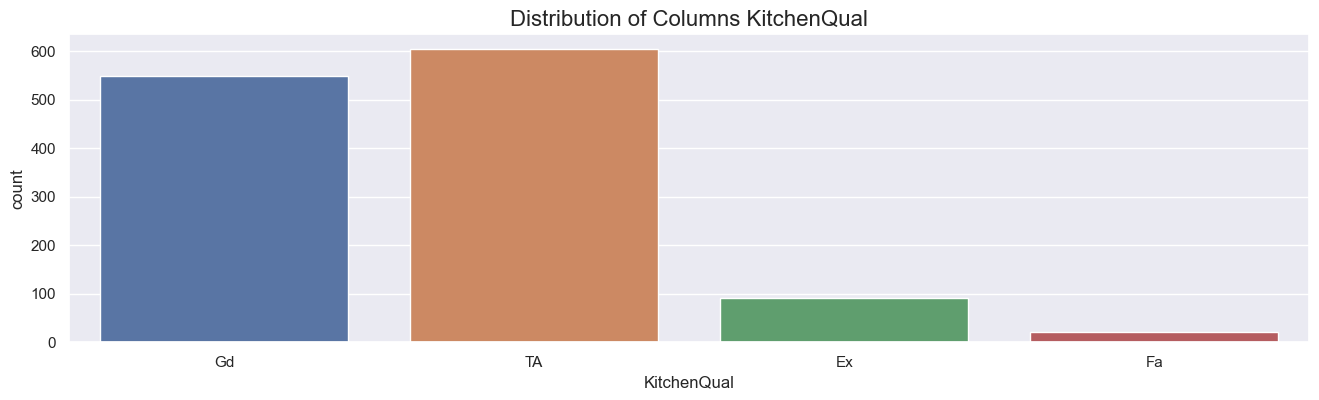

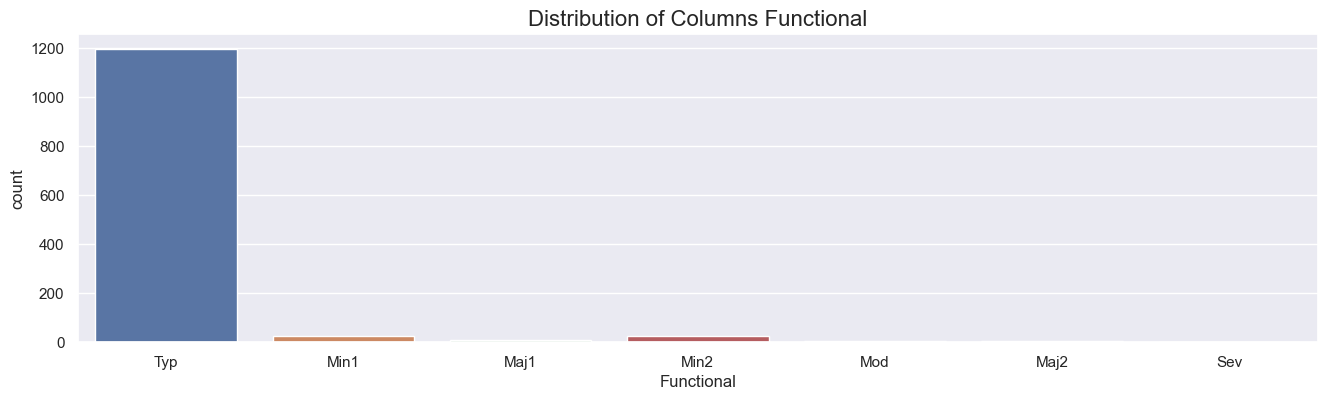

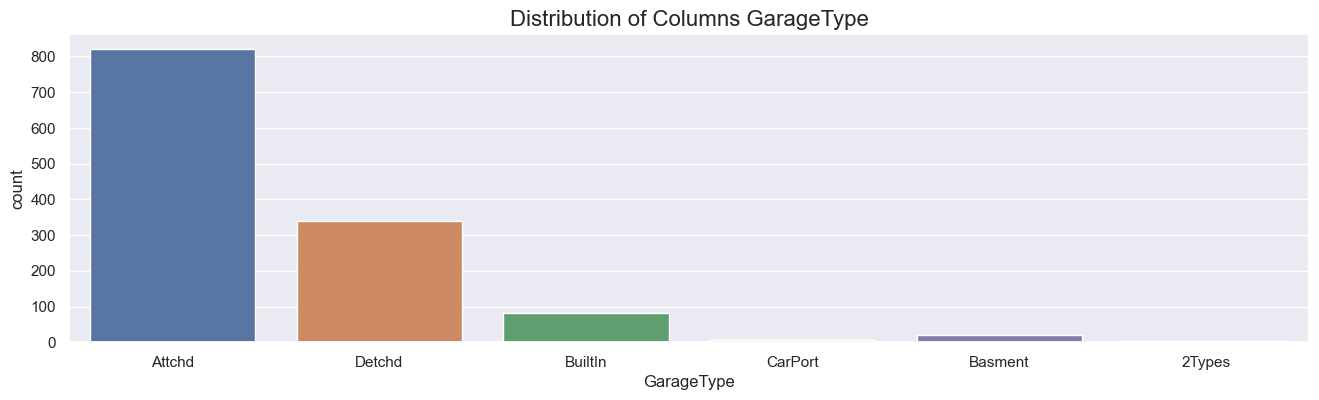

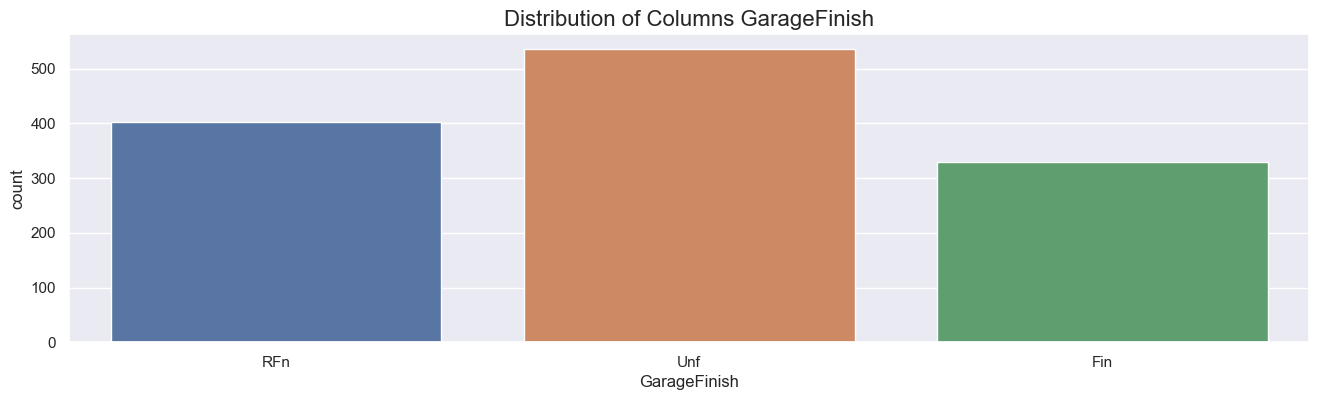

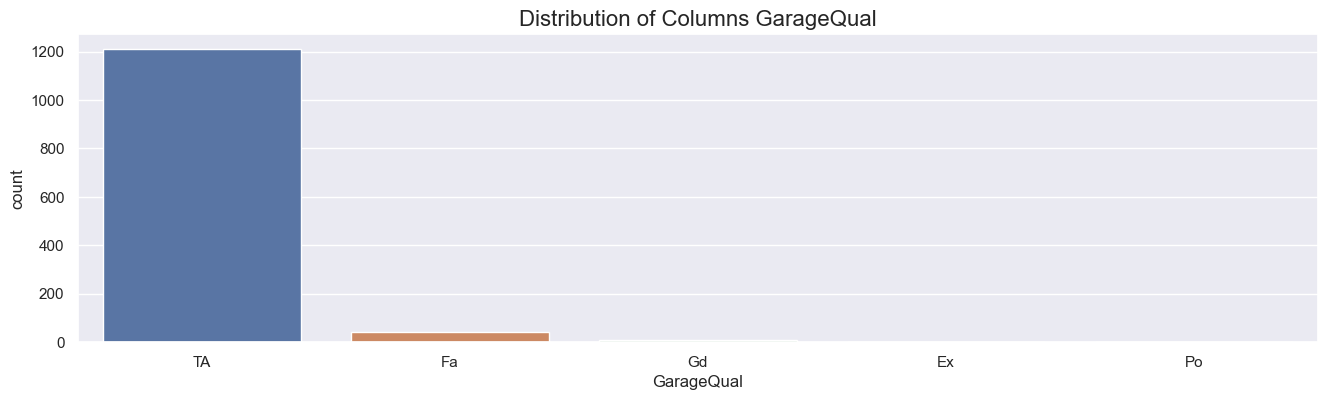

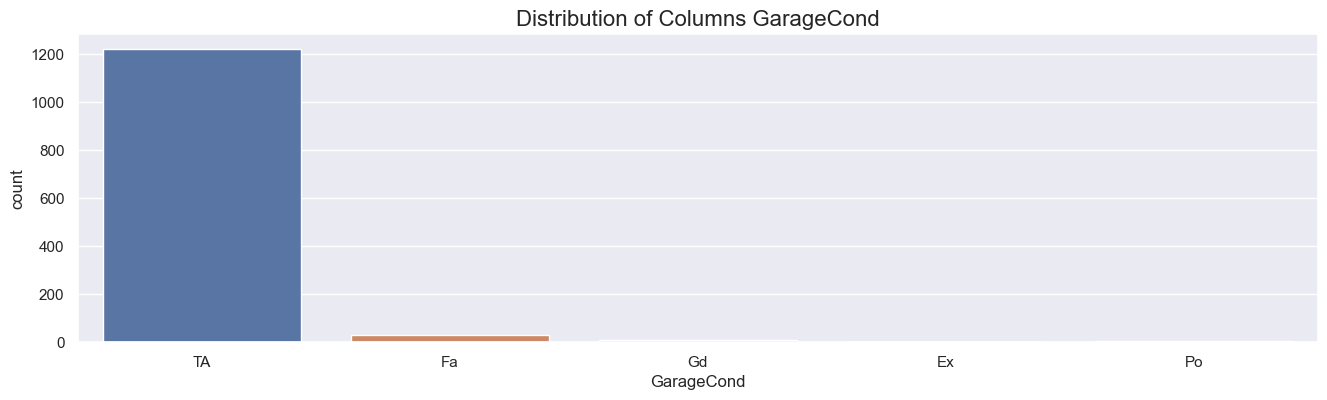

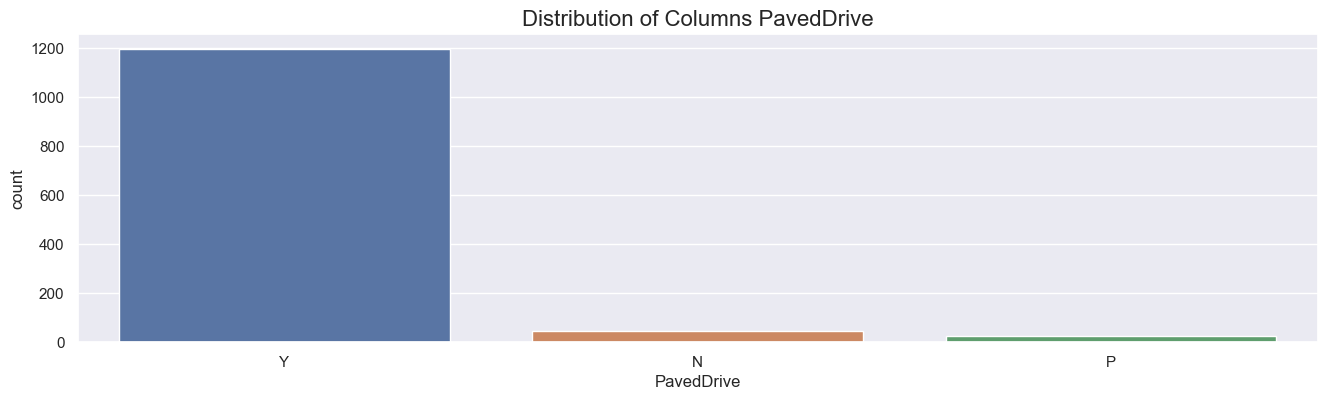

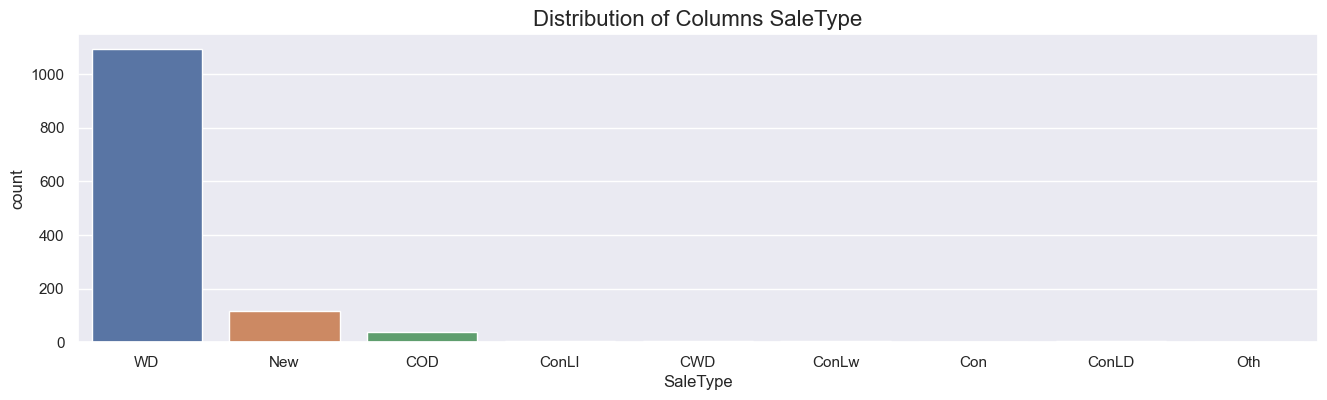

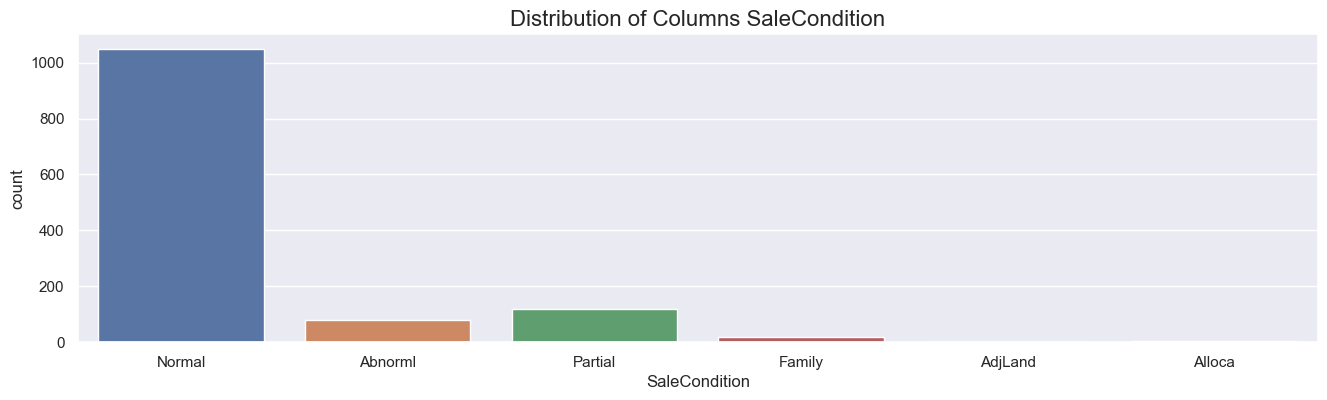

In [33]:
# Checking Categroical columns distribution ----  count 24
for x in range(1,int(len(cat_cols)+1)):
  fig,axes=plt.subplots()
  sns.countplot(house_data[cat_cols[x-1]])
  axes.set_title('Distribution of Columns '+cat_cols[x-1],fontdict={'fontsize':16})
  fig.set_figheight(4)
  fig.set_figwidth(16)
plt.show()

In [34]:
# Removing the Columns with very imbalaced class distribution
cols_to_remove=['Street','Utilities','Condition1','Condition2','RoofMatl','Heating']
# Removing Columns
house_data=house_data.drop(columns=cols_to_remove,axis=1)
## Categorical Columns
cat_cols=[x for x in house_data.columns if x not in cont_cols and x !='SalePrice']
# Printing columns
print('Categorical columns:',cat_cols, len(cat_cols))

Categorical columns: ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 33


## Bivariate Analyis

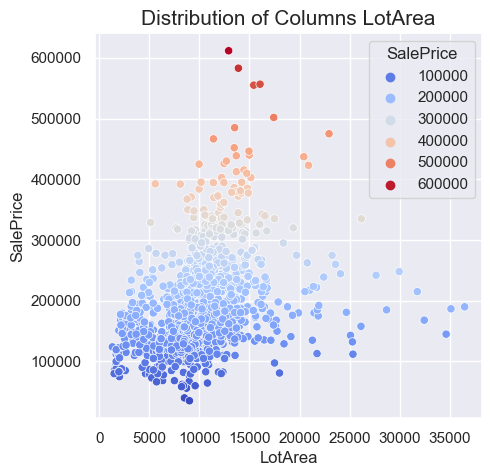

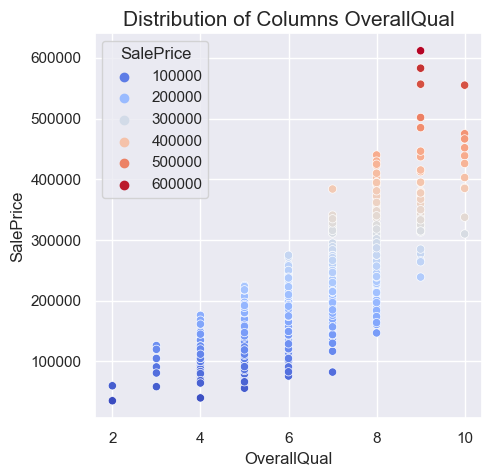

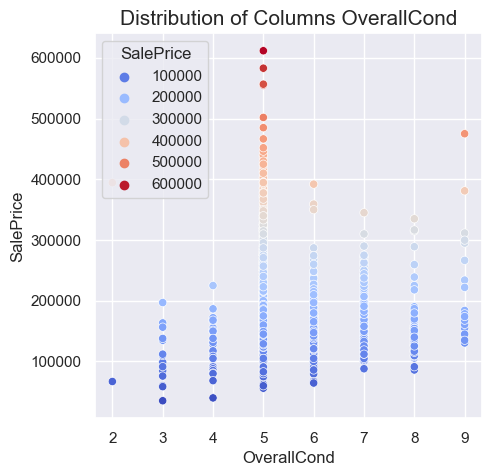

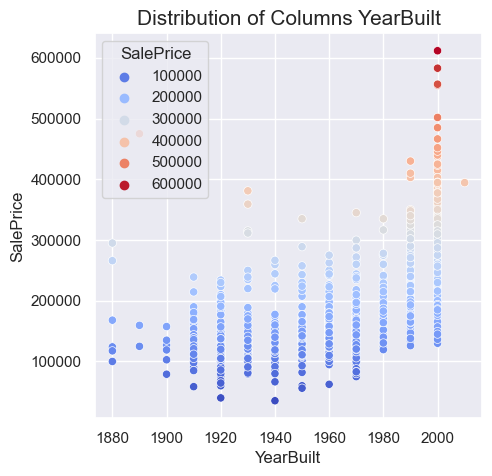

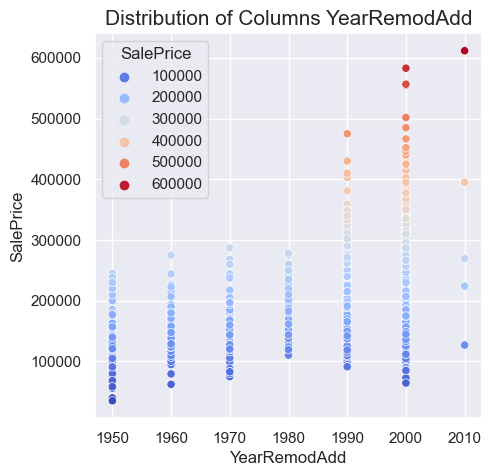

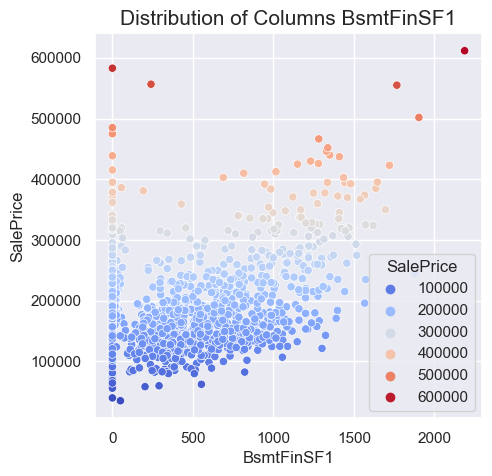

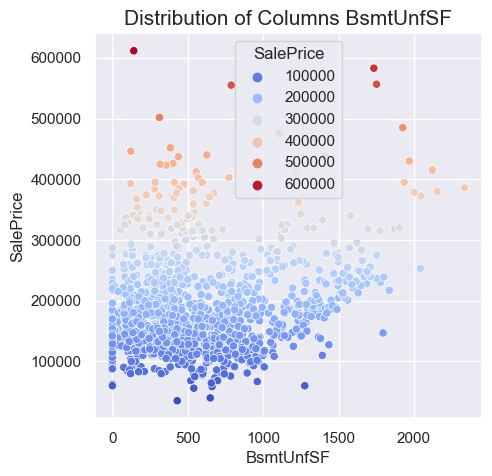

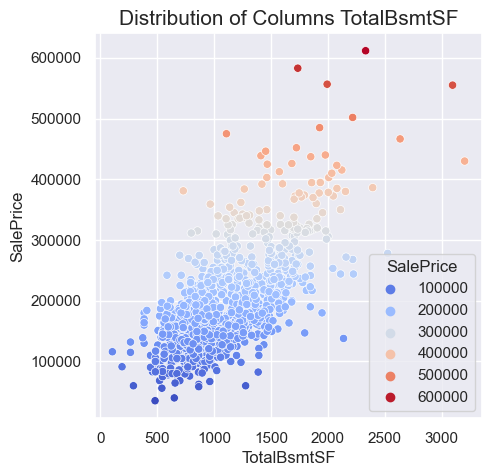

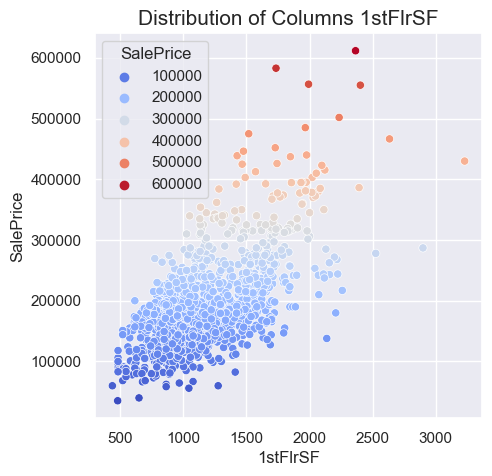

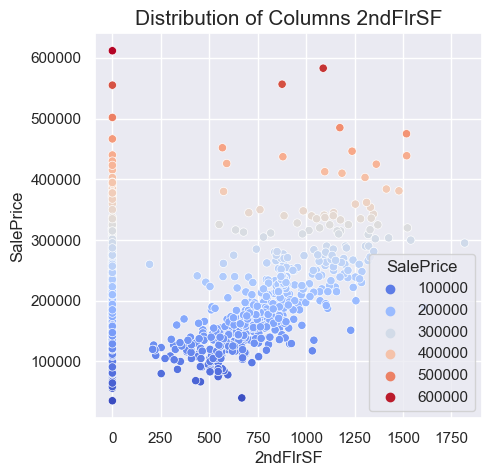

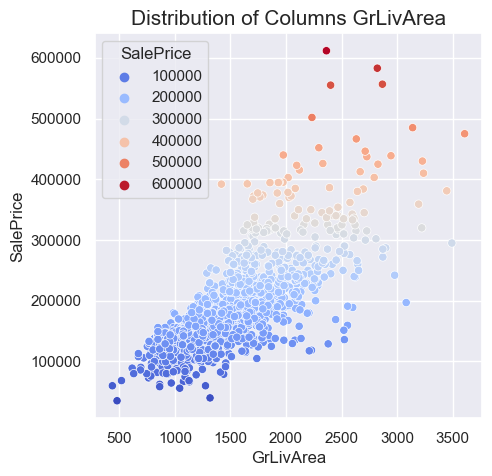

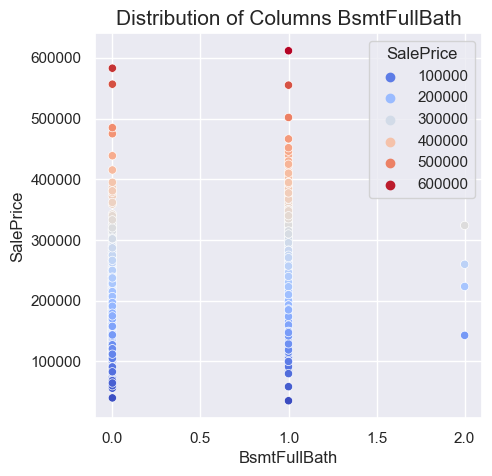

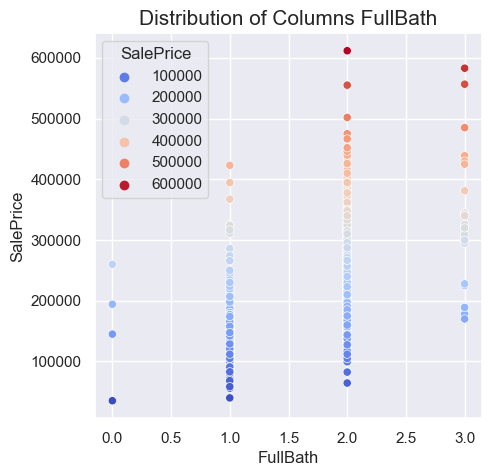

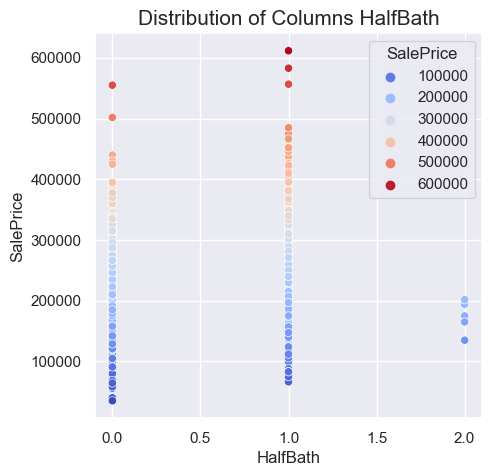

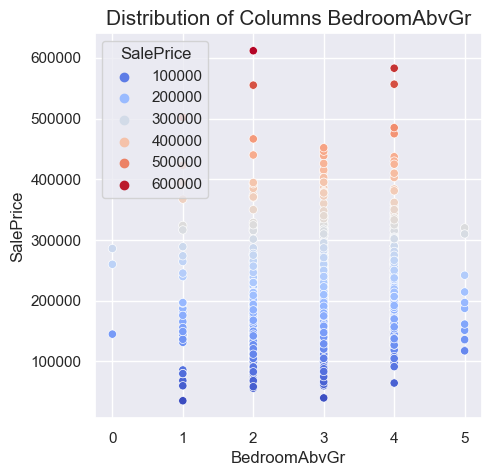

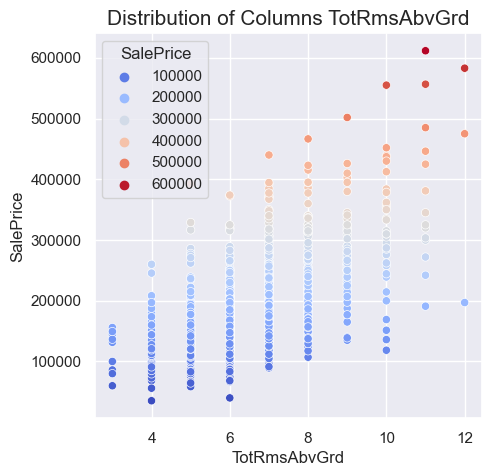

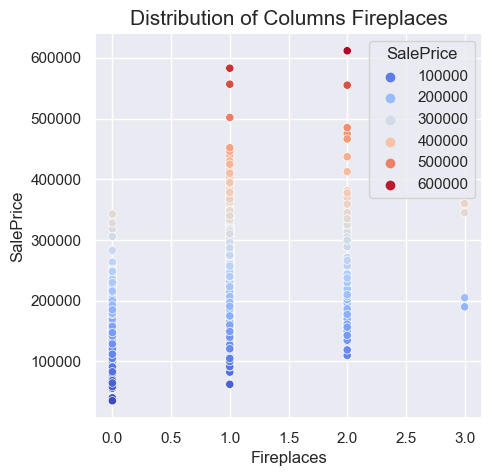

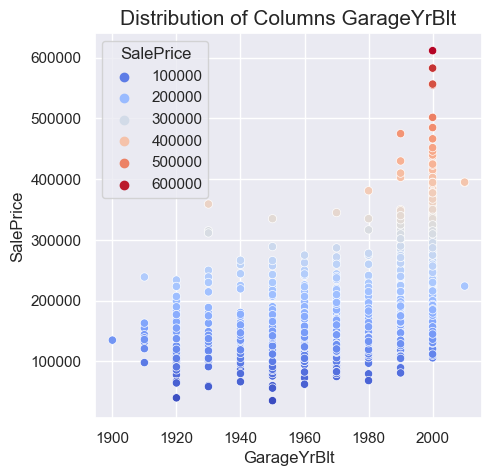

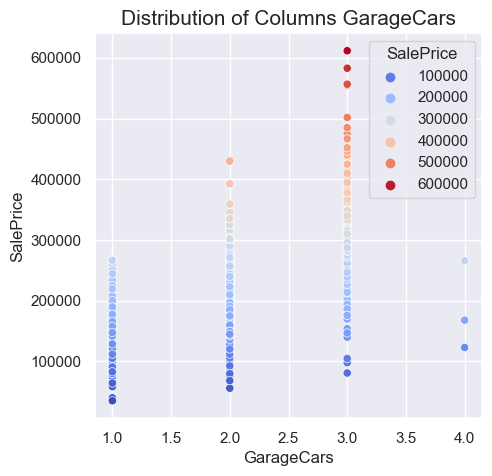

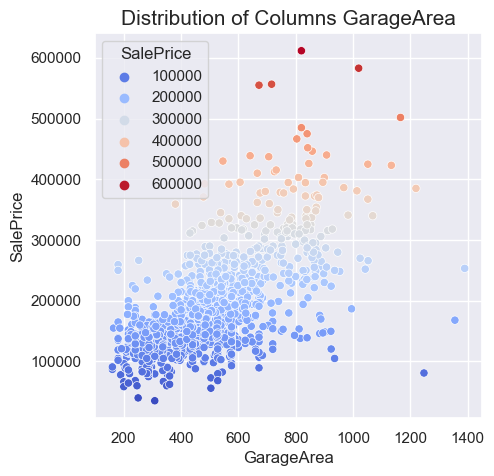

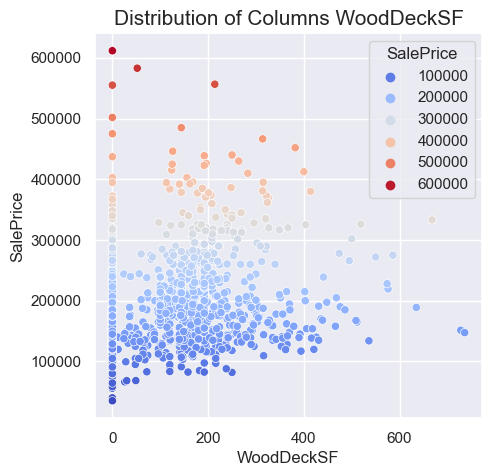

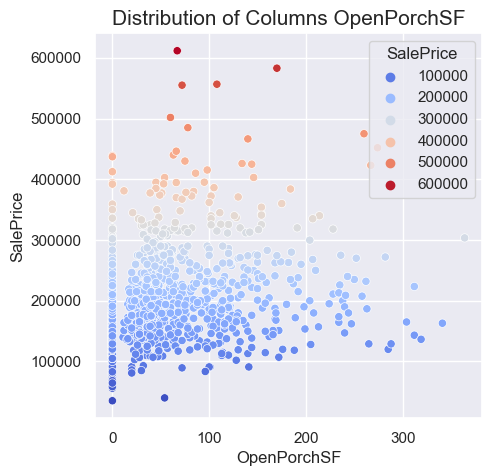

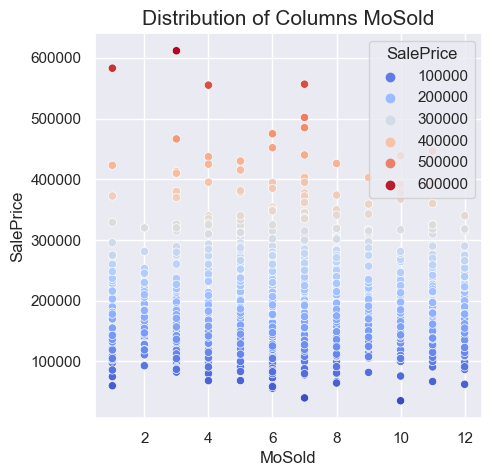

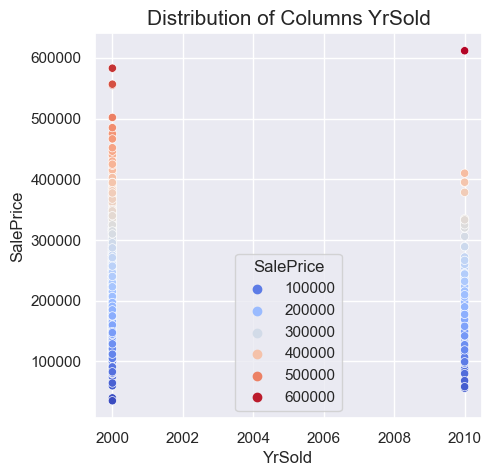

In [35]:
# Checking Continous columns relation to target
for x in range(1,int(len(cont_cols)+1)):
  fig,axes=plt.subplots()
  sns.scatterplot(house_data[cont_cols[x-1]],house_data.SalePrice,hue=house_data.SalePrice,palette='coolwarm')
  axes.set_title('Distribution of Columns '+cont_cols[x-1],fontdict={'fontsize':15})
  fig.set_figheight(5)
  fig.set_figwidth(5)
plt.show()

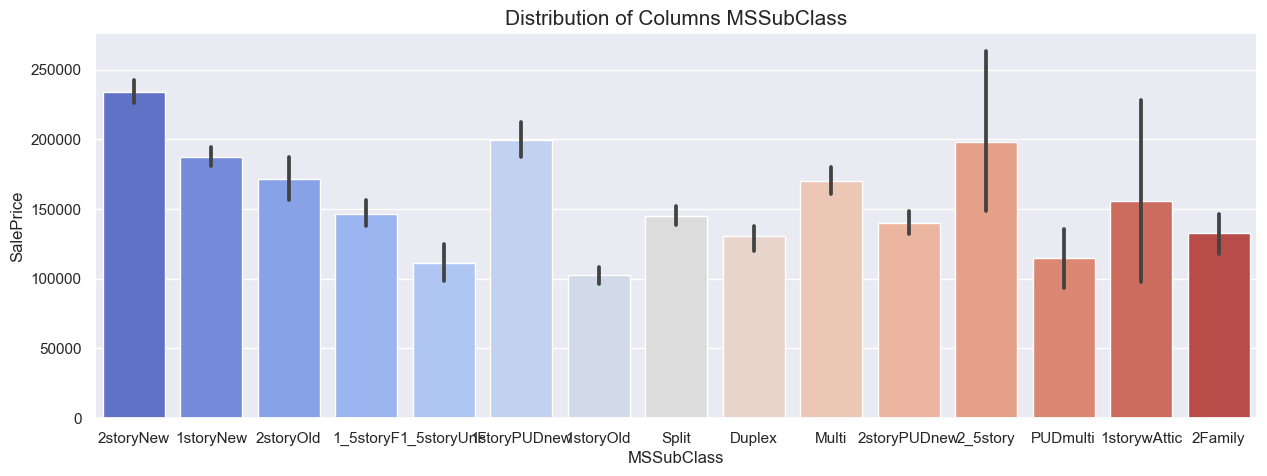

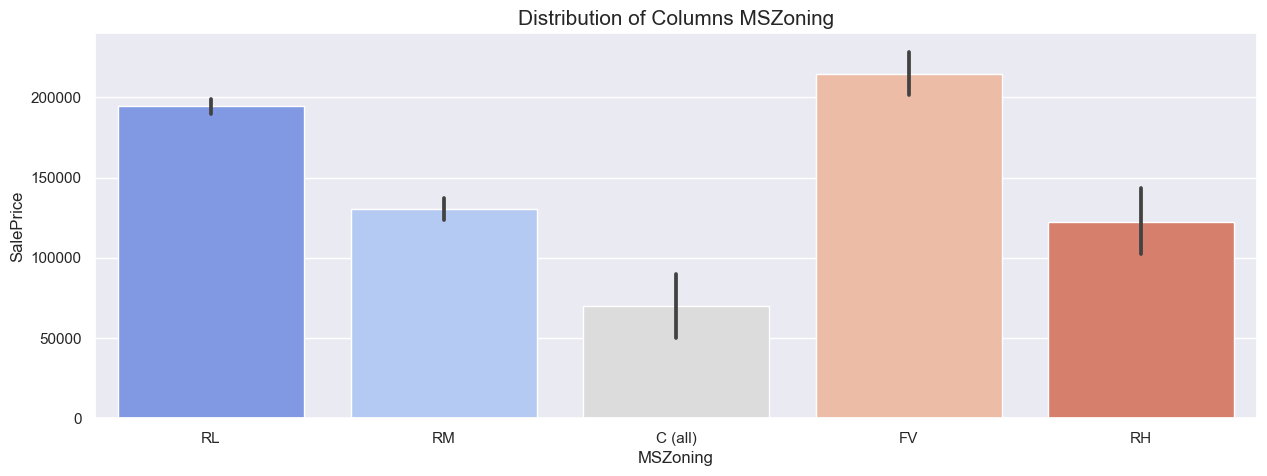

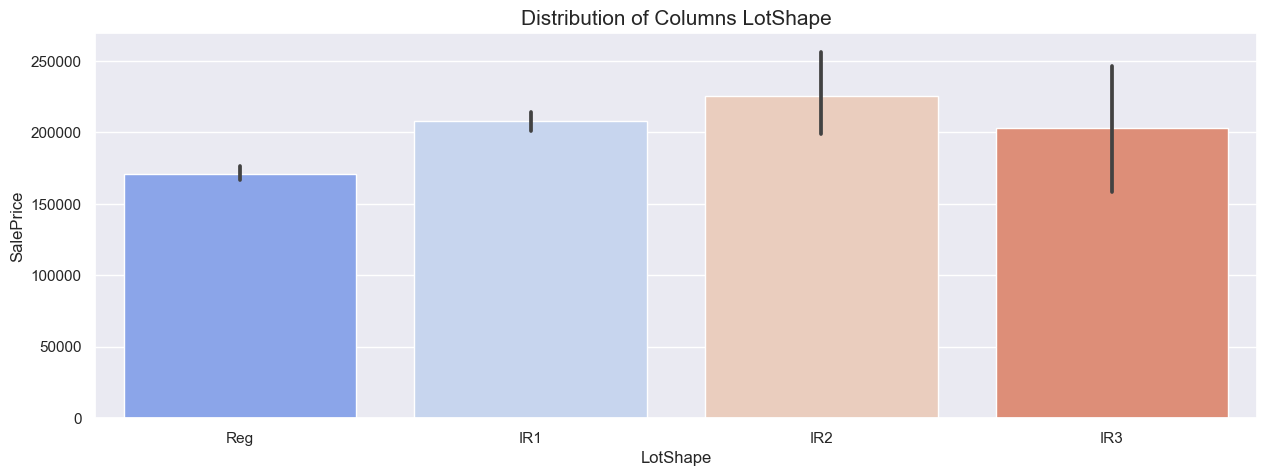

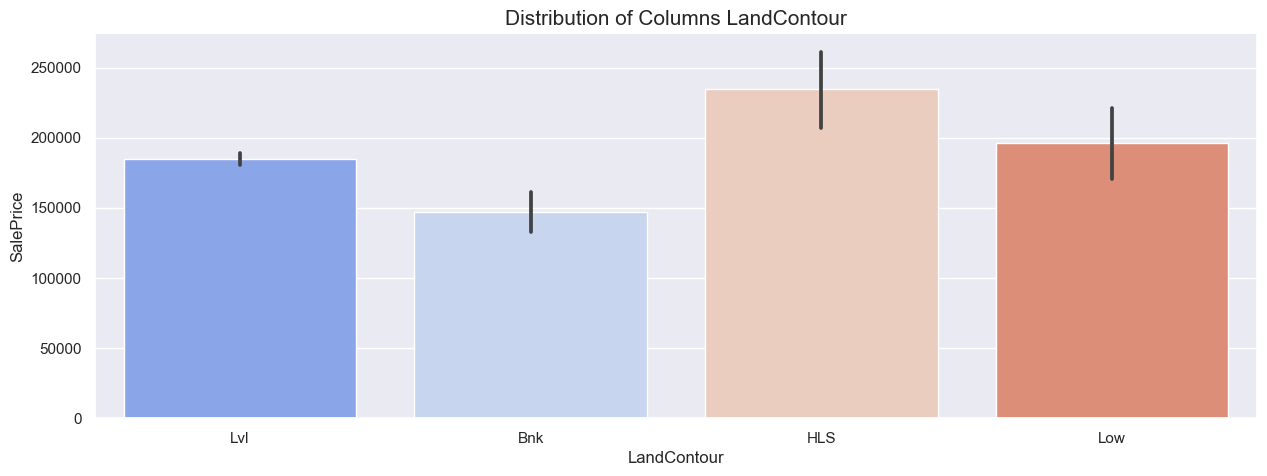

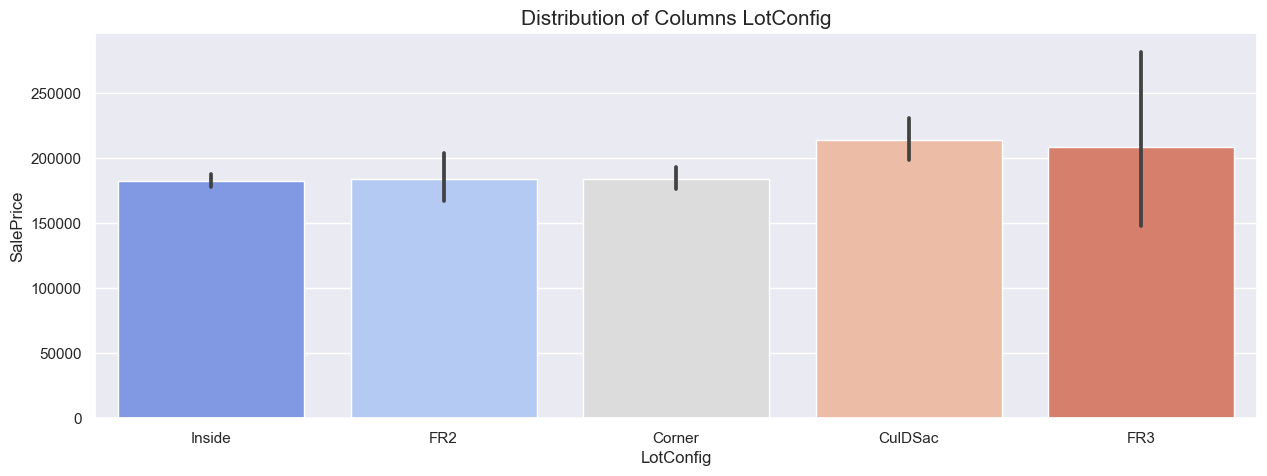

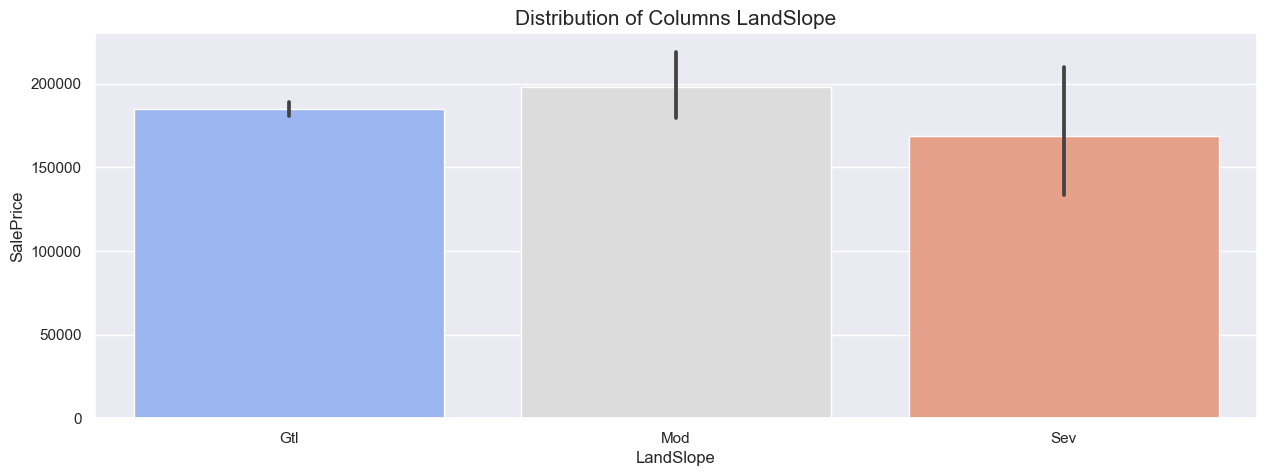

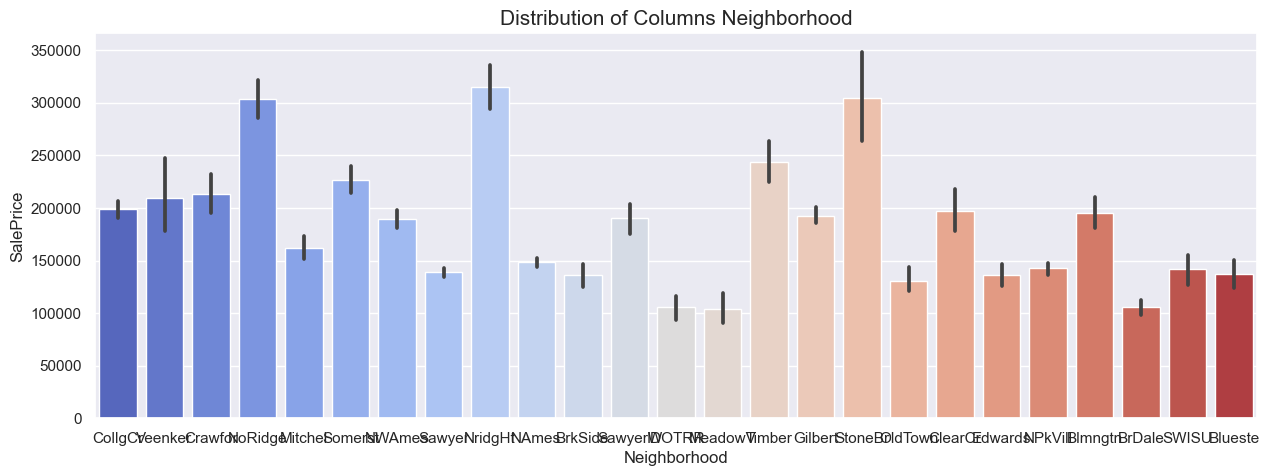

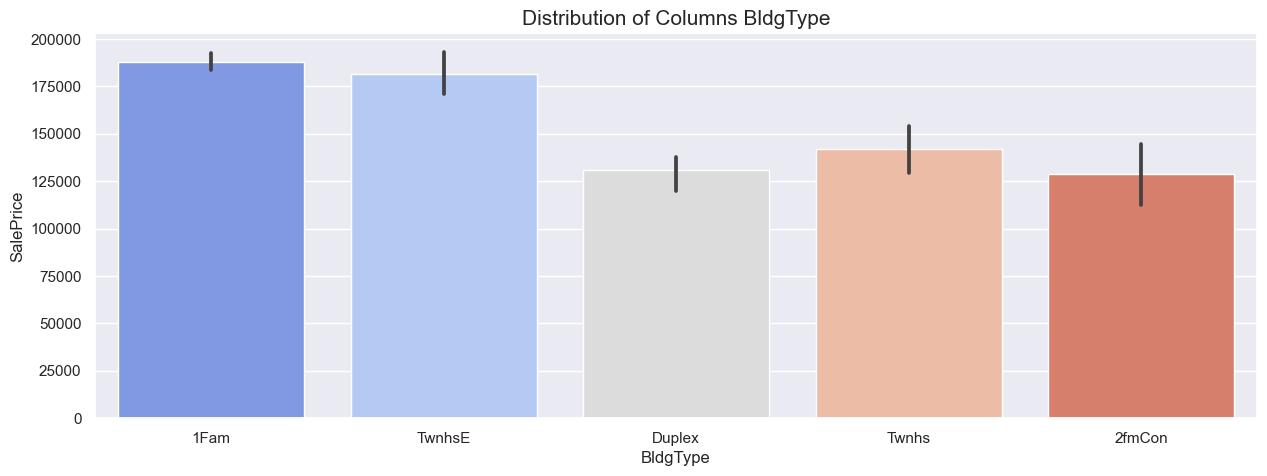

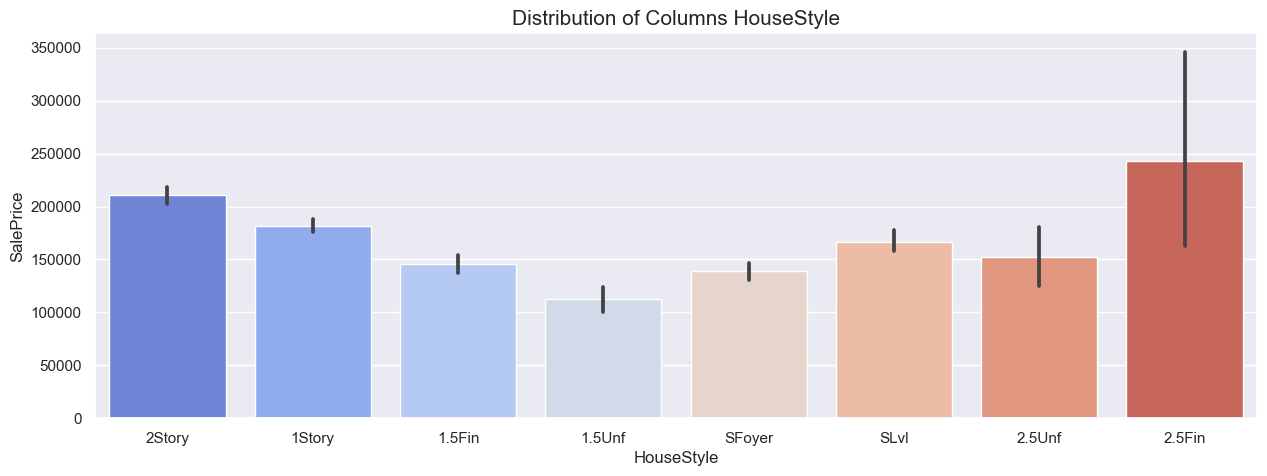

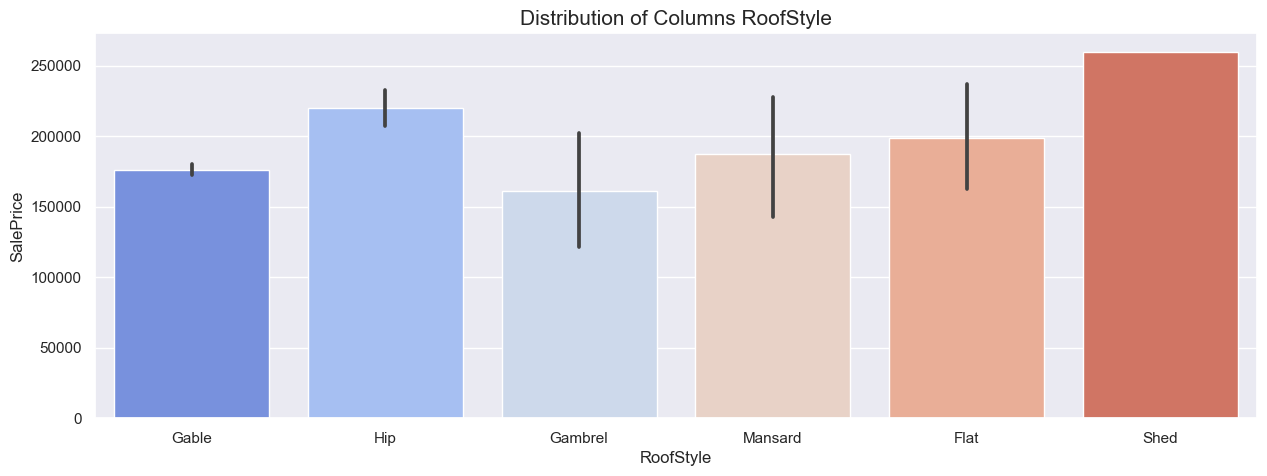

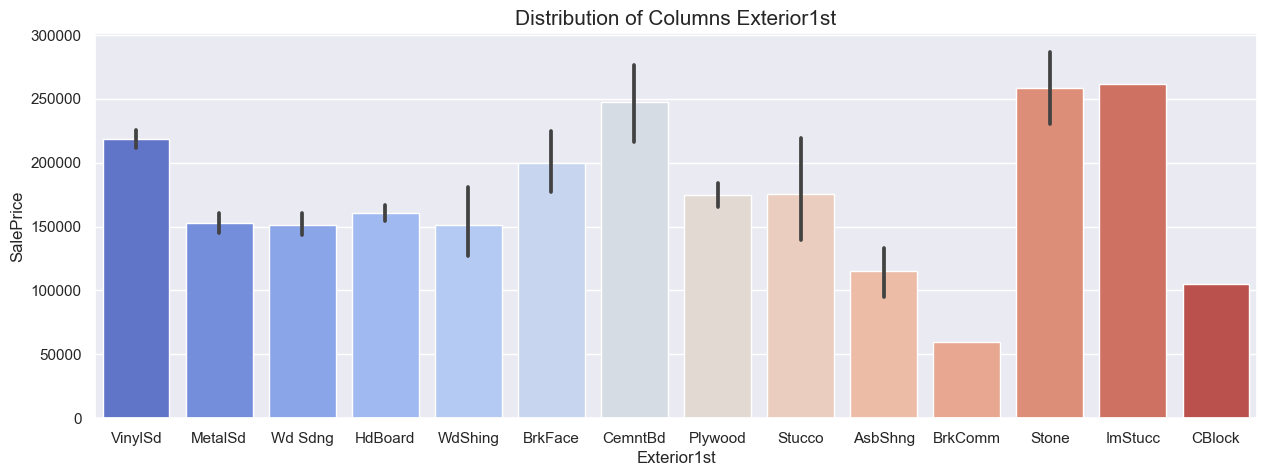

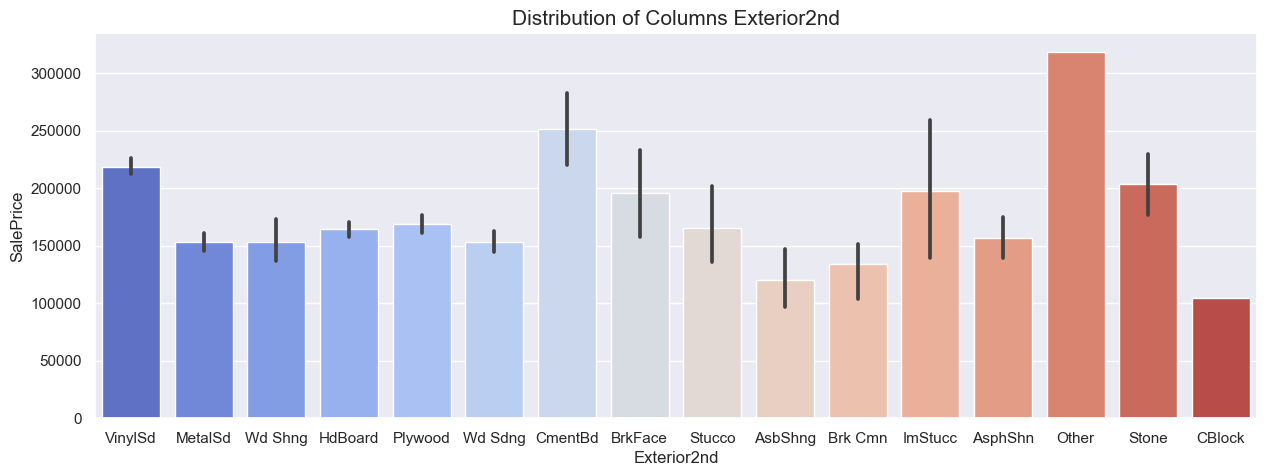

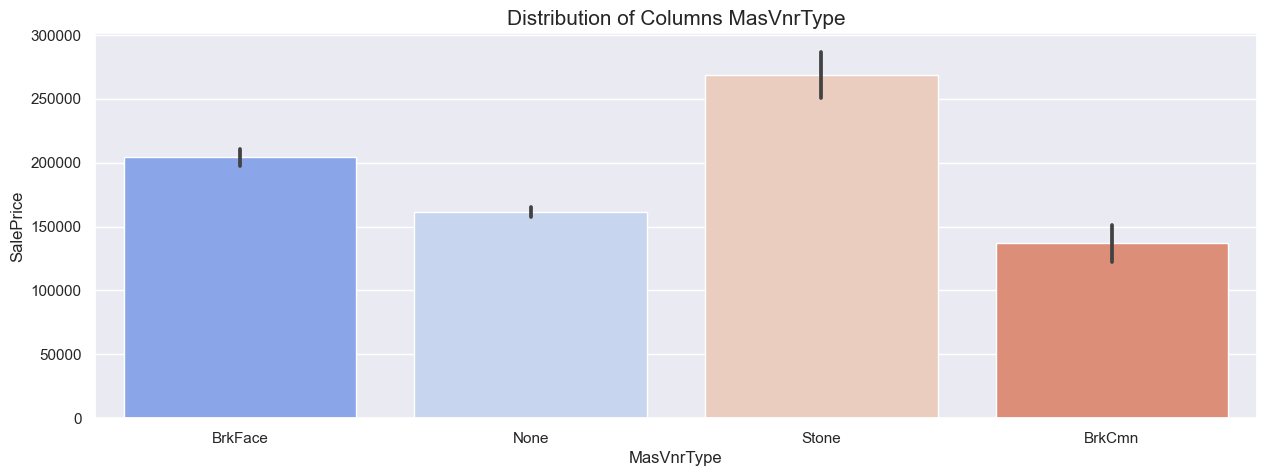

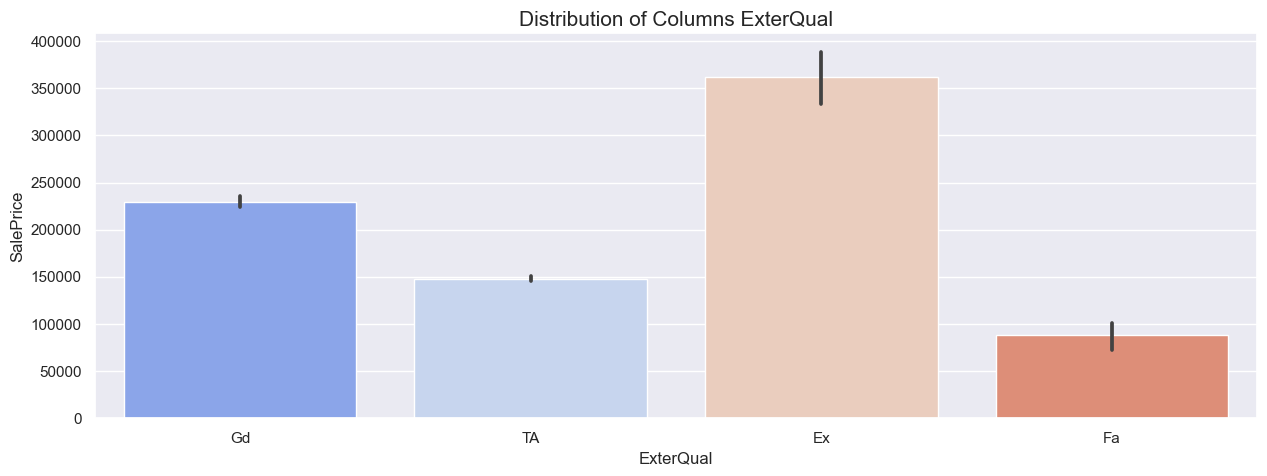

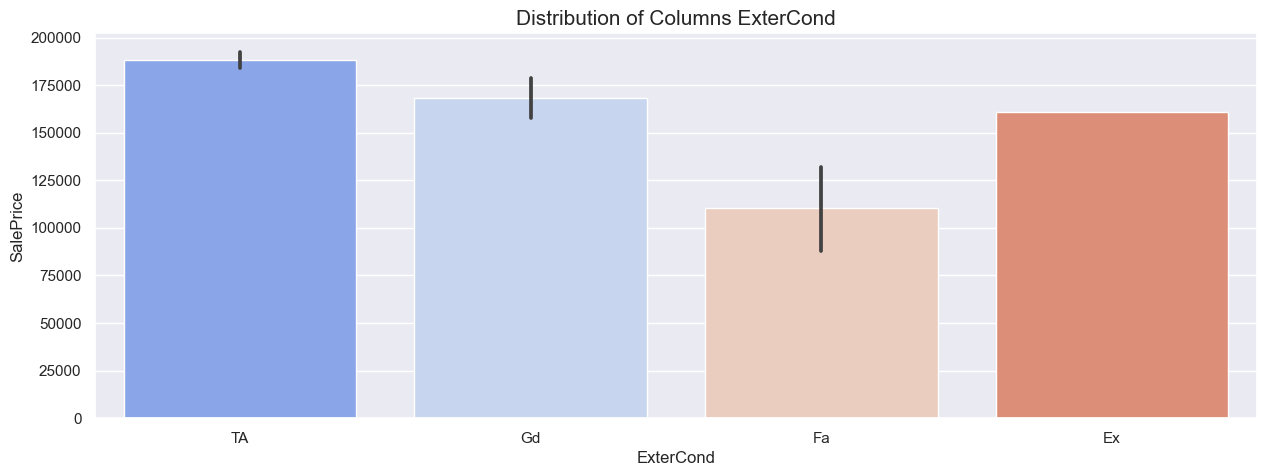

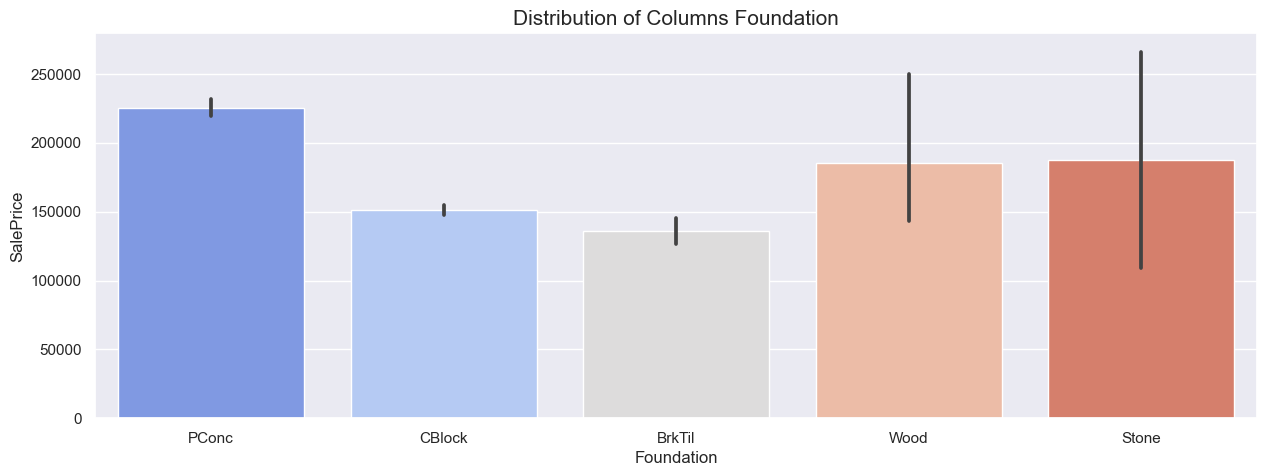

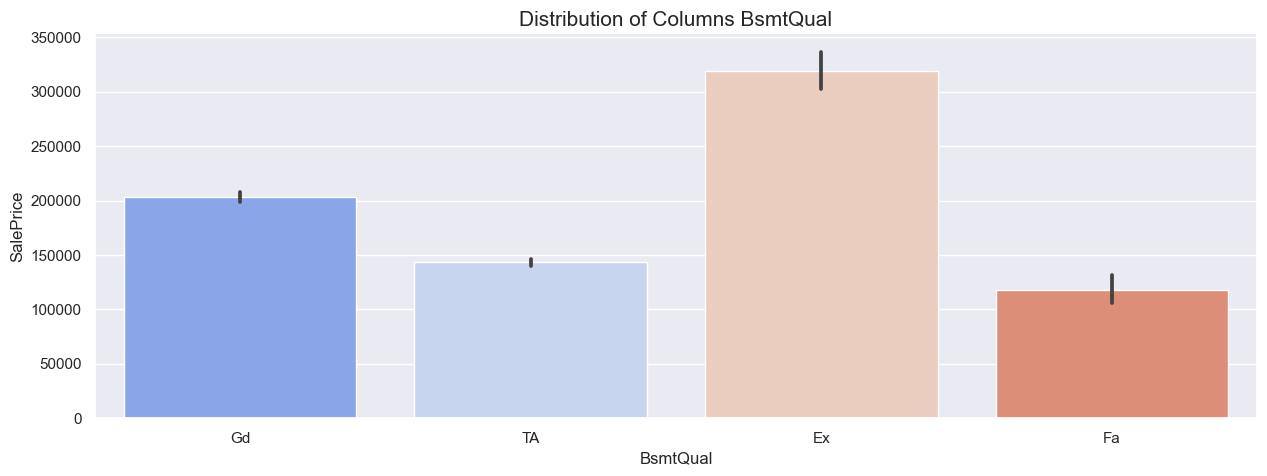

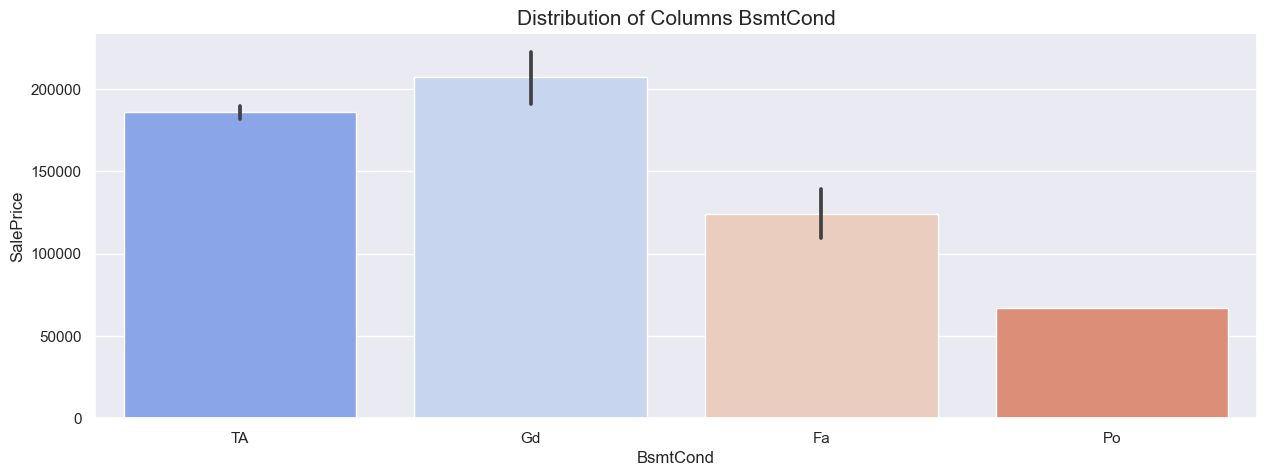

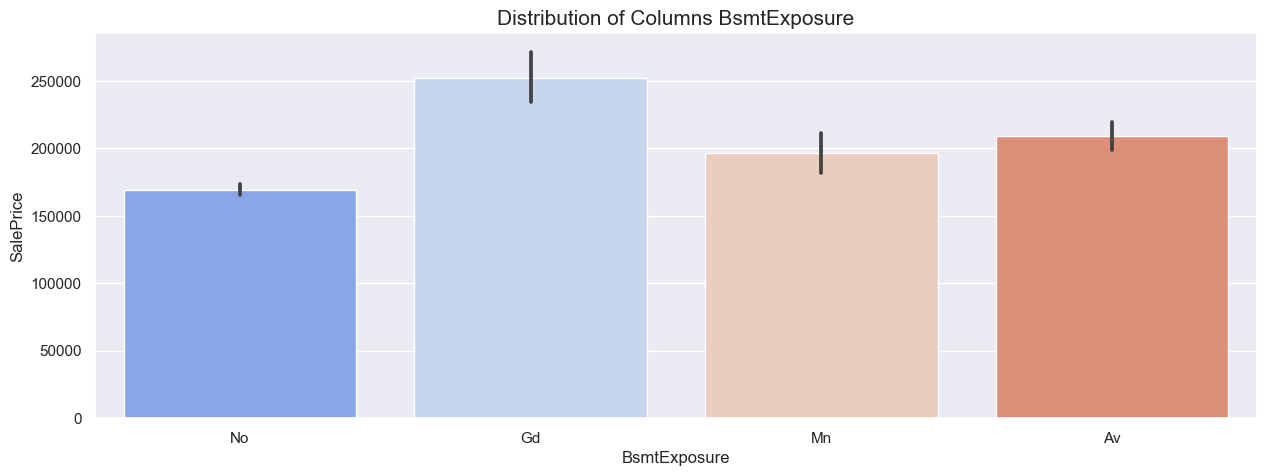

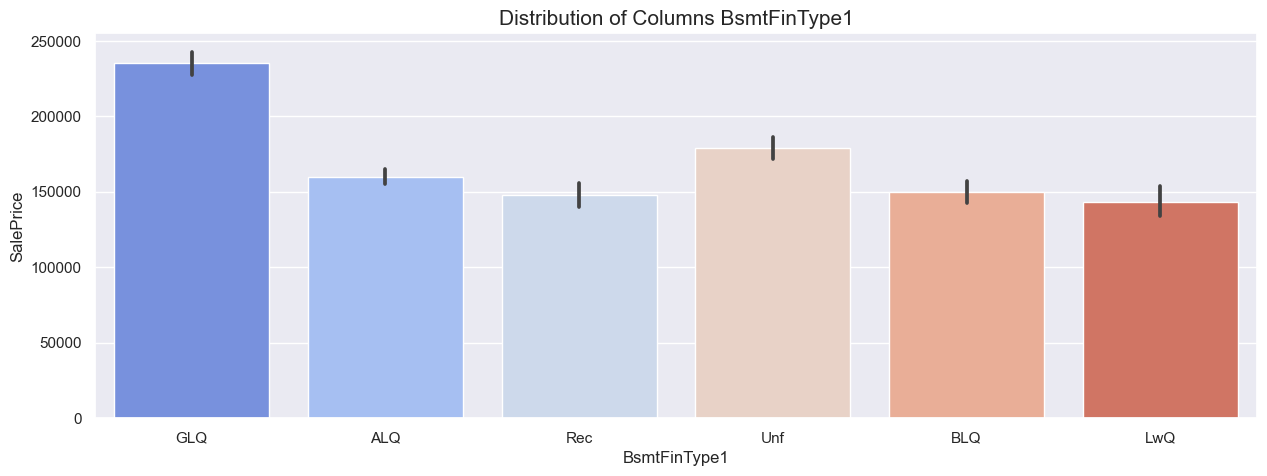

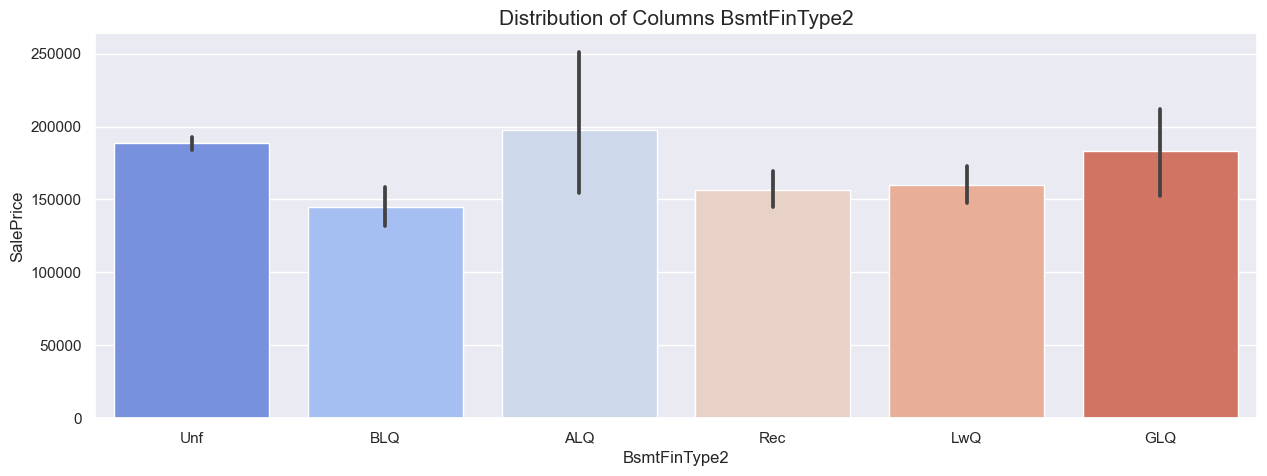

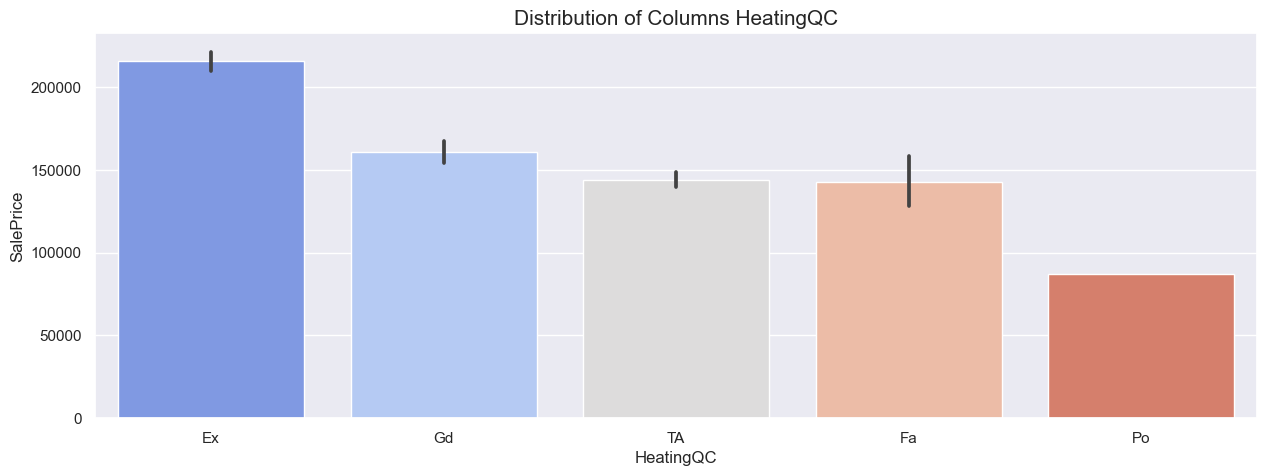

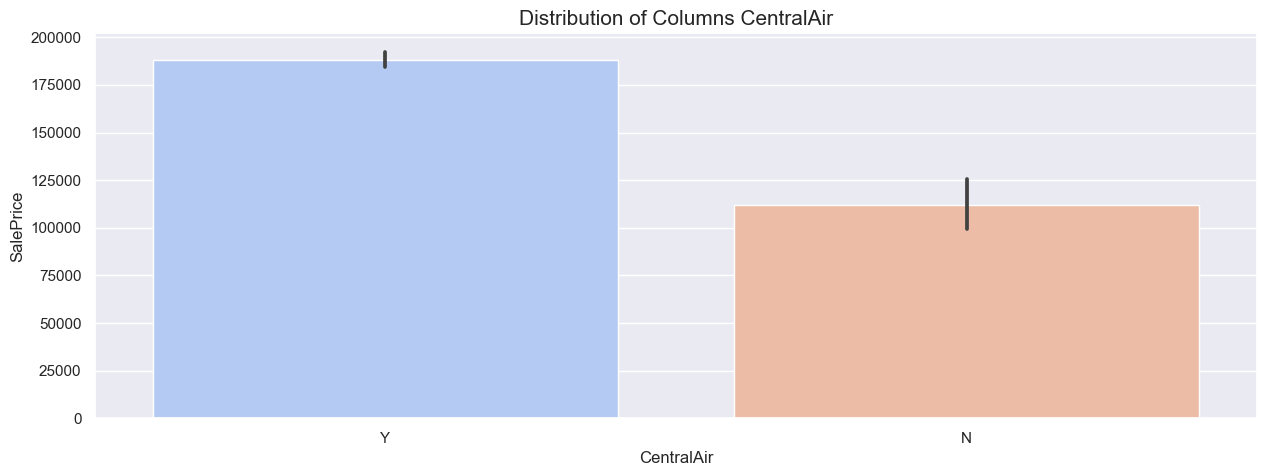

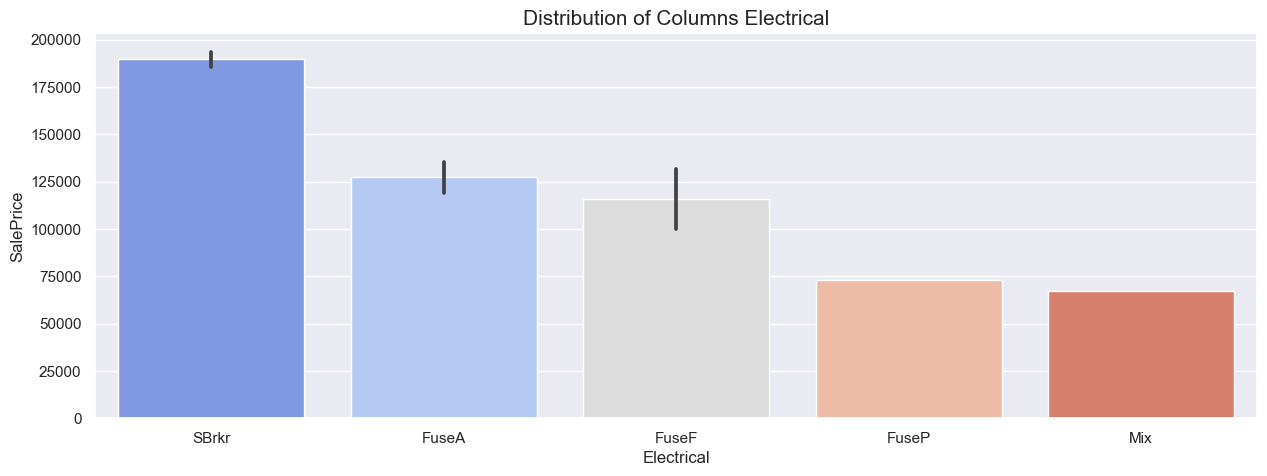

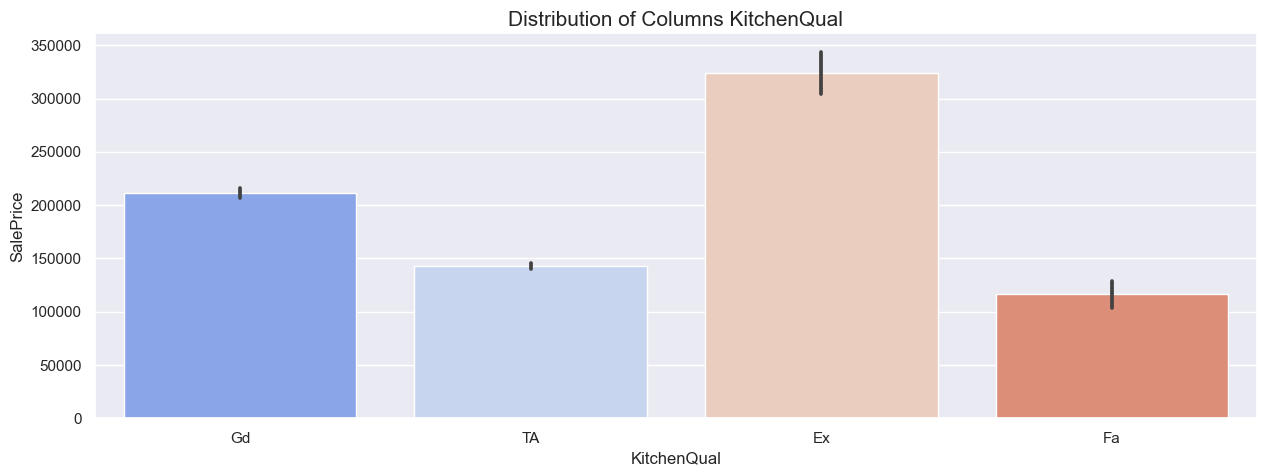

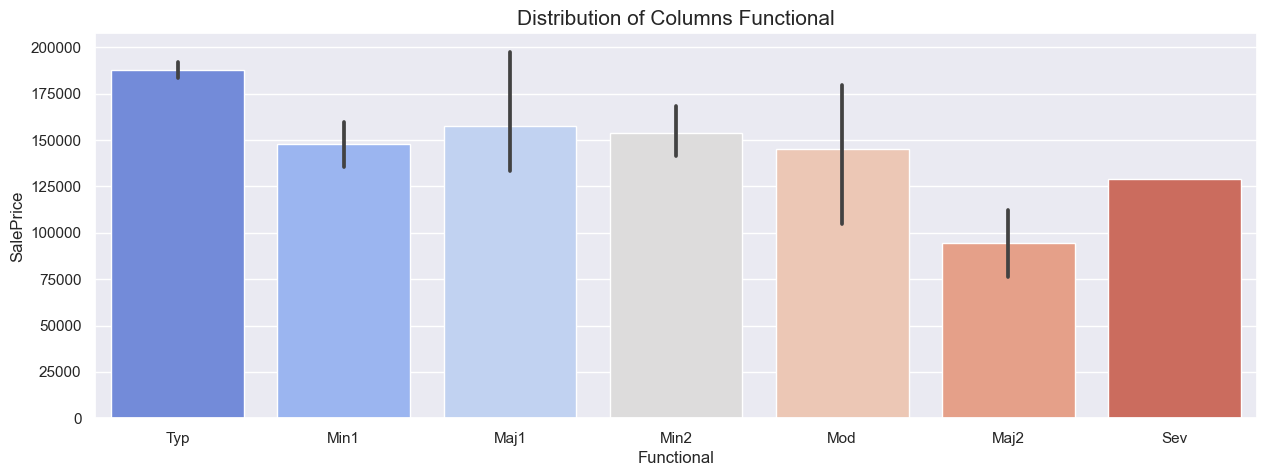

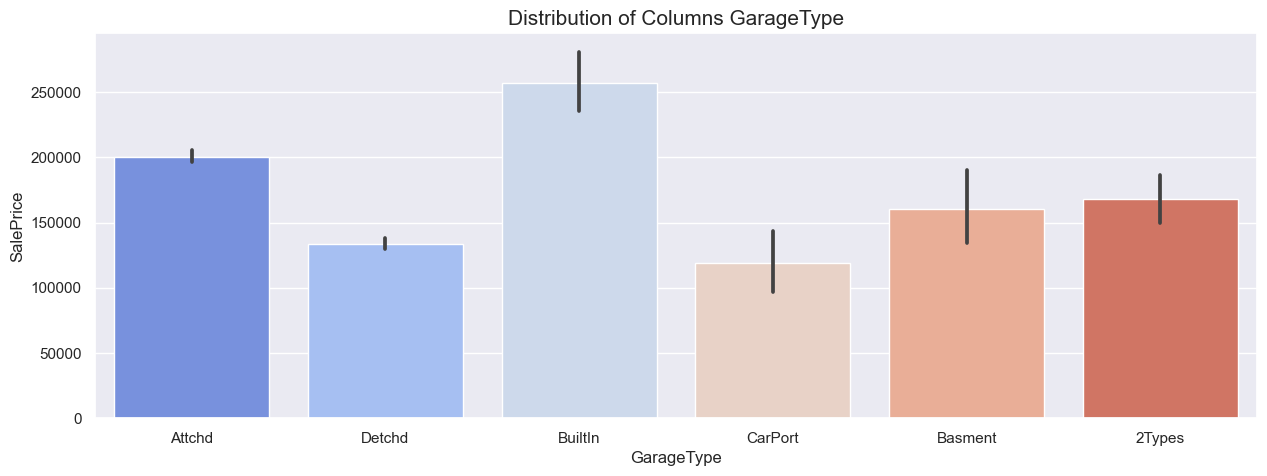

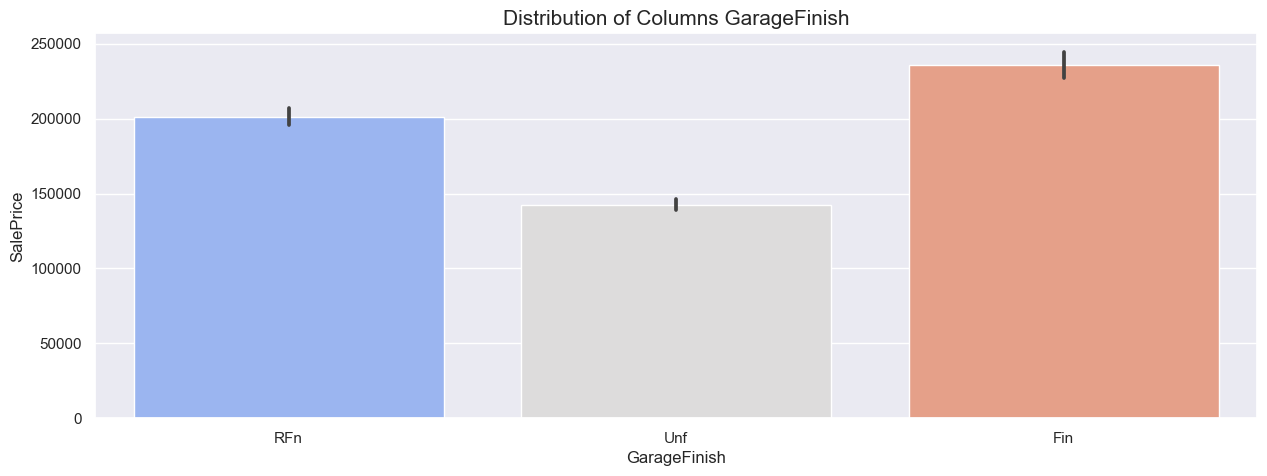

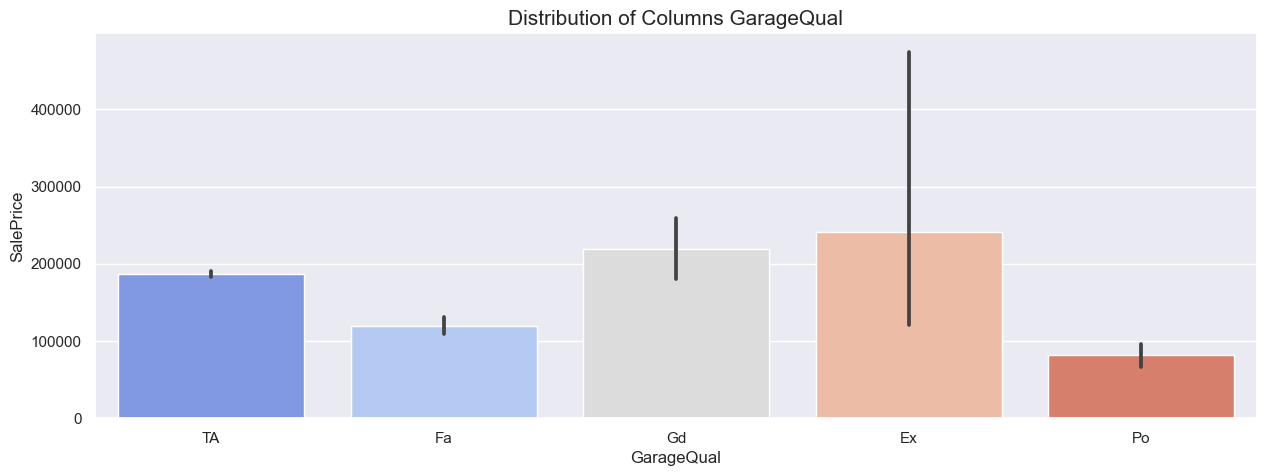

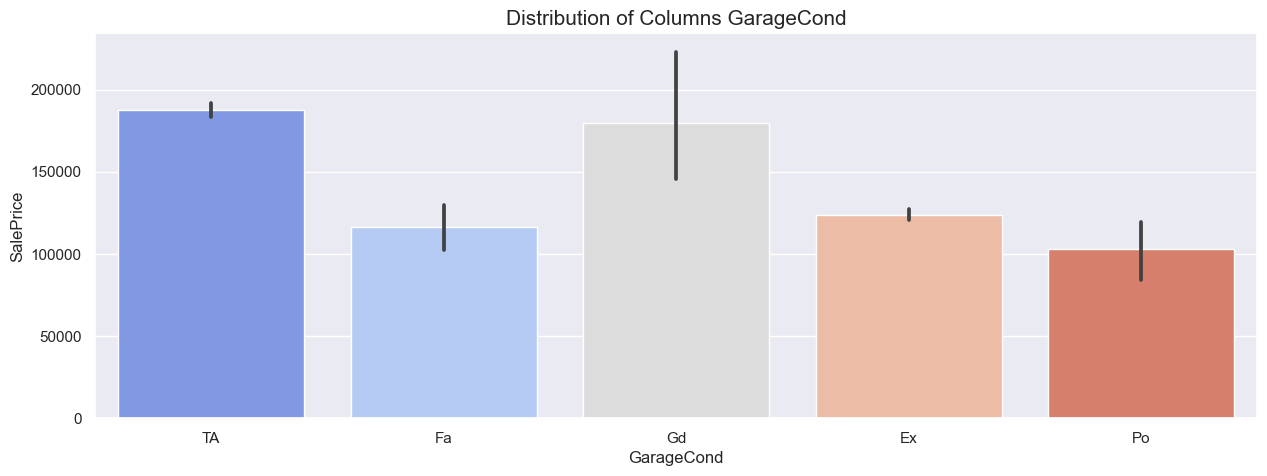

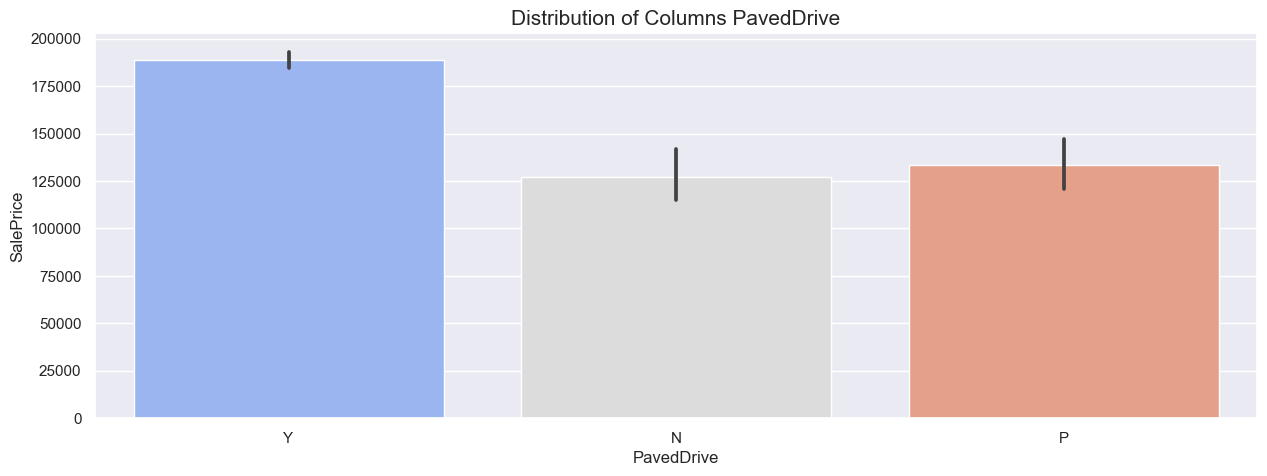

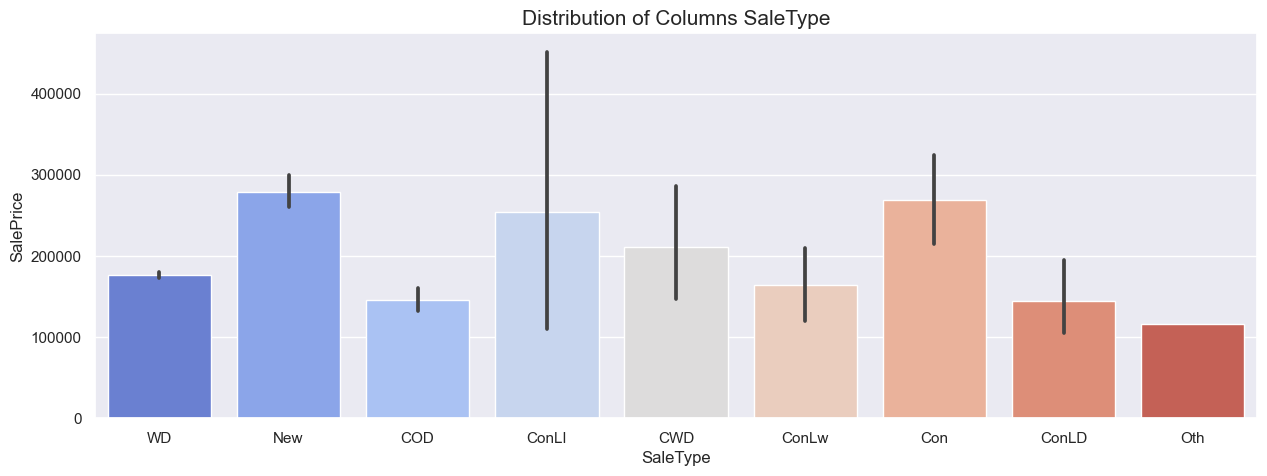

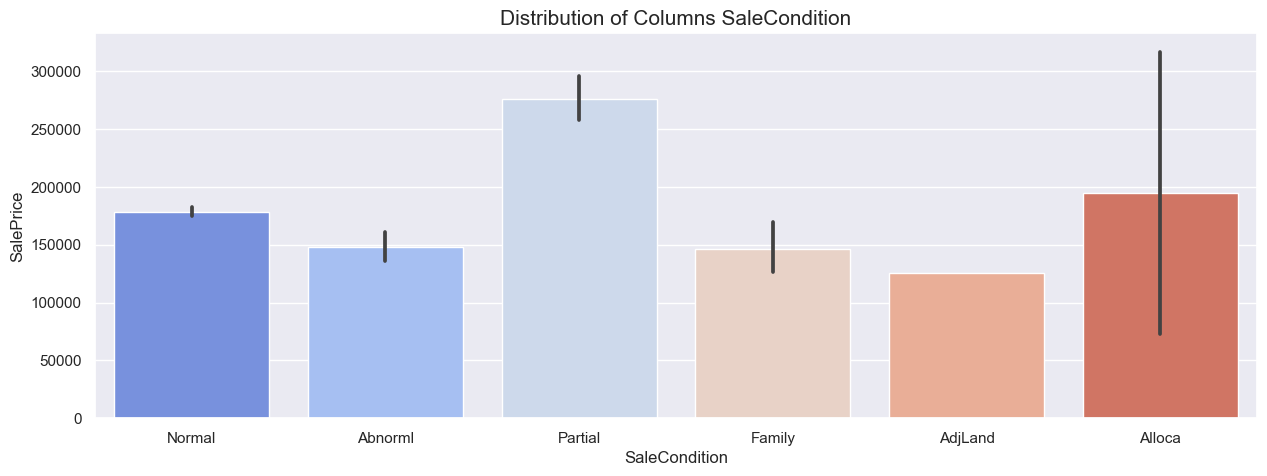

In [36]:
# Checking Categorical columns relation to target
for x in range(1,int(len(cat_cols)+1)):
  fig,axes=plt.subplots()
  sns.barplot(house_data[cat_cols[x-1]],house_data.SalePrice,palette='coolwarm')
  axes.set_title('Distribution of Columns '+cat_cols[x-1],fontdict={'fontsize':15})
  fig.set_figheight(5)
  fig.set_figwidth(15)
plt.show()

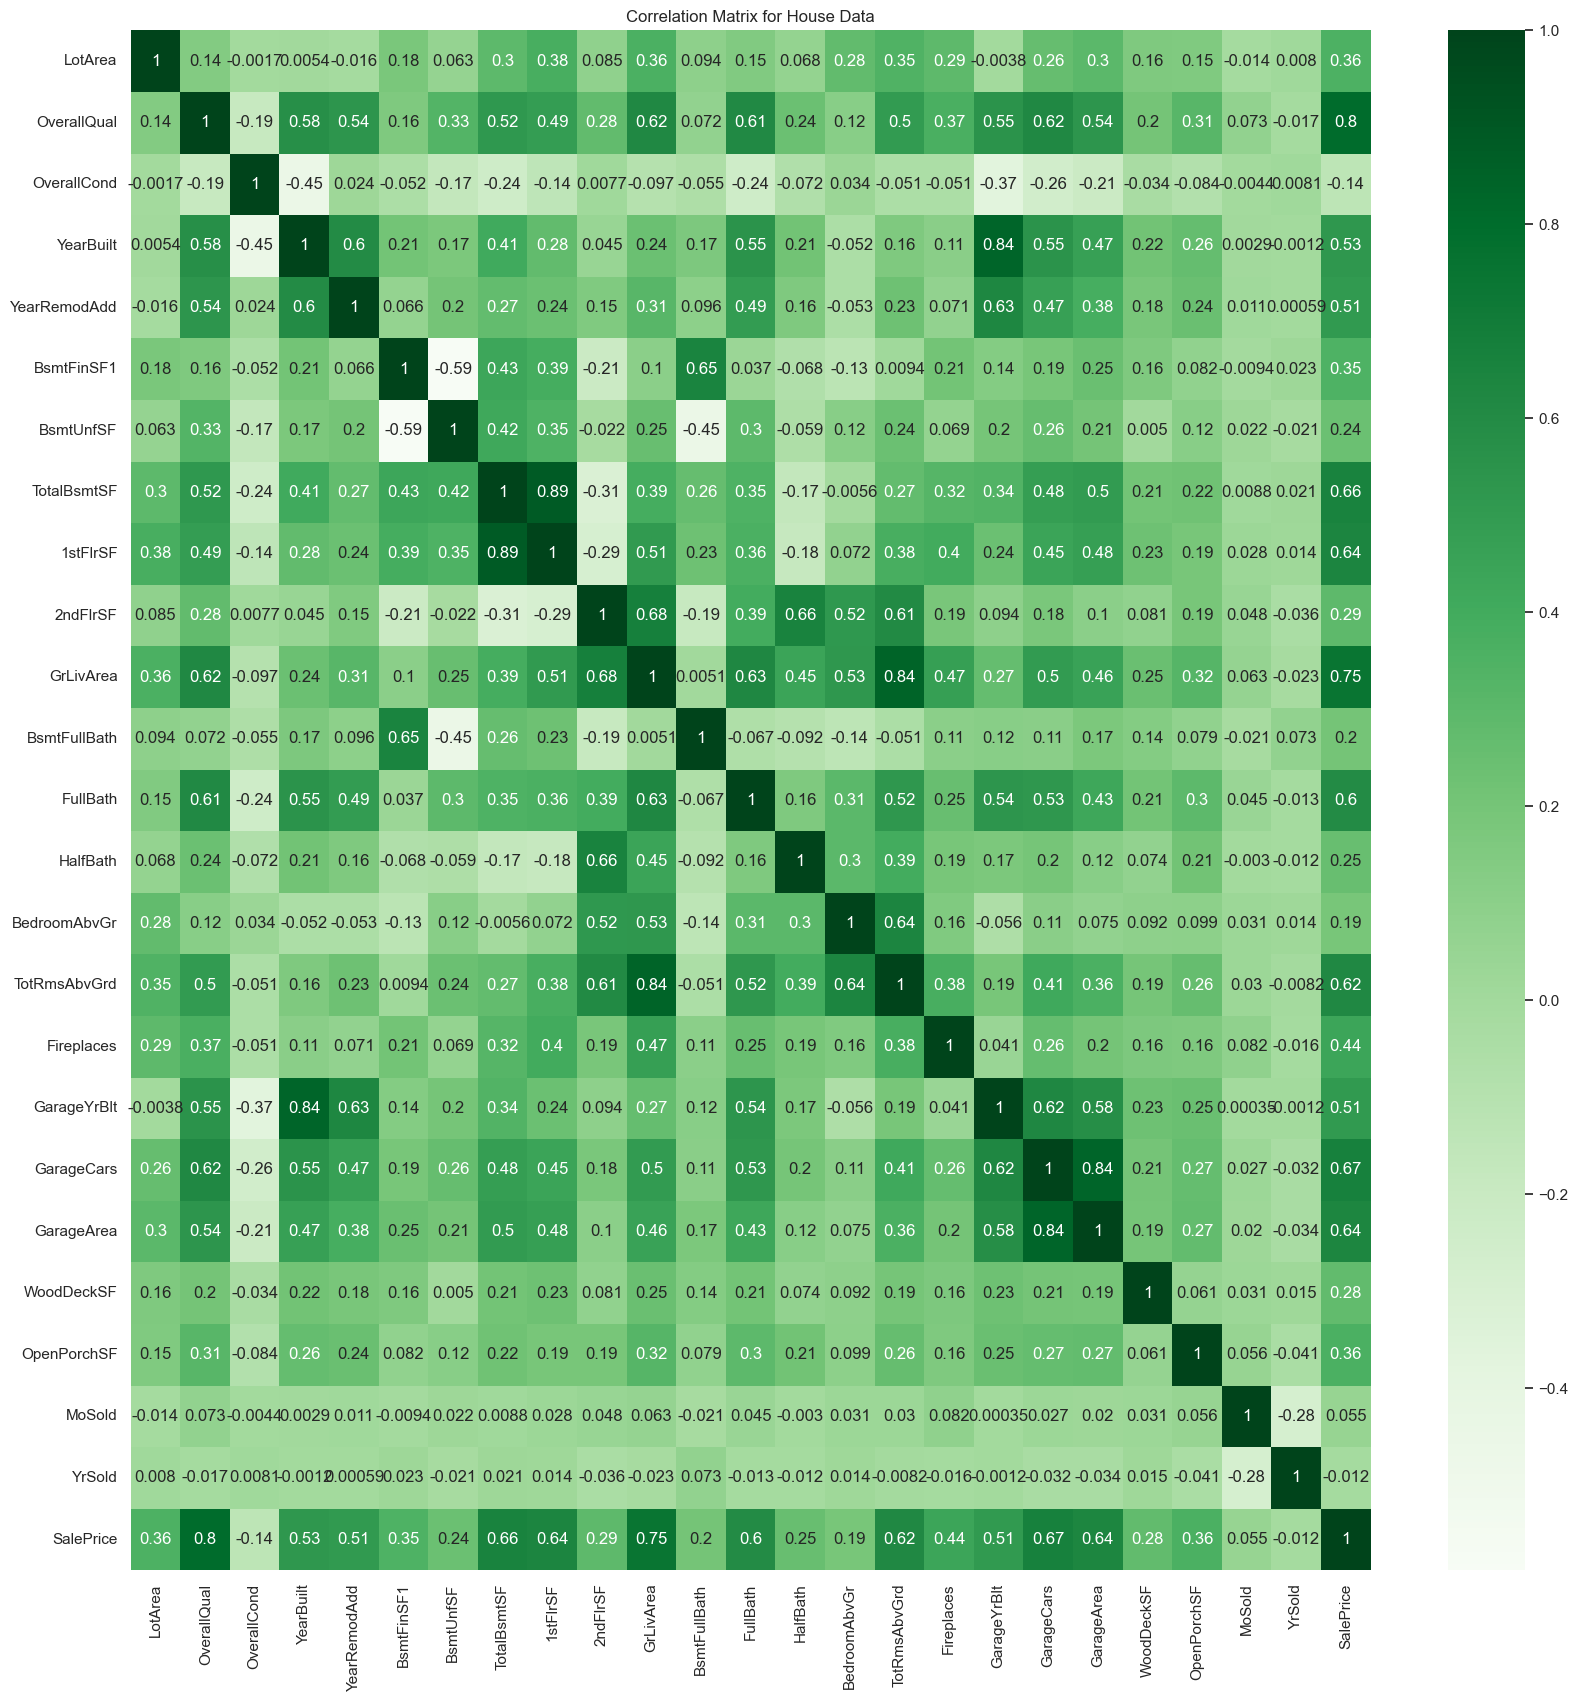

In [37]:
## Checking correlation to remove the unneccesary columns
plt.figure(figsize=(20,20))
sns.heatmap(house_data.corr(),annot=True,cmap='Greens')
plt.title('Correlation Matrix for House Data')
plt.show()

###### As it is visible many columns have very low correlation to target variable thus they can be eliminated. We are taking correlation factor to be more than 0.5 or less than -0.5.

In [38]:
# Removing columns with correlation inside range of 0.5 to -0.5
corr_with_target=house_data.corr().loc['SalePrice']
corr_with_target=corr_with_target[0:-1].dropna()
corr_with_target=pd.DataFrame(corr_with_target.values,corr_with_target.index,columns=['correlation'])
corr_with_target=corr_with_target[(corr_with_target.correlation<0.5) & (corr_with_target.correlation>(-0.5))]
house_data=house_data.drop(corr_with_target.index,axis=1)
# Resetting Continous Column list
## Continous Columns
cont_cols=[x for x in house_data.describe().columns if x !='SalePrice']
# Shape of dataframe
house_data.shape

(1268, 45)

###### The EDA is complete, and the data has been cleaned further after using graphs to understand the distribution and correlation. The data is ready for model creation.

# Data Preparation

In [39]:
# Converted the Columns to dummy variables
temp_join=pd.get_dummies(house_data[cat_cols],drop_first=True)
house_data=pd.concat([house_data,temp_join],axis='columns')
house_data=house_data.drop(cat_cols,axis=1)
#  Final shape of dataframe
house_data.shape

(1268, 190)

###### The data has been cleaned and dummy variables created, so we can proceed with feature selection, but before that, we need to divide it into train and test splits with scaling. As the outlier has been treated, to prevent the effect of remaining outliers, we will use RobustScaler instead of MinMaxScaler. 

In [40]:
# Train and test sets are split.
df_train,df_test = train_test_split(house_data,train_size=0.7,test_size=0.3,random_state = 79,shuffle=True)
# Scaling both sets
scaler = RobustScaler()
df_train[cont_cols+['SalePrice']] = scaler.fit_transform(df_train[cont_cols+['SalePrice']])
df_test[cont_cols+['SalePrice']] = scaler.transform(df_test[cont_cols+['SalePrice']])

In [41]:
# Dividing into X_train and y_train
X_train_ridge=df_train.drop(['SalePrice'],axis=1)
y_train_ridge=df_train.SalePrice
# Dividing into X_test and y_test
X_test_ridge=df_test.drop(['SalePrice'],axis=1)
y_test_ridge=df_test.SalePrice

###### As the set has been divided, we will proceed with the reduction of columns using RFE with GridSearch CV. We are using GridSearch CV as it allows us to specify criteria like RMSE, and precision in getting the best value.

# Ridge Model with RFE reduction in column

###### As Ridge is not capable of feature selection, we are using RFE to optimise the value of Ridge for a business-suitable model.

### RFE for Ridge

In [42]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 79)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 60))}]


# step-3: perform grid search
# 3.1 specify model
lm = Ridge()
lm.fit(X_train_ridge, y_train_ridge)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)
# fit the model
model_cv.fit(X_train_ridge, y_train_ridge)      

Fitting 10 folds for each of 59 candidates, totalling 590 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=79, shuffle=True),
             estimator=RFE(estimator=Ridge()), n_jobs=-1,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [44]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.264299      0.159010         0.009379        0.007658   
1        1.259306      0.163589         0.008345        0.008480   
2        1.291385      0.149949         0.010351        0.006173   
3        1.204335      0.157127         0.002651        0.003258   
4        1.292586      0.126518         0.010353        0.009212   
5        1.439066      0.329873         0.006082        0.002975   
6        1.319394      0.350378         0.007945        0.009643   
7        1.231753      0.277434         0.011787        0.006465   
8        1.289600      0.206374         0.011153        0.004361   
9        1.563936      0.100353         0.006757        0.005708   
10       1.396368      0.171778         0.005253        0.002741   
11       1.322514      0.204322         0.013125        0.010914   
12       1.353975      0.264930         0.004875        0.005958   
13       1.266973      0.229518         0.008554        0.005086   
14       1.420281      0.318312         0.011158        0.010200   
15       1.319135      0.313696         0.006237        0.000404   
16       1.359442      0.395344         0.008568        0.007471   
17       1.373943      0.406560         0.004033        0.004607   
18       1.353489      0.202662         0.009306        0.012392   
19       1.337100      0.188471         0.007348        0.005209   
20       1.273666      0.184925         0.005985        0.005103   
21       1.226157      0.116076         0.011774        0.005328   
22       1.216342      0.144975         0.009697        0.006855   
23       1.229910      0.152109         0.007694        0.007059   
24       1.235299      0.171369         0.006960        0.010152   
25       1.228461      0.182145         0.007652        0.006998   
26       1.243427      0.156337         0.010679        0.005797   
27       1.291003      0.191523         0.013200        0.013133   
28       1.264700      0.155091         0.008298        0.006810   
29       1.573605      0.398008         0.008004        0.004300   
30       1.279140      0.322220         0.008102        0.007162   
31       1.321440      0.472979         0.007975        0.009929   
32       1.248413      0.284101         0.009228        0.007250   
33       1.294424      0.272092         0.007981        0.003510   
34       1.310945      0.286209         0.010472        0.006896   
35       1.322259      0.461984         0.008145        0.008804   
36       1.257054      0.373568         0.006965        0.005763   
37       1.251106      0.220282         0.004622        0.006222   
38       1.327586      0.233062         0.002761        0.004893   
39       1.201879      0.197845         0.007020        0.005215   
40       1.253091      0.219878         0.006997        0.006520   
41       1.200740      0.154797         0.009726        0.006845   
42       1.191585      0.175705         0.010875        0.010989   
43       1.236822      0.173373         0.010658        0.003746   
44       1.287203      0.234139         0.007984        0.001857   
45       1.266673      0.243129         0.009579        0.007450   
46       1.229154      0.236825         0.011937        0.009766   
47       1.177079      0.140638         0.007814        0.007814   
48       1.178943      0.114551         0.009156        0.004835   
49       1.295201      0.271832         0.009380        0.004695   
50       1.213195      0.211685         0.006059        0.004866   
51       1.214071      0.147997         0.009961        0.007823   
52       1.300884      0.187715         0.011793        0.009813   
53       1.233497      0.161011         0.009671        0.007635   
54       1.269440      0.214654         0.012361        0.006471   
55       1.321128      0.200851         0.011054        0.006485   
56       1.206885      0.137550         0.008652        0.007314   
57       1.209407      0.182995         0.008609        0.00

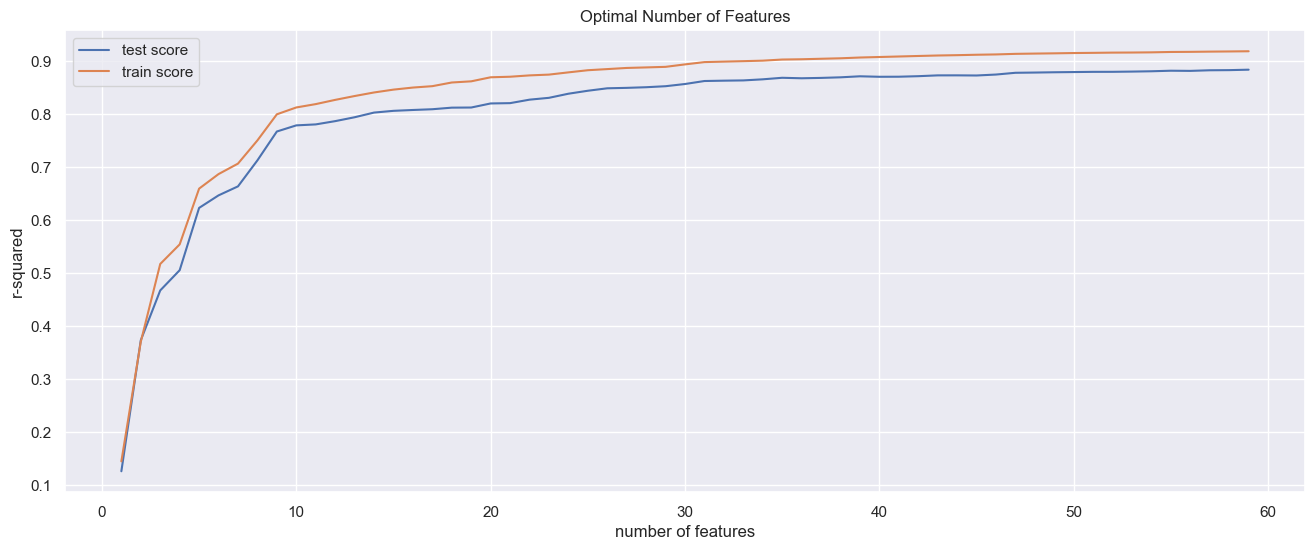

In [45]:
# plotting cv results
plt.figure(figsize=(16,6))
sns.lineplot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
sns.lineplot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

###### We get optimal value of RFE from GridSearchCV and will use that to build a model.

In [46]:
print(model_cv.best_params_)
value=model_cv.best_params_

{'n_features_to_select': 59}


In [47]:
rfe = RFE(lm,n_features_to_select=value['n_features_to_select'])         
rfe = rfe.fit(X_train_ridge, y_train_ridge)
#Find the top features
colfls=X_train_ridge.columns[rfe.support_]
# Changing sets to hold top features
X_train_ridge=X_train_ridge[colfls]
X_test_ridge=X_test_ridge[colfls]

### Alpha value hypertuning for Ridge

In [48]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 79)

# step-2: specify range of hyperparameters to tune
alpha = [{'alpha': np.arange(0.00000001,0.0008,0.000001)}]


# step-3: perform grid search
# 3.1 specify model
lm = Ridge()
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = lm, 
                        param_grid = alpha, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ridge, y_train_ridge)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=79, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': array([1.0000e-08, 1.0100e-06, 2.0100e-06, 3.0100e-06, 4.0100e-06,
       5.0100e-06, 6.0100e-06, 7.0100e-06, 8.0100e-06, 9.0100e-06,
       1.0010e-05, 1.1010e-05, 1.2010e-05, 1.3010e-05, 1.4010e-05,
       1.5010e-05, 1.6010e-05, 1.7010e-05, 1.8010e-05, 1.9010e-05,
       2.0010e-05...
       7.7001e-04, 7.7101e-04, 7.7201e-04, 7.7301e-04, 7.7401e-04,
       7.7501e-04, 7.7601e-04, 7.7701e-04, 7.7801e-04, 7.7901e-04,
       7.8001e-04, 7.8101e-04, 7.8201e-04, 7.8301e-04, 7.8401e-04,
       7.8501e-04, 7.8601e-04, 7.8701e-04, 7.8801e-04, 7.8901e-04,
       7.9001e-04, 7.9101e-04, 7.9201e-04, 7.9301e-04, 7.9401e-04,
       7.9501e-04, 7.9601e-04, 7.9701e-04, 7.9801e-04, 7.9901e-04])}],
             return_train_score=True, scoring='r2', verbose=1)

In [49]:
print(model_cv.best_params_)
value_ridge=model_cv.best_params_

{'alpha': 0.0007990100000000001}


In [50]:
lm = Ridge(alpha=value_ridge['alpha'])
lm.fit(X_train_ridge, y_train_ridge)   
y_pred_test_ridge=lm.predict(X_test_ridge)
y_pred_train_ridge=lm.predict(X_train_ridge)

metric_ridge = {'Ridge':{}}
r2_train_lr = r2_score(y_train_ridge, y_pred_train_ridge)
print("R2 Train:",r2_train_lr)
metric_ridge['Ridge']['R2 Train']=r2_train_lr

r2_test_lr = r2_score(y_test_ridge, y_pred_test_ridge)
print("R2 Test:",r2_test_lr)
metric_ridge['Ridge']['R2 Test']=r2_test_lr

rss1_lr = np.sum(np.square(y_train_ridge - y_pred_train_ridge))
print("RSS Train:",rss1_lr)
metric_ridge['Ridge']['RSS Train']=rss1_lr

rss2_lr = np.sum(np.square(y_test_ridge - y_pred_test_ridge))
print("RSS Test:",rss2_lr)
metric_ridge['Ridge']['RSS Test']=rss2_lr

mse_train_lr = mean_squared_error(y_train_ridge, y_pred_train_ridge)
print("MSE Train:",mse_train_lr)
metric_ridge['Ridge']['MSE Train']=mse_train_lr

mse_test_lr = mean_squared_error(y_test_ridge, y_pred_test_ridge)
print("MSE Test:",mse_test_lr)
metric_ridge['Ridge']['MSE Test']=mse_test_lr

R2 Train: 0.918182278109473
R2 Test: 0.867014532941558
RSS Train: 57.10724457015546
RSS Test: 34.574248966083886
MSE Train: 0.06438246287503434
MSE Test: 0.09074606027843539


### Validating the assumptions of Ridge LR

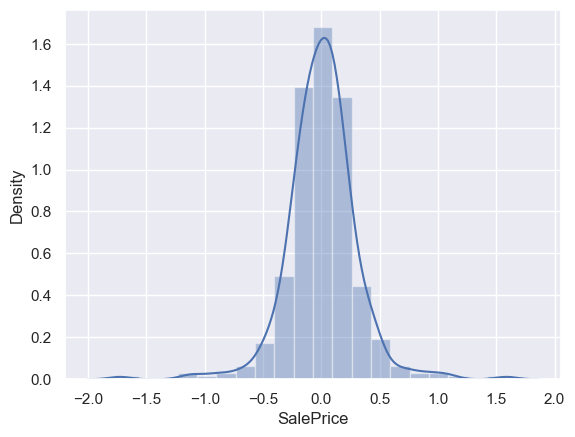

In [51]:
## Plot the Error Distribution
sns.distplot((y_test_ridge-y_pred_test_ridge), bins=20)
plt.show()

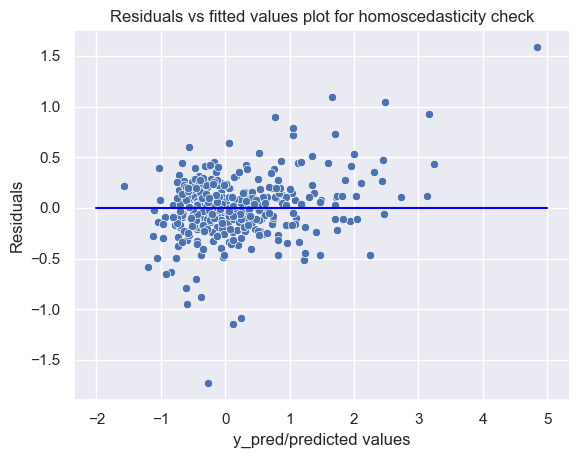

In [52]:
# Confirming linear Homoscedasticity
p = sns.scatterplot(y_test_ridge,(y_test_ridge-y_pred_test_ridge))
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([-2,5],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

###### Homoscedasticity is present since the variance of the residuals is almost constant.

In [53]:
print('The Durbin-Watson value for Final Model is',round(durbin_watson((y_train_ridge - y_pred_train_ridge)),4))

The Durbin-Watson value for Final Model is 1.9778


###### The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.
###### In this case it is extremely close to 2 which indicates non-autocorrelation.

# Lasso Model

###### As Lasso is capable of feature selection, we are not using RFE to reduce column count, as it will do implicitly by reducing the coefficient to zero.

In [54]:
# Dividing into X_train and y_train
X_train_lasso=df_train.drop(['SalePrice'],axis=1)
y_train_lasso=df_train.SalePrice
# Dividing into X_test and y_test
X_test_lasso=df_test.drop(['SalePrice'],axis=1)
y_test_lasso=df_test.SalePrice

### Alpha value hypertuning for Lasso

In [55]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 79)

# step-2: specify range of hyperparameters to tune
alpha = [{'alpha': np.arange(0.00000001,0.0008,0.000001)}]


# step-3: perform grid search
# 3.1 specify model
lm = Lasso()
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = lm, 
                        param_grid = alpha, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_lasso, y_train_lasso) 

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=79, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid=[{'alpha': array([1.0000e-08, 1.0100e-06, 2.0100e-06, 3.0100e-06, 4.0100e-06,
       5.0100e-06, 6.0100e-06, 7.0100e-06, 8.0100e-06, 9.0100e-06,
       1.0010e-05, 1.1010e-05, 1.2010e-05, 1.3010e-05, 1.4010e-05,
       1.5010e-05, 1.6010e-05, 1.7010e-05, 1.8010e-05, 1.9010e-05,
       2.0010e-05...
       7.7001e-04, 7.7101e-04, 7.7201e-04, 7.7301e-04, 7.7401e-04,
       7.7501e-04, 7.7601e-04, 7.7701e-04, 7.7801e-04, 7.7901e-04,
       7.8001e-04, 7.8101e-04, 7.8201e-04, 7.8301e-04, 7.8401e-04,
       7.8501e-04, 7.8601e-04, 7.8701e-04, 7.8801e-04, 7.8901e-04,
       7.9001e-04, 7.9101e-04, 7.9201e-04, 7.9301e-04, 7.9401e-04,
       7.9501e-04, 7.9601e-04, 7.9701e-04, 7.9801e-04, 7.9901e-04])}],
             return_train_score=True, scoring='r2', verbose=1)

In [57]:
print(model_cv.best_params_)
value_lasso=model_cv.best_params_

{'alpha': 0.00058701}


In [58]:
lm = Lasso(alpha=value_lasso['alpha'])
lm.fit(X_train_lasso, y_train_lasso)   
y_pred_test_lasso=lm.predict(X_test_lasso)
y_pred_train_lasso=lm.predict(X_train_lasso)

metric_lasso = {'Lasso':{}}
r2_train_lr = r2_score(y_train_lasso, y_pred_train_lasso)
print("R2 Train:",r2_train_lr)
metric_lasso['Lasso']['R2 Train']=r2_train_lr

r2_test_lr = r2_score(y_test_lasso, y_pred_test_lasso)
print("R2 Test:",r2_test_lr)
metric_lasso['Lasso']['R2 Test']=r2_test_lr

rss1_lr = np.sum(np.square(y_train_lasso - y_pred_train_lasso))
print("RSS Train:",rss1_lr)
metric_lasso['Lasso']['RSS Train']=rss1_lr

rss2_lr = np.sum(np.square(y_test_lasso - y_pred_test_lasso))
print("RSS Test:",rss2_lr)
metric_lasso['Lasso']['RSS Test']=rss2_lr

mse_train_lr = mean_squared_error(y_train_lasso, y_pred_train_lasso)
print("MSE Train:",mse_train_lr)
metric_lasso['Lasso']['MSE Train']=mse_train_lr

mse_test_lr = mean_squared_error(y_test_lasso, y_pred_test_lasso)
print("MSE Test:",mse_test_lr)
metric_lasso['Lasso']['MSE Test']=mse_test_lr

R2 Train: 0.9247491196660561
R2 Test: 0.8940229560434655
RSS Train: 52.5237115878142
RSS Test: 27.552459554340757
MSE Train: 0.0592150074270735
MSE Test: 0.07231616680929333


### Validating the assumptions of Lasso LR

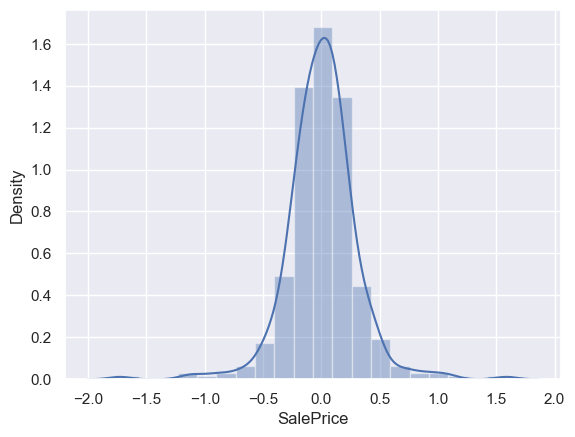

In [59]:
## Plot the Error Distribution
sns.distplot((y_test_ridge-y_pred_test_ridge), bins=20)
plt.show()

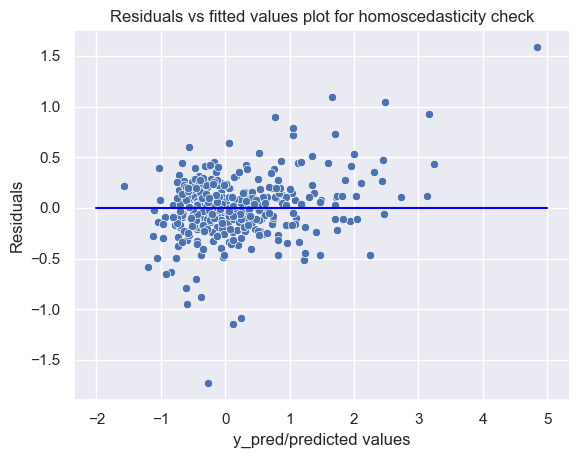

In [60]:
# Confirming linear Homoscedasticity
p = sns.scatterplot(y_test_ridge,(y_test_ridge-y_pred_test_ridge))
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([-2,5],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

###### Homoscedasticity is present since the variance of the residuals is almost constant.

In [61]:
print('The Durbin-Watson value for Final Model is',round(durbin_watson((y_train_ridge - y_pred_train_ridge)),4))

The Durbin-Watson value for Final Model is 1.9778


###### The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.
###### In this case it is extremely close to 2 which indicates non-autocorrelation.

# Conclusion

### Details of the Both Models

In [62]:
final_result=pd.concat([pd.DataFrame(metric_ridge),pd.DataFrame(metric_lasso)],axis=1)
final_result

Ridge      Lasso
MSE Test    0.090746   0.072316
MSE Train   0.064382   0.059215
R2 Test     0.867015   0.894023
R2 Train    0.918182   0.924749
RSS Test   34.574249  27.552460
RSS Train  57.107245  52.523712

##### Optimal Values for the Models

In [63]:
print('Optimal value of Lambda for Ridge',value_ridge['alpha'])
print('Optimal value of Lambda for Lasso',value_lasso['alpha'])

Optimal value of Lambda for Ridge 0.0007990100000000001
Optimal value of Lambda for Lasso 0.00058701


###### As can be observed, the Lasso performed better than the Ridge and had higher accuracy on the test (89>86) with less MSE. Both models are valid as they follow the assumptions of the linear regression, and for the final conclusion, we will use Lasso as it has feature selection, which will help reduce the variables, making the model easier to understand.

# Features list (Lasso)

In [64]:
feature_list=pd.DataFrame(zip(X_train_lasso.columns,lm.coef_),columns=['Columns','Coefficients'])
feature_list=feature_list[~(feature_list.Coefficients==0)].reset_index().drop('index',axis=1)
feature_list

Columns  Coefficients
0             OverallQual      0.200527
1               YearBuilt      0.039672
2            YearRemodAdd      0.091732
3             TotalBsmtSF      0.225430
4                1stFlrSF     -0.072922
..                    ...           ...
112          SaleType_New      0.250234
113           SaleType_WD     -0.000607
114  SaleCondition_Alloca      0.068879
115  SaleCondition_Family     -0.130311
116  SaleCondition_Normal      0.058616

[117 rows x 2 columns]

###### The following are the columns that help in predicting price value with their coefficients, and they can be used to predict the value based on the column and class associated with the dummy variable.

In [65]:
# Final equation 
print('SalePrice=:',end=' ')
for x,y in feature_list.values:
  print('(',x,'*',y,')','+')

SalePrice=: ( OverallQual * 0.2005268827427107 ) +
( YearBuilt * 0.0396721212854045 ) +
( YearRemodAdd * 0.09173211268482943 ) +
( TotalBsmtSF * 0.2254302603544469 ) +
( 1stFlrSF * -0.07292200850335592 ) +
( GrLivArea * 0.4381370969343869 ) +
( FullBath * -0.004794345679579933 ) +
( TotRmsAbvGrd * 0.032986323590790366 ) +
( GarageYrBlt * -0.0323132212178558 ) +
( GarageCars * 0.04996303588706466 ) +
( GarageArea * 0.032974116191533565 ) +
( MSSubClass_1storyNew * 0.07295354000132677 ) +
( MSSubClass_1storyOld * 0.058105423431434086 ) +
( MSSubClass_1storyPUDnew * -0.09354613501319164 ) +
( MSSubClass_2storyNew * 0.06691844961786036 ) +
( MSSubClass_2storyOld * -0.02985474238087567 ) +
( MSSubClass_2storyPUDnew * -0.1662514980893069 ) +
( MSSubClass_Duplex * -0.08743322899287007 ) +
( MSSubClass_Multi * 0.08411405321475793 ) +
( MSZoning_FV * 0.01340458919036876 ) +
( MSZoning_RH * 0.018170023875826554 ) +
( LotShape_IR2 * 0.06959384293322582 ) +
( LotShape_Reg * -0.016908197494511126 )

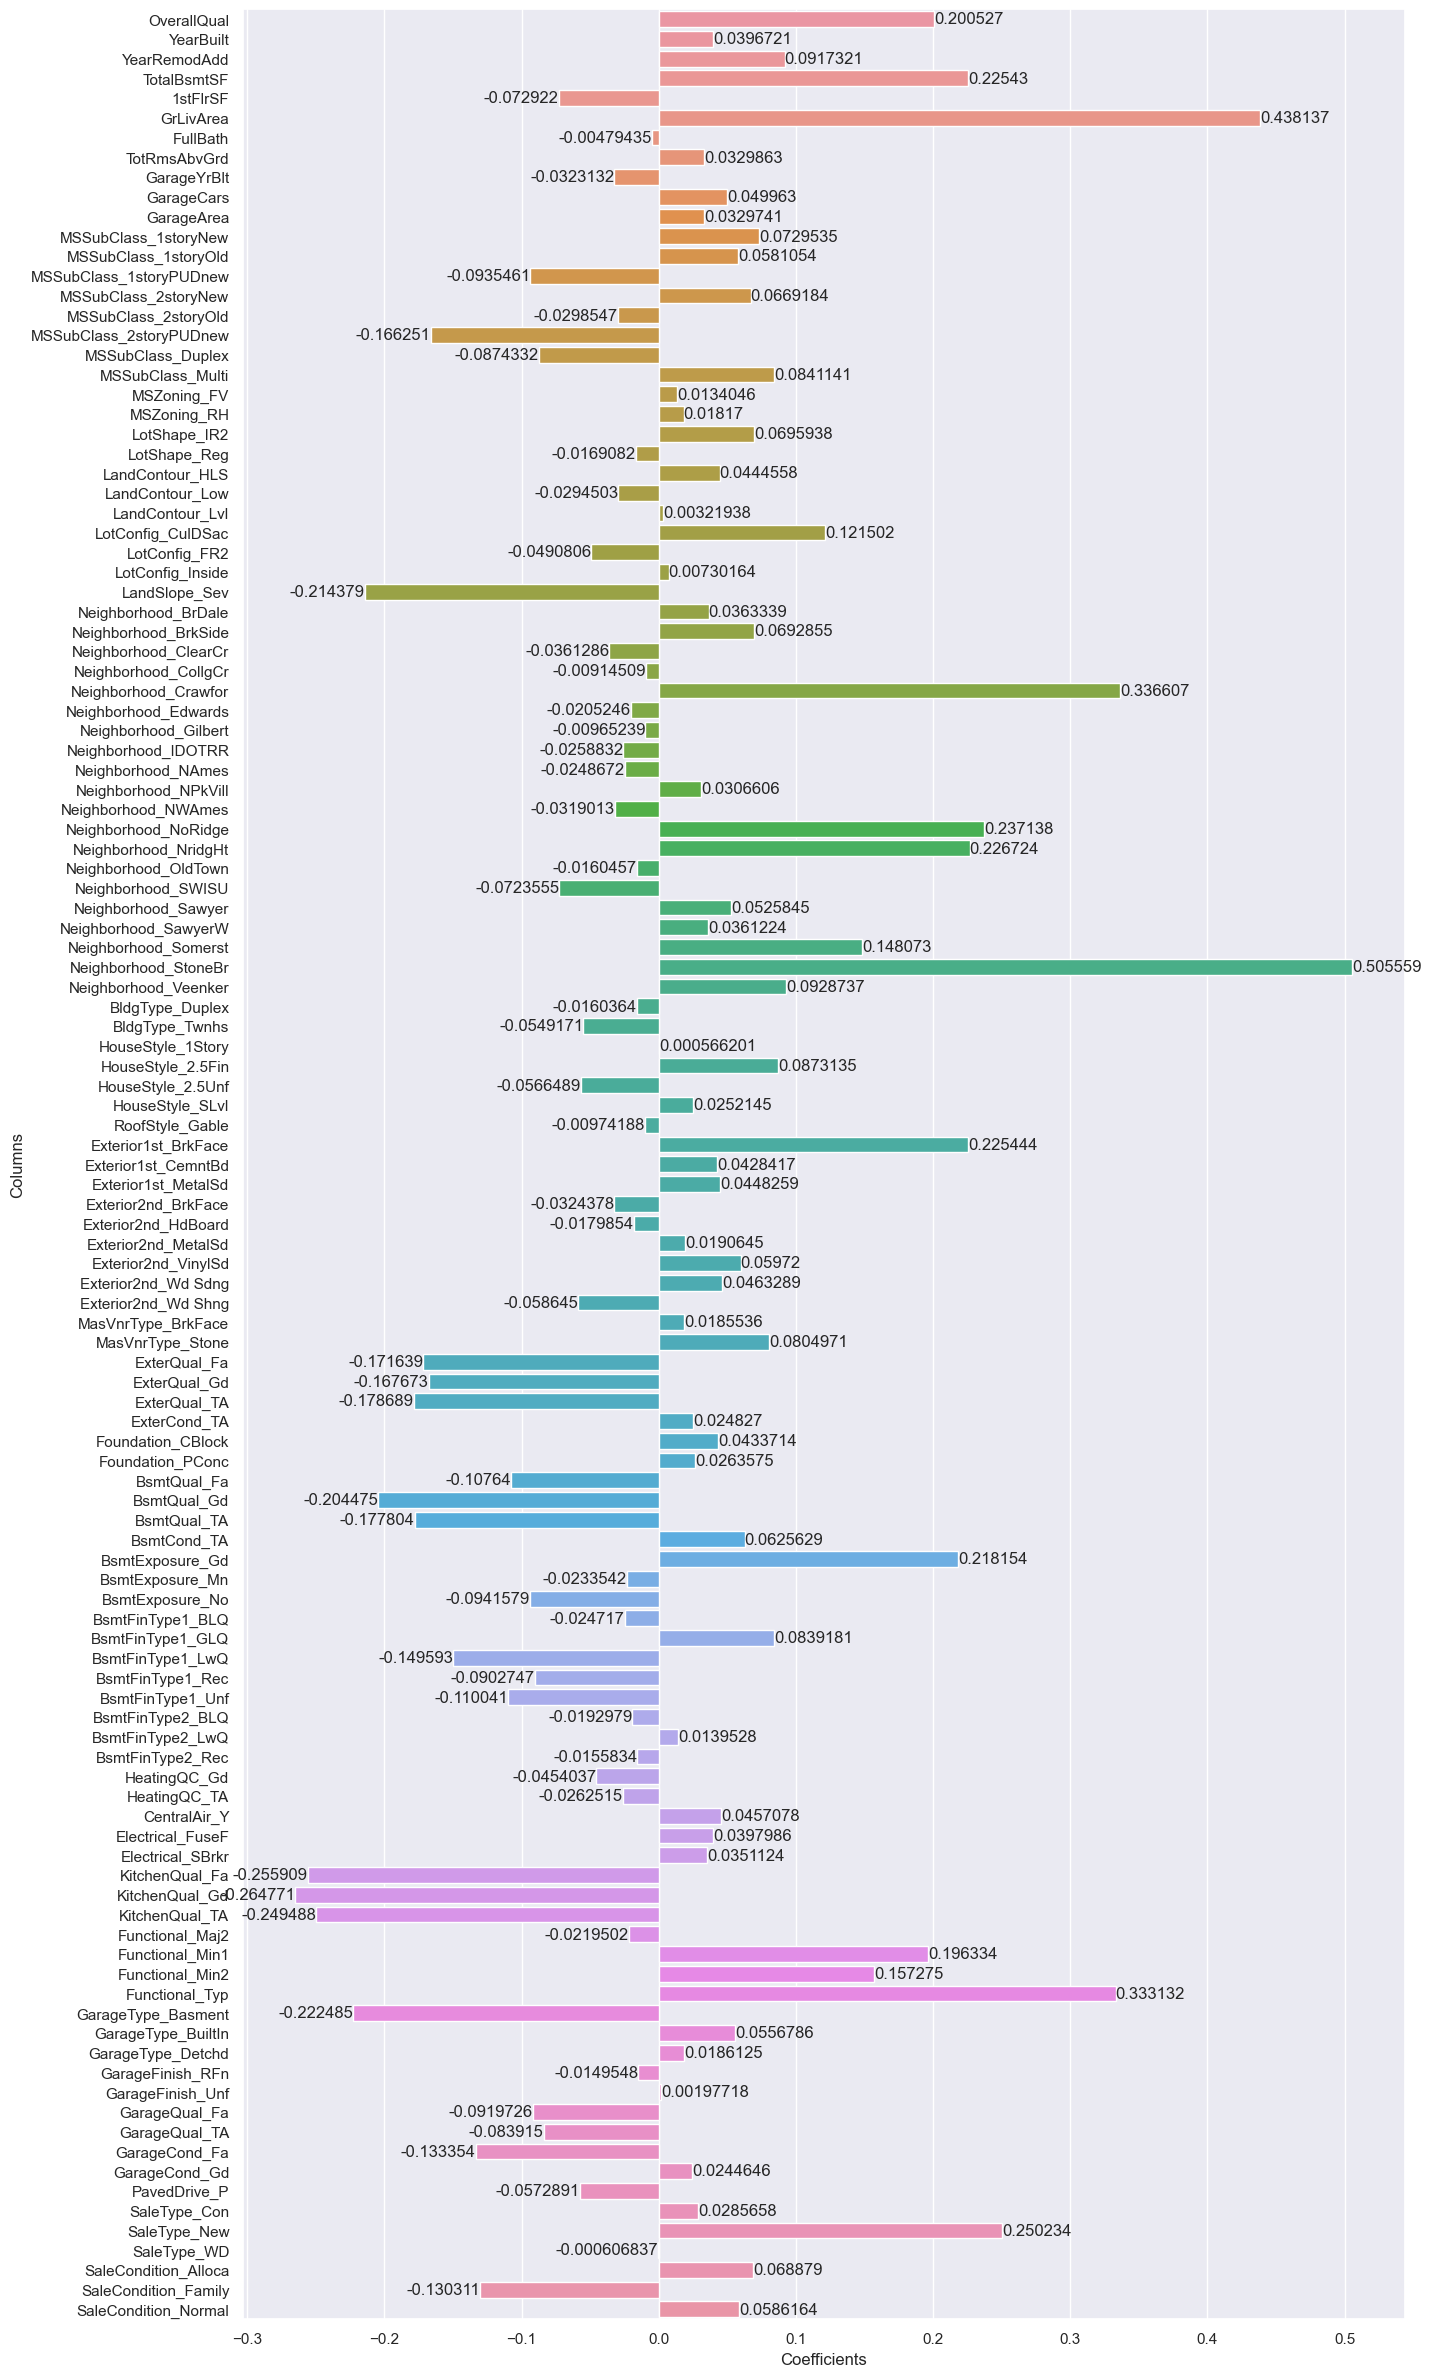

In [66]:
# coefficients weight chart
plt.figure(figsize=(15,30))
ax=sns.barplot(x="Coefficients",y="Columns",data=feature_list)
ax.bar_label(ax.containers[0])
plt.show()